# Colorisation des images en rose ou en vert

Ce pipeline visant à créer un jeu de données va prendre en paramètre une liste d'images *jpg* d'un dossier *input*. Les images vont se voir appliquer des effets de rotation et de mirroir avant de superposer un filtre de couleur dont la teinte est similaire aux exemples donnés.
Les images traitées se trouveront dans un fichier *output*, leur nouveaux nom indique les transformations appliquées.

### Importations

In [8]:
from PIL import Image, ImageDraw, ImageEnhance
import numpy as np
import random
import os

pink={'colName':"pink", 'colValue':(250,0,100)}
green={'colName':"green", 'colValue':(85,245,81)}

def coloringGenerator(fileName):
   #image load
    img = Image.open('./input/'+fileName)
    img = img.convert("RGBA")
    #display(img)
    
    rotate(img, fileName, green)
    rotate(img, fileName, pink)
    mirror(img, fileName, green)
    mirror(img, fileName, pink)

### Transformation de l'image de base

In [9]:
def mirror(img, fileName, color):
    ## Mirror the image
    img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
    
    img = Coloring(img, random.randrange(30, 100), color['colValue'])
    
    splitName = fileName.split('.')
    img.save('./output/'+color['colName']+'/'+splitName[0]+'_mirror_'+color['colName']+'.'+splitName[1])
    

def rotate(img, fileName, color):
    ## Rotate image of 90° and resize to 720 * 576px
    img = img.transpose(method=Image.TRANSPOSE)
    img = img.resize((720, 576), Image.LANCZOS)
    
    #print(color)
    img = Coloring(img, random.randrange(30, 100), color['colValue'])
    
    splitName = fileName.split('.')
    img.save('./output/'+color['colName']+'/'+splitName[0]+'_rotated_'+color['colName']+'.'+splitName[1])
    #display(img)

### Application du filtre de couleur

In [10]:
# Apply pink filter
def Coloring(img, numb_random, color):
    #pink filter creation
    overlay = Image.new("RGBA", img.size, color= (*color ,0))
    colorFilter = ImageDraw.Draw(overlay)
    colorFilter.rectangle([(0,0), (img.width, numb_random-1)], fill=(*color ,150))

    # image filter fusion
    img = Image.alpha_composite(img, overlay)
    img = img.convert("RGB")

    # local brightness enhancement
    ic = img.crop((0, 0, img.width, numb_random))#left, top, right, bottom
    brightnessFilter = ImageEnhance.Brightness(ic)
    ic = brightnessFilter.enhance(1.8)
    img.paste(ic, (0, 0, img.width, numb_random))
    
    return img

### Parcourir le dossier des fichiers de base

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import operator

for file in os.listdir('./input'):    
    if(file.__contains__('.jpg')):
        #print(file.split('.')[0])
        coloringGenerator(file)
        
print("Génération OK")

Génération OK


In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import operator

def analyse_image(img):
    fig = plt.figure(figsize=(20, 4))
    color = ('r', 'g', 'b')
    a = fig.add_subplot(1, 2, 1)
    plt.axis('off')
    plt.title("Image")
    plt.imshow(img)    
    
    b = fig.add_subplot(1, 2, 2)
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.title("Histogramme")
        plt.plot(histr,color = col)
    plt.show()
    
    
def img_path2array(path):
    return cv2.cvtColor(cv2.imread(path, 10), cv2.COLOR_BGR2RGB)



In [103]:
def browseArray(imgHue):
    for idx, value in enumerate(imgHue):
        if idx != 0 or idx < imgHue.lenght/2:
            diff = abs(value - imgHue[idx-1])
            return {'diff':diff, 'idx':idx}

        
def determineLimite(redChannel):
    highestDiff = 0
    diffIndex = 0
    medianTreshhold = 20
    meanTreshold = 20
    
    pixelMedian = np.median(redChannel, axis=1)
    result = browseArray(pixelMedian)
    if result['diff'] > highestDiff:
        highestDiff = result['diff']
        diffIndex = result['idx']
    
    
    if highestDiff < meanianTreshhold:
        highestDiff, diffIndex = 0
        pixelMeans = np.mean(redChannel, axis=1)
        result = browseArray(pixelMedian)
        if result['diff'] > highestDiff:
            highestDiff = result['diff']
            diffIndex = result['idx']
    
    #if highestDiff < meanTreshold:
        
    
    print('std/L ' + str(pixelMeans))
    return diffIndex

000000001558_rotated_pink.jpg


array([[[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [104,   4, 253],
        [106,   6, 255],
        [107,   7, 255]],

       [[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [104,   4, 253],
        [106,   6, 255],
        [107,   7, 255]],

       [[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [105,   5, 254],
        [107,   7, 255],
        [108,   8, 255]],

       ...,

       [[123, 121, 113],
        [123, 121, 113],
        [124, 122, 114],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[122, 120, 112],
        [122, 120, 112],
        [123, 121, 113],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[122, 120, 112],
        [122, 120, 112],
        [123, 121, 113],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

111.0
000000001369_rotated_pink.jpg


array([[[254, 163, 255],
        [254, 163, 255],
        [254, 163, 255],
        ...,
        [237, 131, 254],
        [237, 131, 254],
        [238, 132, 255]],

       [[254, 163, 255],
        [254, 163, 255],
        [254, 163, 255],
        ...,
        [237, 131, 254],
        [237, 131, 254],
        [238, 132, 255]],

       [[254, 163, 255],
        [254, 163, 255],
        [254, 163, 255],
        ...,
        [237, 131, 254],
        [237, 131, 254],
        [238, 132, 255]],

       ...,

       [[227, 221, 210],
        [227, 221, 210],
        [227, 221, 210],
        ...,
        [166, 167, 163],
        [168, 169, 165],
        [169, 170, 166]],

       [[227, 221, 210],
        [227, 221, 210],
        [227, 221, 210],
        ...,
        [166, 167, 163],
        [169, 170, 166],
        [170, 171, 167]],

       [[227, 221, 210],
        [227, 221, 210],
        [227, 221, 210],
        ...,
        [167, 168, 164],
        [170, 171, 167],
        [172, 173, 169]]

26.0
000000001319_rotated_pink.jpg


array([[[196, 102, 255],
        [194, 100, 255],
        [191,  96, 255],
        ...,
        [253, 109, 255],
        [255, 108, 255],
        [255, 108, 255]],

       [[191,  97, 255],
        [189,  95, 255],
        [185,  90, 254],
        ...,
        [254, 107, 255],
        [254, 107, 255],
        [255, 108, 255]],

       [[187,  94, 255],
        [184,  91, 254],
        [181,  87, 252],
        ...,
        [255, 107, 255],
        [255, 106, 255],
        [255, 106, 255]],

       ...,

       [[ 61,  63,  74],
        [ 55,  57,  68],
        [ 48,  50,  61],
        ...,
        [235, 194, 185],
        [234, 193, 184],
        [234, 193, 184]],

       [[ 67,  69,  80],
        [ 60,  62,  73],
        [ 54,  56,  67],
        ...,
        [233, 195, 183],
        [234, 194, 182],
        [234, 194, 182]],

       [[ 74,  76,  87],
        [ 67,  69,  80],
        [ 61,  63,  74],
        ...,
        [233, 195, 183],
        [234, 194, 182],
        [234, 194, 182]]

48.0
000000000999_mirror_pink.jpg


array([[[122,  40, 247],
        [130,  49, 252],
        [139,  60, 255],
        ...,
        [131,  40, 250],
        [131,  34, 244],
        [134,  35, 245]],

       [[124,  42, 249],
        [132,  51, 254],
        [141,  62, 255],
        ...,
        [128,  35, 250],
        [126,  27, 243],
        [127,  26, 242]],

       [[127,  45, 252],
        [133,  52, 255],
        [141,  62, 255],
        ...,
        [126,  29, 253],
        [124,  19, 246],
        [124,  17, 244]],

       ...,

       [[ 15,  30,  49],
        [ 17,  34,  53],
        [ 21,  38,  57],
        ...,
        [ 37,  64,  98],
        [ 37,  64,  98],
        [ 37,  64,  98]],

       [[ 17,  34,  55],
        [ 18,  37,  58],
        [ 23,  42,  63],
        ...,
        [ 34,  62,  97],
        [ 34,  61,  95],
        [ 32,  59,  93]],

       [[ 19,  38,  59],
        [ 22,  41,  62],
        [ 24,  45,  67],
        ...,
        [ 37,  65, 100],
        [ 36,  63,  97],
        [ 34,  61,  95]]

95.0
000000001228_mirror_pink.jpg


array([[[132,  26, 251],
        [133,  27, 252],
        [133,  30, 252],
        ...,
        [128,  23, 255],
        [127,  24, 253],
        [127,  25, 250]],

       [[132,  26, 251],
        [133,  27, 252],
        [133,  30, 252],
        ...,
        [126,  21, 255],
        [125,  22, 251],
        [125,  23, 248]],

       [[132,  25, 252],
        [133,  27, 252],
        [133,  30, 252],
        ...,
        [124,  19, 254],
        [125,  22, 251],
        [126,  24, 250]],

       ...,

       [[178, 214, 238],
        [173, 209, 233],
        [165, 201, 225],
        ...,
        [107, 145, 163],
        [141, 179, 197],
        [155, 193, 211]],

       [[179, 215, 239],
        [171, 207, 231],
        [158, 194, 218],
        ...,
        [111, 149, 167],
        [121, 159, 177],
        [129, 167, 185]],

       [[154, 190, 214],
        [149, 185, 209],
        [143, 179, 203],
        ...,
        [164, 202, 220],
        [156, 194, 212],
        [144, 182, 200]]

26.5
000000001397_mirror_pink.jpg


array([[[244, 124, 255],
        [244, 124, 255],
        [244, 124, 255],
        ...,
        [239, 118, 255],
        [239, 118, 255],
        [239, 118, 255]],

       [[244, 124, 255],
        [244, 124, 255],
        [244, 124, 255],
        ...,
        [239, 118, 255],
        [239, 118, 255],
        [239, 118, 255]],

       [[244, 124, 255],
        [244, 124, 255],
        [244, 124, 255],
        ...,
        [239, 118, 255],
        [239, 118, 255],
        [239, 118, 255]],

       ...,

       [[155, 143, 141],
        [155, 143, 141],
        [154, 142, 140],
        ...,
        [148, 138, 131],
        [148, 138, 131],
        [148, 138, 131]],

       [[156, 144, 142],
        [157, 145, 143],
        [159, 147, 145],
        ...,
        [153, 143, 136],
        [151, 141, 134],
        [149, 139, 132]],

       [[150, 138, 136],
        [153, 141, 139],
        [156, 144, 142],
        ...,
        [153, 143, 136],
        [158, 148, 141],
        [160, 150, 143]]

32.0
000000001342_rotated_pink.jpg


array([[[114,  11, 255],
        [114,  11, 255],
        [114,  11, 255],
        ...,
        [107,  25, 254],
        [107,  25, 254],
        [107,  25, 254]],

       [[116,  13, 255],
        [116,  14, 255],
        [115,  12, 255],
        ...,
        [107,  25, 254],
        [107,  25, 254],
        [107,  25, 254]],

       [[120,  18, 255],
        [119,  18, 255],
        [118,  16, 255],
        ...,
        [107,  25, 254],
        [107,  25, 254],
        [107,  25, 254]],

       ...,

       [[152, 144, 137],
        [152, 144, 137],
        [152, 144, 137],
        ...,
        [ 42,  42,  42],
        [ 43,  43,  43],
        [ 43,  43,  43]],

       [[150, 142, 135],
        [150, 142, 135],
        [150, 142, 135],
        ...,
        [ 43,  43,  43],
        [ 44,  44,  44],
        [ 44,  44,  44]],

       [[148, 140, 133],
        [148, 140, 133],
        [148, 140, 133],
        ...,
        [ 44,  44,  44],
        [ 45,  45,  45],
        [ 45,  45,  45]]

137.0
000000001168_rotated_pink.jpg


array([[[206,  99, 255],
        [206,  99, 255],
        [206,  99, 255],
        ...,
        [186, 121, 254],
        [186, 121, 254],
        [186, 121, 254]],

       [[206,  99, 255],
        [206,  99, 255],
        [206,  99, 255],
        ...,
        [186, 120, 253],
        [186, 120, 253],
        [186, 120, 253]],

       [[206,  99, 255],
        [206,  99, 255],
        [206,  99, 255],
        ...,
        [190, 118, 254],
        [190, 118, 254],
        [190, 118, 254]],

       ...,

       [[ 59,  72,  94],
        [ 59,  72,  94],
        [ 61,  72,  94],
        ...,
        [ 53,  68,  87],
        [ 53,  68,  87],
        [ 52,  67,  86]],

       [[ 58,  71,  93],
        [ 58,  71,  93],
        [ 58,  71,  93],
        ...,
        [ 53,  68,  87],
        [ 52,  67,  86],
        [ 52,  67,  86]],

       [[ 57,  70,  92],
        [ 57,  70,  92],
        [ 57,  70,  92],
        ...,
        [ 53,  68,  87],
        [ 52,  67,  86],
        [ 52,  67,  86]]

92.5
000000001295_mirror_pink.jpg


array([[[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [132,  22, 254],
        [132,  22, 254],
        [132,  22, 254]],

       [[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [132,  22, 254],
        [132,  22, 254],
        [132,  22, 254]],

       [[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [132,  22, 254],
        [132,  22, 254],
        [132,  22, 254]],

       ...,

       [[ 55,  60,  69],
        [ 52,  57,  66],
        [ 47,  52,  61],
        ...,
        [ 40,  43,  47],
        [ 40,  43,  47],
        [ 40,  43,  47]],

       [[ 50,  55,  64],
        [ 49,  54,  63],
        [ 49,  54,  63],
        ...,
        [ 38,  41,  45],
        [ 37,  40,  44],
        [ 37,  40,  44]],

       [[ 40,  45,  54],
        [ 43,  48,  57],
        [ 47,  52,  61],
        ...,
        [ 37,  40,  44],
        [ 35,  38,  42],
        [ 35,  38,  42]]

53.0
000000001200_mirror_pink.jpg


array([[[255, 117, 255],
        [255, 116, 255],
        [254, 114, 255],
        ...,
        [239,  90, 254],
        [239,  90, 254],
        [239,  90, 254]],

       [[253, 113, 254],
        [253, 113, 254],
        [252, 112, 253],
        ...,
        [239,  90, 254],
        [239,  90, 254],
        [239,  90, 254]],

       [[253, 113, 254],
        [253, 113, 254],
        [253, 113, 254],
        ...,
        [239,  90, 254],
        [239,  90, 254],
        [239,  90, 254]],

       ...,

       [[129, 113, 184],
        [129, 113, 184],
        [128, 112, 183],
        ...,
        [ 72,  55, 129],
        [ 73,  56, 130],
        [ 76,  59, 133]],

       [[134, 118, 189],
        [133, 117, 188],
        [132, 116, 187],
        ...,
        [ 69,  52, 126],
        [ 73,  56, 130],
        [ 77,  60, 134]],

       [[115,  99, 170],
        [115,  99, 170],
        [116, 100, 171],
        ...,
        [ 62,  45, 119],
        [ 66,  49, 123],
        [ 72,  55, 129]]

93.0
000000001374_rotated_pink.jpg


array([[[255, 182, 254],
        [255, 182, 254],
        [255, 182, 254],
        ...,
        [244, 150, 255],
        [248, 151, 255],
        [248, 151, 255]],

       [[255, 182, 254],
        [255, 182, 254],
        [255, 182, 254],
        ...,
        [239, 145, 252],
        [241, 144, 254],
        [242, 145, 255]],

       [[255, 182, 254],
        [255, 182, 254],
        [255, 182, 254],
        ...,
        [239, 145, 252],
        [241, 144, 254],
        [242, 145, 255]],

       ...,

       [[228, 211, 198],
        [227, 210, 197],
        [227, 210, 197],
        ...,
        [ 17,  16,  20],
        [ 75,  69,  70],
        [136, 129, 126]],

       [[228, 211, 198],
        [228, 211, 198],
        [227, 210, 197],
        ...,
        [  6,   5,   9],
        [ 55,  49,  50],
        [100,  90,  90]],

       [[228, 211, 198],
        [228, 211, 198],
        [227, 210, 197],
        ...,
        [ 19,  17,  23],
        [ 53,  45,  46],
        [ 71,  61,  61]]

81.5
000000001108_mirror_pink.jpg


array([[[108,   3, 254],
        [108,   3, 254],
        [108,   3, 254],
        ...,
        [124,  23, 255],
        [126,  23, 255],
        [125,  22, 255]],

       [[108,   3, 254],
        [108,   3, 254],
        [108,   3, 254],
        ...,
        [124,  28, 252],
        [122,  26, 247],
        [120,  24, 245]],

       [[108,   3, 254],
        [108,   3, 254],
        [108,   3, 254],
        ...,
        [137,  51, 235],
        [153,  67, 245],
        [164,  79, 255]],

       ...,

       [[ 52,  57,  56],
        [ 51,  56,  55],
        [ 49,  54,  53],
        ...,
        [185, 188, 192],
        [185, 188, 192],
        [186, 189, 193]],

       [[ 52,  57,  56],
        [ 51,  56,  55],
        [ 49,  54,  53],
        ...,
        [183, 186, 190],
        [182, 185, 189],
        [183, 186, 190]],

       [[ 52,  57,  56],
        [ 51,  56,  55],
        [ 49,  54,  53],
        ...,
        [181, 184, 188],
        [180, 183, 187],
        [181, 184, 188]]

138.0
000000001232_rotated_pink.jpg


array([[[230, 115, 255],
        [230, 115, 255],
        [230, 115, 255],
        ...,
        [193, 110, 255],
        [173,  90, 252],
        [159,  77, 243]],

       [[230, 115, 255],
        [230, 115, 255],
        [230, 115, 255],
        ...,
        [192, 109, 255],
        [173,  90, 252],
        [160,  78, 244]],

       [[230, 115, 255],
        [230, 115, 255],
        [230, 115, 255],
        ...,
        [191, 108, 255],
        [173,  90, 252],
        [160,  78, 244]],

       ...,

       [[169, 157, 129],
        [169, 157, 129],
        [169, 157, 129],
        ...,
        [ 75, 130, 113],
        [ 73, 128, 111],
        [ 71, 126, 109]],

       [[169, 157, 129],
        [169, 157, 129],
        [169, 157, 129],
        ...,
        [ 70, 125, 108],
        [ 69, 124, 107],
        [ 67, 122, 105]],

       [[169, 157, 129],
        [169, 157, 129],
        [169, 157, 129],
        ...,
        [ 65, 120, 103],
        [ 64, 119, 102],
        [ 62, 117, 100]]

63.0
000000001522_rotated_pink.jpg


array([[[119,  20, 252],
        [119,  20, 252],
        [120,  22, 252],
        ...,
        [192, 104, 248],
        [187,  97, 246],
        [184,  94, 243]],

       [[119,  20, 252],
        [119,  20, 252],
        [120,  22, 252],
        ...,
        [194, 105, 252],
        [188,  98, 247],
        [185,  95, 244]],

       [[119,  20, 252],
        [120,  21, 253],
        [121,  23, 253],
        ...,
        [197, 108, 255],
        [191, 101, 250],
        [188,  98, 248]],

       ...,

       [[ 62,  58,  70],
        [ 65,  61,  73],
        [ 66,  63,  78],
        ...,
        [104, 113, 133],
        [103, 112, 132],
        [102, 112, 130]],

       [[ 61,  57,  69],
        [ 65,  61,  73],
        [ 65,  62,  77],
        ...,
        [105, 112, 131],
        [103, 110, 129],
        [102, 110, 127]],

       [[ 61,  57,  69],
        [ 64,  60,  72],
        [ 64,  61,  76],
        ...,
        [104, 111, 130],
        [103, 110, 127],
        [102, 109, 126]]

58.0
000000001238_mirror_pink.jpg


array([[[179,  74, 255],
        [180,  75, 255],
        [181,  76, 255],
        ...,
        [174,  64, 255],
        [167,  55, 251],
        [160,  46, 240]],

       [[176,  71, 255],
        [175,  70, 255],
        [175,  70, 255],
        ...,
        [171,  63, 255],
        [174,  63, 255],
        [174,  64, 255]],

       [[173,  68, 255],
        [171,  66, 253],
        [169,  64, 251],
        ...,
        [163,  57, 255],
        [171,  65, 255],
        [177,  71, 255]],

       ...,

       [[117, 115, 145],
        [121, 119, 149],
        [130, 128, 158],
        ...,
        [193, 198, 223],
        [175, 180, 205],
        [177, 182, 207]],

       [[138, 136, 166],
        [146, 144, 174],
        [142, 140, 170],
        ...,
        [181, 188, 213],
        [169, 176, 201],
        [175, 182, 207]],

       [[158, 156, 186],
        [167, 165, 195],
        [152, 150, 180],
        ...,
        [175, 182, 207],
        [178, 185, 210],
        [193, 200, 225]]

48.0
000000001527_mirror_pink.jpg


array([[[158,  97, 249],
        [159,  98, 250],
        [170, 109, 255],
        ...,
        [216, 128, 255],
        [164,  73, 220],
        [179,  85, 233]],

       [[173, 111, 255],
        [148,  86, 240],
        [164, 103, 255],
        ...,
        [219, 131, 255],
        [192, 101, 248],
        [184,  91, 236]],

       [[150,  87, 243],
        [152,  89, 245],
        [182, 121, 255],
        ...,
        [208, 119, 255],
        [200, 107, 252],
        [176,  81, 225]],

       ...,

       [[210, 237, 233],
        [211, 238, 234],
        [211, 238, 234],
        ...,
        [203, 235, 230],
        [203, 235, 230],
        [203, 235, 230]],

       [[212, 239, 235],
        [212, 239, 235],
        [213, 240, 236],
        ...,
        [203, 235, 230],
        [203, 235, 230],
        [203, 235, 230]],

       [[214, 241, 237],
        [215, 242, 238],
        [215, 242, 238],
        ...,
        [203, 235, 230],
        [203, 235, 230],
        [203, 235, 230]]

144.0
000000055517_rotated_pink.jpg


array([[[218, 109, 255],
        [218, 109, 255],
        [218, 109, 255],
        ...,
        [234, 124, 255],
        [234, 124, 255],
        [234, 124, 255]],

       [[218, 109, 255],
        [218, 109, 255],
        [218, 109, 255],
        ...,
        [234, 124, 255],
        [234, 124, 255],
        [234, 124, 255]],

       [[218, 109, 255],
        [218, 109, 255],
        [218, 109, 255],
        ...,
        [234, 124, 255],
        [234, 124, 255],
        [234, 124, 255]],

       ...,

       [[135, 127, 120],
        [135, 127, 120],
        [136, 128, 121],
        ...,
        [163, 155, 148],
        [163, 155, 148],
        [163, 155, 148]],

       [[133, 125, 118],
        [133, 125, 118],
        [134, 126, 119],
        ...,
        [162, 154, 147],
        [162, 154, 147],
        [162, 154, 147]],

       [[132, 124, 117],
        [132, 124, 117],
        [133, 125, 118],
        ...,
        [161, 153, 146],
        [161, 153, 146],
        [161, 153, 146]]

33.0
000000001563_rotated_pink.jpg


array([[[130,  13, 252],
        [128,  11, 250],
        [127,  10, 249],
        ...,
        [124,  11, 252],
        [124,  11, 252],
        [124,  11, 252]],

       [[129,  12, 251],
        [127,  10, 249],
        [127,  10, 249],
        ...,
        [126,  13, 254],
        [126,  13, 254],
        [126,  13, 254]],

       [[127,  10, 249],
        [125,   8, 247],
        [125,   8, 247],
        ...,
        [128,  15, 255],
        [128,  15, 255],
        [128,  15, 255]],

       ...,

       [[232, 216, 210],
        [233, 217, 211],
        [233, 217, 211],
        ...,
        [224, 219, 216],
        [230, 225, 222],
        [234, 229, 226]],

       [[231, 215, 209],
        [231, 215, 209],
        [232, 216, 210],
        ...,
        [229, 224, 221],
        [228, 223, 220],
        [226, 221, 218]],

       [[230, 214, 208],
        [230, 214, 208],
        [231, 215, 209],
        ...,
        [233, 228, 225],
        [225, 220, 217],
        [216, 211, 208]]

96.0
000000001282_mirror_pink.jpg


array([[[147,  59, 249],
        [146,  58, 248],
        [146,  57, 251],
        ...,
        [121,  40, 255],
        [125,  47, 255],
        [131,  54, 255]],

       [[146,  57, 251],
        [146,  57, 251],
        [146,  56, 253],
        ...,
        [117,  38, 255],
        [121,  45, 255],
        [126,  51, 255]],

       [[147,  52, 255],
        [147,  52, 255],
        [147,  52, 255],
        ...,
        [113,  39, 253],
        [115,  44, 254],
        [118,  48, 255]],

       ...,

       [[121, 151, 140],
        [128, 158, 147],
        [134, 164, 153],
        ...,
        [166, 154, 176],
        [155, 143, 165],
        [152, 140, 162]],

       [[ 81, 124, 109],
        [ 97, 140, 125],
        [114, 157, 142],
        ...,
        [ 77,  64,  88],
        [ 80,  67,  91],
        [ 86,  73,  97]],

       [[ 30,  80,  62],
        [ 46,  96,  78],
        [ 59, 109,  91],
        ...,
        [174, 161, 187],
        [178, 165, 191],
        [183, 170, 196]]

98.5
000000001122_mirror_pink.jpg


array([[[ 90,   0, 255],
        [ 91,   0, 255],
        [102,   5, 255],
        ...,
        [101,   7, 255],
        [ 93,   0, 255],
        [ 91,   0, 255]],

       [[ 90,   0, 255],
        [ 94,   0, 255],
        [103,   5, 255],
        ...,
        [103,   6, 254],
        [ 94,   0, 255],
        [ 89,   0, 255]],

       [[108,   4, 255],
        [109,   7, 255],
        [115,   9, 255],
        ...,
        [114,   9, 255],
        [108,   6, 255],
        [105,   4, 255]],

       ...,

       [[ 29,  22,   7],
        [ 27,  21,   8],
        [ 17,  15,   5],
        ...,
        [ 16,  12,   7],
        [ 27,  22,  13],
        [ 34,  28,  17]],

       [[ 12,   4,   0],
        [ 11,   4,   0],
        [ 15,   9,   0],
        ...,
        [ 13,  11,   1],
        [  9,   5,   0],
        [ 10,   4,   0]],

       [[ 23,  16,   0],
        [ 15,   8,   0],
        [ 24,  17,   2],
        ...,
        [ 22,  20,   9],
        [ 13,   9,   0],
        [ 13,   7,   0]]

139.0
000000001053_rotated_pink.jpg


array([[[252, 164, 247],
        [254, 166, 249],
        [255, 171, 255],
        ...,
        [118,  14, 255],
        [121,  17, 255],
        [123,  19, 255]],

       [[253, 165, 248],
        [255, 167, 250],
        [255, 172, 255],
        ...,
        [113,   9, 255],
        [114,  10, 255],
        [115,  11, 255]],

       [[253, 168, 248],
        [254, 169, 249],
        [255, 173, 255],
        ...,
        [108,   4, 253],
        [108,   4, 253],
        [109,   5, 254]],

       ...,

       [[  5,   7,   7],
        [  3,   5,   5],
        [  2,   4,   4],
        ...,
        [ 30,  30,  30],
        [ 34,  34,  34],
        [ 38,  38,  38]],

       [[ 29,  31,  31],
        [ 27,  29,  29],
        [ 22,  24,  24],
        ...,
        [ 33,  31,  30],
        [ 35,  33,  32],
        [ 37,  35,  34]],

       [[  4,   6,   6],
        [  9,  11,  11],
        [ 11,  13,  13],
        ...,
        [ 33,  31,  30],
        [ 25,  23,  22],
        [ 18,  16,  15]]

85.0
000000000962_mirror_pink.jpg


array([[[185, 109, 255],
        [183, 106, 255],
        [179, 104, 255],
        ...,
        [188, 112, 248],
        [188, 112, 248],
        [189, 113, 249]],

       [[189, 112, 255],
        [187, 110, 255],
        [183, 107, 255],
        ...,
        [190, 112, 250],
        [189, 111, 249],
        [189, 111, 249]],

       [[194, 117, 252],
        [192, 115, 250],
        [189, 113, 249],
        ...,
        [193, 111, 253],
        [192, 110, 252],
        [191, 109, 251]],

       ...,

       [[195, 201, 220],
        [195, 201, 220],
        [195, 201, 220],
        ...,
        [ 95, 151, 232],
        [ 96, 152, 233],
        [ 97, 153, 234]],

       [[197, 204, 221],
        [196, 203, 220],
        [196, 203, 220],
        ...,
        [ 96, 152, 233],
        [ 94, 150, 231],
        [ 93, 149, 230]],

       [[197, 204, 221],
        [197, 204, 221],
        [196, 203, 220],
        ...,
        [ 99, 155, 236],
        [ 96, 152, 233],
        [ 94, 150, 231]]

10.0
000000001282_rotated_pink.jpg


array([[[129,  55, 255],
        [125,  53, 255],
        [121,  49, 255],
        ...,
        [195,  81, 224],
        [196,  76, 238],
        [239, 115, 255]],

       [[124,  48, 255],
        [121,  46, 254],
        [116,  43, 253],
        ...,
        [193,  79, 222],
        [190,  69, 233],
        [235, 111, 255]],

       [[119,  39, 252],
        [118,  38, 251],
        [113,  36, 251],
        ...,
        [200,  86, 229],
        [190,  69, 233],
        [233, 109, 255]],

       ...,

       [[ 47,  70,  55],
        [ 51,  72,  57],
        [ 55,  71,  60],
        ...,
        [127, 162, 152],
        [ 96, 142, 129],
        [ 58, 112,  95]],

       [[ 50,  73,  58],
        [ 52,  73,  58],
        [ 53,  70,  59],
        ...,
        [118, 153, 143],
        [ 83, 129, 116],
        [ 50, 103,  89]],

       [[ 54,  77,  62],
        [ 54,  75,  60],
        [ 53,  70,  59],
        ...,
        [107, 142, 132],
        [ 63, 109,  96],
        [ 21,  74,  60]]

102.0
000000001176_mirror_pink.jpg


array([[[108,   0, 255],
        [108,   0, 255],
        [108,   0, 255],
        ...,
        [108,   1, 254],
        [108,   1, 254],
        [108,   1, 254]],

       [[108,   0, 255],
        [108,   0, 255],
        [108,   0, 255],
        ...,
        [108,   1, 254],
        [108,   1, 254],
        [108,   1, 254]],

       [[108,   0, 255],
        [108,   0, 255],
        [108,   0, 255],
        ...,
        [108,   1, 254],
        [108,   1, 254],
        [108,   1, 254]],

       ...,

       [[  2,   1,   5],
        [  2,   1,   5],
        [  2,   1,   5],
        ...,
        [  1,   0,   2],
        [  1,   0,   2],
        [  1,   0,   2]],

       [[  2,   1,   5],
        [  2,   1,   5],
        [  2,   1,   5],
        ...,
        [  1,   0,   2],
        [  1,   0,   2],
        [  1,   0,   2]],

       [[  2,   1,   5],
        [  2,   1,   5],
        [  2,   1,   5],
        ...,
        [  1,   0,   2],
        [  1,   0,   2],
        [  1,   0,   2]]

148.0
000000001232_mirror_pink.jpg


array([[[229, 117, 255],
        [229, 117, 255],
        [229, 117, 255],
        ...,
        [230, 115, 255],
        [230, 115, 255],
        [230, 115, 255]],

       [[229, 117, 255],
        [229, 117, 255],
        [229, 117, 255],
        ...,
        [230, 115, 255],
        [230, 115, 255],
        [230, 115, 255]],

       [[229, 117, 255],
        [229, 117, 255],
        [229, 117, 255],
        ...,
        [230, 115, 255],
        [230, 115, 255],
        [230, 115, 255]],

       ...,

       [[ 63, 118, 101],
        [ 65, 120, 103],
        [ 69, 124, 107],
        ...,
        [143, 168, 164],
        [146, 171, 167],
        [147, 172, 168]],

       [[ 63, 118, 101],
        [ 66, 121, 104],
        [ 70, 125, 108],
        ...,
        [106, 133, 129],
        [108, 135, 131],
        [109, 136, 132]],

       [[ 62, 117, 100],
        [ 65, 120, 103],
        [ 69, 124, 107],
        ...,
        [ 70, 100,  95],
        [ 68,  98,  93],
        [ 68,  98,  93]]

46.0
000000001332_mirror_pink.jpg


array([[[255, 143, 255],
        [255, 143, 255],
        [255, 143, 255],
        ...,
        [255, 147, 255],
        [255, 147, 255],
        [255, 147, 255]],

       [[255, 143, 255],
        [255, 143, 255],
        [255, 143, 255],
        ...,
        [255, 147, 255],
        [255, 147, 255],
        [255, 147, 255]],

       [[255, 143, 255],
        [255, 143, 255],
        [255, 143, 255],
        ...,
        [255, 147, 255],
        [255, 147, 255],
        [255, 147, 255]],

       ...,

       [[116, 157, 172],
        [ 81, 123, 136],
        [111, 153, 166],
        ...,
        [132, 168, 154],
        [ 73, 109,  95],
        [ 59,  95,  81]],

       [[ 74, 127, 140],
        [ 22,  76,  87],
        [103, 157, 168],
        ...,
        [175, 210, 196],
        [123, 158, 144],
        [ 88, 123, 109]],

       [[ 54, 114, 126],
        [ 23,  84,  94],
        [127, 188, 198],
        ...,
        [191, 226, 212],
        [162, 197, 183],
        [117, 152, 138]]

38.0
000000001083_rotated_pink.jpg


array([[[163, 162, 255],
        [162, 161, 255],
        [158, 157, 255],
        ...,
        [157, 115, 240],
        [164, 117, 243],
        [170, 123, 249]],

       [[157, 156, 250],
        [156, 155, 251],
        [157, 156, 254],
        ...,
        [169, 127, 252],
        [172, 128, 253],
        [177, 133, 255]],

       [[153, 152, 248],
        [153, 155, 250],
        [155, 156, 254],
        ...,
        [177, 136, 255],
        [178, 137, 255],
        [179, 138, 255]],

       ...,

       [[109, 194, 190],
        [103, 188, 184],
        [ 97, 182, 178],
        ...,
        [103, 193, 218],
        [ 94, 184, 209],
        [ 84, 176, 201]],

       [[110, 195, 191],
        [104, 189, 185],
        [ 96, 181, 177],
        ...,
        [107, 197, 222],
        [ 95, 185, 210],
        [ 84, 174, 199]],

       [[103, 188, 184],
        [ 96, 181, 177],
        [ 88, 173, 169],
        ...,
        [114, 201, 227],
        [ 99, 189, 214],
        [ 85, 175, 200]]

27.0
000000001592_mirror_pink.jpg


array([[[112,  14, 252],
        [119,  20, 254],
        [121,  23, 249],
        ...,
        [110,  11, 255],
        [109,  12, 255],
        [113,  16, 255]],

       [[128,  30, 255],
        [106,  10, 241],
        [114,  16, 244],
        ...,
        [107,   8, 254],
        [106,   9, 255],
        [108,  11, 255]],

       [[120,  27, 255],
        [119,  23, 253],
        [128,  29, 255],
        ...,
        [107,   9, 253],
        [104,   8, 252],
        [104,   8, 252]],

       ...,

       [[ 85, 133, 181],
        [ 85, 133, 181],
        [ 87, 133, 181],
        ...,
        [ 74, 130, 177],
        [ 71, 127, 176],
        [ 69, 125, 172]],

       [[103, 149, 197],
        [102, 148, 196],
        [101, 144, 193],
        ...,
        [ 83, 128, 179],
        [ 92, 136, 189],
        [ 98, 143, 194]],

       [[ 73, 116, 165],
        [ 70, 113, 162],
        [ 66, 107, 156],
        ...,
        [ 94, 134, 187],
        [ 92, 130, 184],
        [ 89, 127, 181]]

120.0
000000001107_rotated_pink.jpg


array([[[203, 141, 254],
        [205, 143, 255],
        [207, 145, 255],
        ...,
        [126,  12, 249],
        [131,  17, 254],
        [136,  23, 255]],

       [[201, 139, 252],
        [203, 141, 254],
        [205, 143, 255],
        ...,
        [126,  15, 251],
        [133,  20, 254],
        [136,  25, 255]],

       [[205, 141, 254],
        [205, 141, 254],
        [203, 141, 255],
        ...,
        [126,  16, 252],
        [133,  22, 255],
        [138,  29, 255]],

       ...,

       [[102, 105, 113],
        [ 86,  94, 101],
        [ 63,  75,  81],
        ...,
        [100, 106, 105],
        [100, 106, 105],
        [100, 106, 105]],

       [[ 87,  89,  97],
        [ 83,  89,  96],
        [ 64,  76,  82],
        ...,
        [104, 110, 109],
        [104, 110, 109],
        [104, 110, 109]],

       [[ 78,  80,  88],
        [ 72,  78,  85],
        [ 49,  59,  66],
        ...,
        [112, 118, 117],
        [112, 118, 117],
        [112, 118, 117]]

70.5
000000001455_mirror_pink.jpg


array([[[142,  38, 255],
        [142,  38, 255],
        [142,  38, 255],
        ...,
        [144,  37, 253],
        [143,  36, 252],
        [143,  36, 252]],

       [[142,  38, 255],
        [142,  38, 255],
        [142,  38, 255],
        ...,
        [144,  37, 253],
        [143,  36, 252],
        [143,  36, 252]],

       [[142,  38, 255],
        [142,  38, 255],
        [142,  38, 255],
        ...,
        [144,  37, 253],
        [143,  36, 252],
        [143,  36, 252]],

       ...,

       [[ 89,  80,  70],
        [ 89,  80,  70],
        [ 89,  80,  70],
        ...,
        [ 21,  24,  15],
        [ 21,  24,  15],
        [ 20,  23,  14]],

       [[ 85,  76,  66],
        [ 85,  76,  66],
        [ 85,  76,  66],
        ...,
        [ 21,  26,  17],
        [ 20,  25,  16],
        [ 19,  24,  15]],

       [[ 82,  73,  63],
        [ 82,  73,  63],
        [ 82,  73,  63],
        ...,
        [ 25,  30,  21],
        [ 23,  28,  19],
        [ 22,  27,  18]]

97.0
000000001064_mirror_pink.jpg


array([[[135,  54, 253],
        [135,  54, 253],
        [134,  53, 252],
        ...,
        [216, 111, 254],
        [215, 110, 253],
        [215, 110, 253]],

       [[135,  54, 253],
        [135,  54, 253],
        [135,  54, 253],
        ...,
        [215, 110, 253],
        [215, 110, 253],
        [214, 109, 252]],

       [[136,  55, 254],
        [136,  55, 254],
        [135,  53, 255],
        ...,
        [214, 109, 254],
        [213, 108, 253],
        [213, 108, 253]],

       ...,

       [[125, 132, 135],
        [125, 132, 135],
        [125, 132, 135],
        ...,
        [176, 160, 154],
        [176, 160, 154],
        [176, 160, 154]],

       [[125, 132, 135],
        [125, 132, 135],
        [125, 132, 135],
        ...,
        [176, 160, 154],
        [176, 160, 154],
        [176, 160, 154]],

       [[125, 132, 135],
        [125, 132, 135],
        [125, 132, 135],
        ...,
        [176, 160, 154],
        [176, 160, 154],
        [176, 160, 154]]

44.0
000000001453_rotated_pink.jpg


array([[[227,  96, 255],
        [227,  96, 255],
        [228,  98, 255],
        ...,
        [131,  33, 253],
        [128,  29, 253],
        [128,  29, 253]],

       [[235, 104, 255],
        [234, 104, 255],
        [231, 102, 255],
        ...,
        [133,  35, 255],
        [129,  30, 254],
        [128,  29, 253]],

       [[232, 103, 255],
        [231, 102, 255],
        [230, 102, 255],
        ...,
        [132,  34, 254],
        [128,  29, 253],
        [126,  27, 251]],

       ...,

       [[130,  75,  70],
        [130,  75,  70],
        [130,  75,  70],
        ...,
        [ 73,  28,  24],
        [ 73,  28,  24],
        [ 73,  28,  24]],

       [[130,  75,  70],
        [130,  75,  70],
        [130,  75,  70],
        ...,
        [ 74,  29,  25],
        [ 74,  29,  25],
        [ 74,  29,  25]],

       [[130,  75,  70],
        [130,  75,  70],
        [130,  75,  70],
        ...,
        [ 76,  31,  27],
        [ 76,  31,  27],
        [ 76,  31,  27]]

77.0
000000001099_rotated_pink.jpg


array([[[123,  87, 255],
        [123,  86, 255],
        [125,  86, 255],
        ...,
        [119,  76, 255],
        [118,  77, 255],
        [118,  77, 255]],

       [[121,  85, 255],
        [122,  85, 255],
        [124,  85, 255],
        ...,
        [115,  74, 255],
        [115,  74, 255],
        [115,  74, 255]],

       [[121,  84, 254],
        [121,  84, 254],
        [123,  84, 254],
        ...,
        [113,  72, 253],
        [112,  71, 252],
        [111,  72, 252]],

       ...,

       [[ 13, 138, 169],
        [ 14, 137, 169],
        [ 16, 137, 169],
        ...,
        [105, 124, 131],
        [107, 126, 133],
        [108, 127, 134]],

       [[ 16, 139, 171],
        [ 16, 139, 171],
        [ 20, 139, 171],
        ...,
        [103, 125, 131],
        [105, 127, 133],
        [106, 128, 134]],

       [[ 18, 141, 173],
        [ 20, 141, 173],
        [ 22, 141, 173],
        ...,
        [103, 125, 131],
        [105, 127, 133],
        [106, 128, 134]]

43.0
000000001171_rotated_pink.jpg


array([[[255, 129, 255],
        [255, 129, 255],
        [255, 129, 255],
        ...,
        [122,  18, 255],
        [122,  18, 255],
        [122,  18, 255]],

       [[255, 129, 255],
        [255, 129, 255],
        [255, 129, 255],
        ...,
        [122,  18, 255],
        [122,  18, 255],
        [122,  18, 255]],

       [[255, 129, 255],
        [255, 129, 255],
        [255, 129, 255],
        ...,
        [122,  18, 255],
        [122,  18, 255],
        [122,  18, 255]],

       ...,

       [[ 10,   8,  28],
        [ 10,   8,  28],
        [ 10,   8,  28],
        ...,
        [ 11,  12,  22],
        [ 10,  11,  21],
        [  8,   9,  19]],

       [[ 12,   7,  28],
        [ 12,   7,  28],
        [ 12,   7,  28],
        ...,
        [  5,   6,  16],
        [  0,   1,  11],
        [  0,   0,   7]],

       [[ 12,   7,  28],
        [ 12,   7,  28],
        [ 12,   7,  28],
        ...,
        [  8,   9,  19],
        [  4,   5,  15],
        [  0,   1,  11]]

74.0
000000001442_mirror_pink.jpg


array([[[147,  37, 249],
        [148,  38, 250],
        [150,  40, 252],
        ...,
        [128,  26, 252],
        [130,  27, 255],
        [132,  29, 255]],

       [[147,  37, 249],
        [148,  38, 250],
        [150,  40, 252],
        ...,
        [132,  30, 255],
        [131,  28, 255],
        [129,  26, 255]],

       [[148,  38, 250],
        [149,  39, 251],
        [151,  41, 253],
        ...,
        [135,  33, 255],
        [131,  29, 255],
        [127,  25, 251]],

       ...,

       [[126, 133, 136],
        [105, 112, 115],
        [ 81,  88,  91],
        ...,
        [ 43,  46,  50],
        [ 43,  46,  50],
        [ 37,  40,  44]],

       [[132, 139, 142],
        [107, 114, 117],
        [ 80,  87,  90],
        ...,
        [ 42,  45,  49],
        [ 42,  45,  49],
        [ 35,  38,  42]],

       [[139, 146, 149],
        [109, 116, 119],
        [ 79,  86,  89],
        ...,
        [ 42,  45,  49],
        [ 41,  44,  48],
        [ 34,  37,  41]]

119.0
000000001332_rotated_pink.jpg


array([[[255, 147, 255],
        [255, 147, 255],
        [255, 147, 255],
        ...,
        [171,  89, 238],
        [191, 104, 254],
        [204, 118, 255]],

       [[255, 147, 255],
        [255, 147, 255],
        [255, 147, 255],
        ...,
        [192, 112, 255],
        [213, 130, 255],
        [223, 141, 255]],

       [[255, 147, 255],
        [255, 147, 255],
        [255, 147, 255],
        ...,
        [227, 152, 255],
        [232, 156, 255],
        [228, 153, 255]],

       ...,

       [[243, 193, 163],
        [243, 193, 163],
        [243, 193, 163],
        ...,
        [175, 221, 232],
        [169, 226, 235],
        [168, 231, 239]],

       [[243, 193, 163],
        [243, 193, 163],
        [243, 193, 163],
        ...,
        [ 50,  94, 111],
        [ 45,  97, 113],
        [ 62, 121, 136]],

       [[243, 193, 163],
        [243, 193, 163],
        [243, 193, 163],
        ...,
        [ 81, 124, 143],
        [ 54, 106, 123],
        [ 45, 101, 118]]

39.0
000000001472_rotated_pink.jpg


array([[[103,  54, 252],
        [104,  55, 253],
        [114,  61, 255],
        ...,
        [114,  22, 255],
        [117,  25, 255],
        [119,  27, 255]],

       [[110,  61, 255],
        [104,  53, 251],
        [103,  50, 248],
        ...,
        [109,  17, 252],
        [111,  19, 254],
        [111,  20, 253]],

       [[106,  55, 253],
        [ 99,  48, 246],
        [ 98,  45, 243],
        ...,
        [111,  22, 255],
        [112,  23, 255],
        [113,  25, 255]],

       ...,

       [[235, 221, 202],
        [235, 221, 202],
        [235, 221, 202],
        ...,
        [  7,  31,  23],
        [ 22,  45,  37],
        [ 35,  58,  50]],

       [[235, 221, 202],
        [235, 221, 202],
        [235, 221, 202],
        ...,
        [ 11,  35,  27],
        [ 25,  48,  40],
        [ 36,  57,  49]],

       [[235, 221, 202],
        [235, 221, 202],
        [235, 221, 202],
        ...,
        [  0,  24,  16],
        [ 11,  32,  24],
        [ 16,  37,  29]]

137.0
000000001442_rotated_pink.jpg


array([[[135,  33, 255],
        [131,  29, 255],
        [127,  25, 251],
        ...,
        [134,  30, 255],
        [133,  29, 254],
        [133,  29, 254]],

       [[126,  24, 250],
        [129,  27, 252],
        [133,  31, 255],
        ...,
        [137,  33, 255],
        [136,  32, 255],
        [136,  32, 255]],

       [[125,  23, 248],
        [131,  30, 252],
        [137,  35, 255],
        ...,
        [134,  31, 253],
        [133,  29, 254],
        [133,  29, 254]],

       ...,

       [[ 61,  56,  57],
        [ 61,  56,  57],
        [ 61,  56,  57],
        ...,
        [ 72,  78,  83],
        [ 71,  77,  82],
        [ 68,  74,  79]],

       [[ 56,  51,  52],
        [ 56,  51,  52],
        [ 57,  52,  53],
        ...,
        [100, 106, 113],
        [ 99, 105, 112],
        [ 96, 102, 109]],

       [[ 53,  48,  49],
        [ 53,  48,  49],
        [ 54,  49,  50],
        ...,
        [122, 128, 135],
        [128, 134, 141],
        [137, 143, 150]]

83.0
000000001431_rotated_pink.jpg


array([[[239, 113, 255],
        [239, 113, 255],
        [239, 113, 255],
        ...,
        [204, 103, 255],
        [206, 106, 255],
        [208, 108, 255]],

       [[239, 113, 255],
        [239, 113, 255],
        [239, 113, 255],
        ...,
        [203, 102, 254],
        [205, 105, 255],
        [206, 106, 255]],

       [[239, 113, 255],
        [239, 113, 255],
        [239, 113, 255],
        ...,
        [202, 101, 253],
        [203, 103, 253],
        [203, 103, 252]],

       ...,

       [[178, 144, 108],
        [175, 141, 105],
        [172, 138, 102],
        ...,
        [119, 124, 123],
        [119, 124, 123],
        [120, 125, 124]],

       [[175, 141, 105],
        [173, 139, 103],
        [170, 136, 100],
        ...,
        [121, 126, 125],
        [122, 127, 126],
        [123, 128, 127]],

       [[172, 138, 102],
        [170, 136, 100],
        [169, 135,  99],
        ...,
        [122, 127, 126],
        [124, 129, 128],
        [126, 131, 130]]

46.0
000000000025_mirror_pink.jpg


array([[[170,  53, 230],
        [167,  50, 225],
        [167,  52, 223],
        ...,
        [109,   7, 255],
        [109,   7, 255],
        [109,   7, 255]],

       [[200,  85, 255],
        [200,  85, 254],
        [200,  87, 251],
        ...,
        [109,   7, 255],
        [109,   7, 255],
        [109,   7, 255]],

       [[224, 111, 255],
        [227, 115, 255],
        [230, 119, 255],
        ...,
        [109,   7, 255],
        [109,   7, 255],
        [109,   7, 255]],

       ...,

       [[ 69, 104, 137],
        [ 68, 103, 136],
        [ 69, 104, 137],
        ...,
        [ 62, 150, 156],
        [ 87, 175, 181],
        [ 94, 182, 188]],

       [[ 74, 112, 142],
        [ 71, 109, 139],
        [ 70, 106, 136],
        ...,
        [ 53, 140, 144],
        [ 62, 146, 151],
        [ 71, 155, 160]],

       [[ 81, 119, 149],
        [ 76, 114, 144],
        [ 73, 109, 139],
        ...,
        [ 24, 108, 113],
        [ 31, 113, 118],
        [ 58, 140, 145]]

55.0
000000001625_rotated_pink.jpg


array([[[255, 190, 250],
        [255, 178, 246],
        [255, 177, 255],
        ...,
        [176,  78, 254],
        [177,  79, 255],
        [178,  80, 255]],

       [[255, 181, 243],
        [255, 184, 255],
        [255, 186, 255],
        ...,
        [176,  78, 254],
        [176,  78, 254],
        [177,  79, 255]],

       [[255, 180, 248],
        [255, 183, 255],
        [255, 167, 255],
        ...,
        [177,  79, 255],
        [176,  78, 254],
        [175,  77, 253]],

       ...,

       [[215, 210, 211],
        [231, 226, 227],
        [251, 246, 247],
        ...,
        [ 53,  62,  59],
        [ 49,  58,  55],
        [ 45,  54,  51]],

       [[246, 241, 243],
        [255, 252, 254],
        [255, 254, 255],
        ...,
        [ 48,  57,  54],
        [ 45,  54,  51],
        [ 44,  53,  50]],

       [[255, 252, 254],
        [255, 254, 255],
        [255, 251, 253],
        ...,
        [ 48,  57,  54],
        [ 48,  57,  54],
        [ 48,  57,  54]]

66.0
000000001053_mirror_pink.jpg


array([[[110,  12, 242],
        [117,  18, 252],
        [118,  14, 255],
        ...,
        [251, 169, 244],
        [249, 167, 242],
        [248, 166, 241]],

       [[111,  10, 249],
        [116,  15, 255],
        [117,  13, 255],
        ...,
        [252, 170, 247],
        [251, 169, 246],
        [250, 168, 245]],

       [[111,   3, 255],
        [115,   8, 255],
        [116,  11, 255],
        ...,
        [255, 175, 255],
        [255, 175, 255],
        [255, 175, 255]],

       ...,

       [[ 35,  33,  32],
        [ 34,  32,  31],
        [ 31,  31,  31],
        ...,
        [  3,   8,   7],
        [ 11,  16,  15],
        [ 18,  23,  22]],

       [[ 27,  25,  24],
        [ 32,  30,  29],
        [ 33,  33,  33],
        ...,
        [  6,  11,  10],
        [ 18,  23,  22],
        [ 27,  32,  31]],

       [[ 21,  19,  18],
        [ 31,  29,  28],
        [ 36,  36,  36],
        ...,
        [  9,  14,  13],
        [ 22,  27,  26],
        [ 33,  38,  37]]

79.0
000000001577_rotated_pink.jpg


array([[[113,  10, 255],
        [113,  10, 255],
        [113,  10, 255],
        ...,
        [179,  82, 255],
        [179,  82, 255],
        [179,  82, 255]],

       [[113,  10, 255],
        [113,  10, 255],
        [113,  10, 255],
        ...,
        [179,  82, 255],
        [179,  82, 255],
        [179,  82, 255]],

       [[113,  10, 255],
        [113,  10, 255],
        [113,  10, 255],
        ...,
        [179,  82, 255],
        [179,  82, 255],
        [179,  82, 255]],

       ...,

       [[  2,  17,  36],
        [  3,  18,  37],
        [  3,  18,  37],
        ...,
        [176, 176, 176],
        [ 86,  86,  86],
        [  0,   0,   0]],

       [[  2,  17,  36],
        [  2,  17,  36],
        [  3,  18,  37],
        ...,
        [ 76,  76,  76],
        [ 41,  41,  41],
        [  7,   7,   7]],

       [[  2,  17,  36],
        [  2,  17,  36],
        [  3,  18,  37],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3]]

36.0
000000001228_rotated_pink.jpg


array([[[125,  28, 252],
        [121,  24, 248],
        [119,  21, 249],
        ...,
        [214, 127, 249],
        [218, 127, 254],
        [229, 136, 255]],

       [[127,  27, 253],
        [123,  25, 251],
        [123,  22, 251],
        ...,
        [199, 112, 232],
        [210, 122, 240],
        [228, 138, 255]],

       [[128,  24, 255],
        [126,  24, 255],
        [126,  21, 254],
        ...,
        [191, 106, 220],
        [219, 135, 240],
        [240, 157, 255]],

       ...,

       [[ 36,  42,  37],
        [ 36,  42,  37],
        [ 36,  42,  37],
        ...,
        [148, 189, 212],
        [142, 183, 206],
        [138, 179, 202]],

       [[ 38,  35,  31],
        [ 38,  35,  31],
        [ 36,  35,  31],
        ...,
        [165, 206, 229],
        [156, 197, 220],
        [140, 181, 204]],

       [[ 36,  29,  26],
        [ 37,  30,  27],
        [ 36,  31,  28],
        ...,
        [180, 221, 244],
        [169, 210, 233],
        [145, 186, 209]]

87.0
000000000943_rotated_pink.jpg


array([[[182,  91, 254],
        [183,  92, 255],
        [185,  94, 255],
        ...,
        [190,  96, 255],
        [178,  82, 255],
        [159,  65, 255]],

       [[185,  94, 255],
        [185,  94, 255],
        [185,  94, 255],
        ...,
        [172,  79, 255],
        [145,  50, 248],
        [118,  25, 224]],

       [[188,  97, 255],
        [187,  96, 255],
        [186,  95, 255],
        ...,
        [165,  73, 255],
        [148,  55, 248],
        [128,  36, 231]],

       ...,

       [[112, 133, 148],
        [109, 130, 145],
        [107, 128, 143],
        ...,
        [101, 117, 133],
        [108, 124, 141],
        [113, 129, 146]],

       [[115, 136, 151],
        [112, 133, 148],
        [110, 131, 146],
        ...,
        [101, 117, 133],
        [104, 120, 137],
        [108, 124, 141]],

       [[116, 137, 152],
        [114, 135, 150],
        [111, 132, 147],
        ...,
        [101, 117, 133],
        [101, 117, 134],
        [102, 118, 135]]

68.0
000000001083_mirror_pink.jpg


array([[[180, 138, 255],
        [183, 141, 255],
        [185, 143, 255],
        ...,
        [149, 154, 247],
        [153, 158, 251],
        [156, 161, 254]],

       [[175, 133, 252],
        [178, 136, 255],
        [180, 138, 255],
        ...,
        [153, 157, 252],
        [155, 159, 254],
        [156, 160, 255]],

       [[171, 129, 248],
        [174, 132, 251],
        [176, 134, 253],
        ...,
        [153, 159, 255],
        [154, 157, 255],
        [154, 157, 255]],

       ...,

       [[110, 204, 223],
        [104, 198, 217],
        [ 99, 193, 212],
        ...,
        [ 95, 186, 201],
        [ 79, 166, 182],
        [ 62, 149, 165]],

       [[104, 197, 218],
        [101, 194, 215],
        [ 97, 190, 211],
        ...,
        [ 89, 179, 196],
        [ 71, 157, 175],
        [ 56, 140, 158]],

       [[ 82, 175, 196],
        [ 83, 176, 197],
        [ 84, 177, 198],
        ...,
        [ 97, 185, 202],
        [ 88, 174, 192],
        [ 82, 166, 184]]

28.0
000000000984_rotated_pink.jpg


array([[[139,  55, 255],
        [131,  49, 255],
        [135,  53, 250],
        ...,
        [166,  64, 255],
        [165,  63, 255],
        [165,  63, 255]],

       [[136,  54, 255],
        [136,  54, 255],
        [146,  65, 255],
        ...,
        [167,  66, 255],
        [166,  64, 255],
        [165,  64, 255]],

       [[131,  52, 247],
        [140,  62, 253],
        [157,  80, 255],
        ...,
        [166,  66, 255],
        [166,  65, 255],
        [165,  65, 255]],

       ...,

       [[131, 136, 137],
        [131, 139, 139],
        [138, 144, 149],
        ...,
        [  4,  55, 141],
        [  3,  54, 140],
        [  2,  53, 139]],

       [[118, 130, 140],
        [122, 134, 144],
        [126, 137, 151],
        ...,
        [  2,  56, 143],
        [  1,  55, 142],
        [  0,  54, 141]],

       [[134, 151, 164],
        [114, 130, 146],
        [ 81,  95, 113],
        ...,
        [  2,  58, 147],
        [  1,  57, 146],
        [  0,  56, 145]]

112.0
000000001306_rotated_pink.jpg


array([[[113,   1, 255],
        [112,   0, 254],
        [112,   1, 253],
        ...,
        [116,  12, 255],
        [116,  12, 255],
        [117,  13, 255]],

       [[115,   3, 255],
        [114,   3, 255],
        [114,   3, 255],
        ...,
        [114,  10, 255],
        [115,  11, 255],
        [115,  11, 255]],

       [[116,   5, 255],
        [116,   5, 255],
        [116,   6, 255],
        ...,
        [112,   7, 254],
        [113,   8, 255],
        [113,   8, 255]],

       ...,

       [[ 56,  77, 104],
        [ 56,  77, 104],
        [ 56,  77, 104],
        ...,
        [ 45,  54,  74],
        [ 45,  54,  74],
        [ 45,  54,  74]],

       [[ 56,  77, 104],
        [ 56,  77, 104],
        [ 56,  77, 104],
        ...,
        [ 42,  51,  71],
        [ 42,  51,  71],
        [ 42,  51,  71]],

       [[ 56,  77, 104],
        [ 56,  77, 104],
        [ 56,  77, 104],
        ...,
        [ 39,  48,  68],
        [ 39,  48,  68],
        [ 39,  48,  68]]

64.0
000000001270_mirror_pink.jpg


array([[[169,  92, 230],
        [170,  91, 234],
        [184, 105, 255],
        ...,
        [171,  91, 255],
        [136,  62, 228],
        [156,  88, 249]],

       [[190, 112, 253],
        [181, 102, 247],
        [179,  97, 250],
        ...,
        [183, 100, 255],
        [176, 102, 255],
        [170, 102, 255]],

       [[161,  81, 224],
        [184, 103, 250],
        [187, 103, 255],
        ...,
        [173,  90, 255],
        [177, 102, 255],
        [179, 108, 255]],

       ...,

       [[218, 214, 219],
        [236, 232, 237],
        [253, 249, 254],
        ...,
        [122, 155, 205],
        [123, 156, 206],
        [123, 156, 206]],

       [[255, 253, 255],
        [255, 252, 255],
        [255, 249, 252],
        ...,
        [123, 156, 206],
        [124, 157, 207],
        [124, 157, 207]],

       [[251, 240, 243],
        [251, 240, 243],
        [251, 242, 245],
        ...,
        [123, 156, 206],
        [124, 157, 207],
        [124, 157, 207]]

57.5
000000001522_mirror_pink.jpg


array([[[148,  49, 249],
        [147,  48, 248],
        [147,  46, 251],
        ...,
        [119,  19, 255],
        [119,  19, 255],
        [119,  19, 255]],

       [[147,  48, 248],
        [147,  48, 248],
        [147,  47, 249],
        ...,
        [120,  21, 255],
        [120,  21, 255],
        [119,  20, 254]],

       [[146,  48, 248],
        [146,  48, 248],
        [147,  47, 249],
        ...,
        [121,  23, 253],
        [121,  23, 253],
        [121,  23, 253]],

       ...,

       [[105, 111, 130],
        [105, 112, 131],
        [107, 114, 134],
        ...,
        [128, 148, 189],
        [124, 144, 185],
        [121, 141, 182]],

       [[105, 109, 128],
        [104, 110, 129],
        [105, 112, 132],
        ...,
        [113, 135, 176],
        [110, 132, 173],
        [108, 130, 171]],

       [[103, 107, 126],
        [103, 109, 128],
        [105, 110, 131],
        ...,
        [106, 128, 169],
        [104, 126, 167],
        [103, 125, 166]]

101.5
000000001216_mirror_pink.jpg


array([[[158,  62, 255],
        [158,  62, 255],
        [166,  69, 255],
        ...,
        [149,  46, 251],
        [147,  45, 247],
        [148,  46, 248]],

       [[167,  71, 255],
        [164,  71, 255],
        [168,  72, 255],
        ...,
        [150,  47, 252],
        [149,  47, 249],
        [151,  49, 251]],

       [[164,  73, 248],
        [170,  81, 255],
        [174,  83, 255],
        ...,
        [152,  50, 252],
        [151,  49, 251],
        [153,  51, 253]],

       ...,

       [[ 23,  47,  35],
        [ 26,  50,  38],
        [ 26,  46,  34],
        ...,
        [148, 153, 152],
        [156, 161, 160],
        [153, 158, 157]],

       [[ 14,  38,  26],
        [ 18,  42,  30],
        [ 18,  38,  26],
        ...,
        [150, 155, 154],
        [157, 162, 161],
        [154, 159, 158]],

       [[  6,  30,  18],
        [ 12,  36,  24],
        [ 11,  31,  19],
        ...,
        [150, 155, 154],
        [144, 149, 148],
        [135, 140, 139]]

103.0
000000001472_mirror_pink.jpg


array([[[252, 164, 254],
        [252, 164, 254],
        [252, 164, 254],
        ...,
        [108,  56, 247],
        [110,  59, 250],
        [108,  58, 246]],

       [[252, 164, 254],
        [252, 164, 254],
        [252, 164, 254],
        ...,
        [ 99,  46, 239],
        [109,  57, 248],
        [114,  64, 252]],

       [[252, 164, 254],
        [252, 164, 254],
        [252, 164, 254],
        ...,
        [107,  51, 246],
        [118,  63, 255],
        [120,  68, 255]],

       ...,

       [[  0,  13,   5],
        [  3,  27,  19],
        [  8,  32,  24],
        ...,
        [  4,  21,   8],
        [  6,  20,   8],
        [ 14,  26,  14]],

       [[  2,  25,  17],
        [ 18,  41,  33],
        [ 25,  48,  40],
        ...,
        [  8,  25,  12],
        [ 13,  25,  13],
        [ 23,  33,  21]],

       [[ 12,  33,  25],
        [ 32,  53,  45],
        [ 42,  63,  55],
        ...,
        [ 10,  27,  14],
        [ 14,  26,  14],
        [ 24,  34,  22]]

112.5
000000001295_rotated_pink.jpg


array([[[132,  22, 254],
        [132,  22, 254],
        [131,  20, 254],
        ...,
        [135,  30, 251],
        [135,  30, 251],
        [134,  29, 250]],

       [[132,  22, 254],
        [132,  22, 254],
        [132,  21, 255],
        ...,
        [136,  31, 252],
        [136,  31, 252],
        [135,  30, 251]],

       [[133,  23, 255],
        [133,  23, 255],
        [132,  22, 254],
        ...,
        [137,  32, 253],
        [137,  32, 253],
        [137,  32, 253]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [ 45,  50,  59],
        [ 50,  55,  64],
        [ 51,  56,  65]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [ 51,  56,  65],
        [ 49,  54,  63],
        [ 44,  49,  58]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [ 57,  62,  71],
        [ 49,  54,  63],
        [ 36,  41,  50]]

101.0
000000000897_rotated_pink.jpg


array([[[190,  82, 255],
        [152,  44, 234],
        [135,  26, 218],
        ...,
        [208,  98, 254],
        [208,  98, 254],
        [208,  98, 254]],

       [[190,  83, 255],
        [185,  78, 255],
        [167,  59, 249],
        ...,
        [212, 102, 255],
        [212, 102, 255],
        [212, 102, 255]],

       [[179,  72, 255],
        [195,  88, 255],
        [189,  79, 255],
        ...,
        [215, 105, 255],
        [214, 104, 255],
        [214, 104, 255]],

       ...,

       [[135, 124, 104],
        [135, 124, 104],
        [135, 124, 104],
        ...,
        [155, 148, 133],
        [156, 149, 134],
        [157, 150, 135]],

       [[135, 124, 104],
        [135, 124, 104],
        [135, 124, 104],
        ...,
        [159, 152, 137],
        [157, 150, 135],
        [153, 146, 131]],

       [[135, 124, 104],
        [135, 124, 104],
        [135, 124, 104],
        ...,
        [161, 154, 139],
        [156, 149, 134],
        [150, 143, 128]]

32.5
000000001592_rotated_pink.jpg


array([[[112,  15, 255],
        [111,  14, 254],
        [109,  11, 255],
        ...,
        [171, 101, 255],
        [174, 101, 255],
        [163,  90, 252]],

       [[109,  12, 252],
        [108,  11, 251],
        [106,   9, 250],
        ...,
        [166,  96, 255],
        [169,  96, 255],
        [169,  96, 255]],

       [[112,  16, 254],
        [110,  13, 253],
        [108,  11, 251],
        ...,
        [161,  93, 248],
        [164,  92, 252],
        [174, 101, 255]],

       ...,

       [[  1,   5,   0],
        [ 48,  53,  38],
        [ 70,  75,  60],
        ...,
        [ 97, 136, 188],
        [ 94, 128, 181],
        [ 64,  98, 151]],

       [[ 18,  36,  19],
        [  0,  11,   0],
        [  0,   7,   0],
        ...,
        [102, 141, 193],
        [104, 138, 192],
        [ 73, 104, 159]],

       [[  0,  21,   1],
        [  5,  30,  10],
        [ 14,  36,  18],
        ...,
        [109, 146, 198],
        [111, 145, 199],
        [ 78, 109, 164]]

133.0
000000001036_mirror_pink.jpg


array([[[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

61.0
000000001063_mirror_pink.jpg


array([[[182, 107, 255],
        [183, 108, 255],
        [188, 111, 255],
        ...,
        [255, 188, 255],
        [255, 188, 255],
        [255, 188, 255]],

       [[157,  85, 245],
        [164,  91, 247],
        [185, 110, 255],
        ...,
        [255, 188, 255],
        [255, 188, 255],
        [255, 188, 255]],

       [[179, 115, 245],
        [176, 111, 240],
        [190, 119, 245],
        ...,
        [255, 188, 255],
        [255, 188, 255],
        [255, 188, 255]],

       ...,

       [[210, 217, 234],
        [199, 206, 223],
        [182, 189, 206],
        ...,
        [ 55,  46,  36],
        [ 57,  48,  38],
        [ 58,  49,  39]],

       [[204, 211, 228],
        [189, 196, 213],
        [174, 181, 198],
        ...,
        [ 57,  48,  38],
        [ 57,  48,  38],
        [ 58,  49,  39]],

       [[200, 207, 224],
        [196, 203, 220],
        [188, 195, 212],
        ...,
        [ 48,  39,  29],
        [ 48,  39,  29],
        [ 47,  38,  28]]

18.5
000000001111_rotated_pink.jpg


array([[[255, 122, 255],
        [255, 122, 255],
        [255, 122, 255],
        ...,
        [168,  95, 255],
        [172,  99, 255],
        [162,  90, 250]],

       [[255, 122, 255],
        [255, 122, 255],
        [255, 122, 255],
        ...,
        [163,  90, 254],
        [163,  90, 252],
        [162,  90, 250]],

       [[255, 122, 255],
        [255, 122, 255],
        [255, 122, 255],
        ...,
        [163,  90, 254],
        [158,  85, 247],
        [166,  93, 255]],

       ...,

       [[184, 148, 124],
        [184, 148, 124],
        [184, 149, 123],
        ...,
        [ 87, 116, 130],
        [ 88, 117, 131],
        [ 68,  97, 111]],

       [[183, 147, 123],
        [183, 147, 123],
        [183, 148, 122],
        ...,
        [ 61,  93, 106],
        [ 75, 107, 120],
        [ 90, 122, 135]],

       [[183, 147, 123],
        [183, 147, 123],
        [183, 148, 122],
        ...,
        [ 41,  73,  86],
        [ 43,  75,  88],
        [ 73, 105, 118]]

34.0
000000001355_rotated_pink.jpg


array([[[185,  83, 254],
        [185,  83, 254],
        [184,  82, 253],
        ...,
        [196,  89, 252],
        [196,  89, 252],
        [196,  89, 252]],

       [[185,  83, 254],
        [185,  83, 254],
        [185,  83, 254],
        ...,
        [197,  90, 253],
        [197,  90, 253],
        [197,  90, 253]],

       [[186,  85, 254],
        [186,  85, 254],
        [185,  84, 253],
        ...,
        [199,  93, 254],
        [198,  92, 253],
        [198,  92, 253]],

       ...,

       [[ 42,  71,  92],
        [ 47,  77,  96],
        [ 50,  78,  95],
        ...,
        [ 85,  79,  80],
        [ 86,  80,  81],
        [ 87,  81,  82]],

       [[ 51,  80,  95],
        [ 58,  84, 100],
        [ 60,  86, 100],
        ...,
        [ 83,  77,  78],
        [ 85,  79,  80],
        [ 86,  80,  81]],

       [[ 64,  91, 105],
        [ 68,  96, 107],
        [ 71,  95, 107],
        ...,
        [ 83,  77,  78],
        [ 84,  78,  79],
        [ 85,  79,  80]]

64.0
000000001089_mirror_pink.jpg


array([[[142,  67, 255],
        [140,  65, 255],
        [139,  64, 255],
        ...,
        [164,  95, 252],
        [173, 104, 255],
        [183, 114, 255]],

       [[140,  65, 255],
        [138,  63, 255],
        [136,  61, 253],
        ...,
        [160,  91, 248],
        [168,  98, 255],
        [178, 109, 255]],

       [[138,  63, 255],
        [136,  61, 253],
        [134,  59, 251],
        ...,
        [155,  85, 245],
        [163,  93, 254],
        [171, 101, 255]],

       ...,

       [[ 11,   5,   6],
        [ 13,   7,   8],
        [ 15,   9,  10],
        ...,
        [128, 147, 174],
        [139, 158, 185],
        [150, 169, 196]],

       [[ 19,  14,  13],
        [ 19,  14,  13],
        [ 19,  14,  13],
        ...,
        [136, 155, 182],
        [147, 166, 193],
        [157, 176, 203]],

       [[ 25,  20,  19],
        [ 23,  18,  17],
        [ 21,  16,  15],
        ...,
        [142, 161, 188],
        [153, 172, 199],
        [163, 182, 209]]

39.0
000000001518_rotated_pink.jpg


array([[[143,  44, 248],
        [145,  45, 251],
        [142,  40, 249],
        ...,
        [112,   6, 255],
        [112,   6, 255],
        [112,   6, 255]],

       [[146,  45, 254],
        [142,  41, 250],
        [145,  43, 252],
        ...,
        [110,   4, 254],
        [110,   4, 254],
        [110,   4, 254]],

       [[151,  47, 255],
        [140,  37, 252],
        [144,  42, 251],
        ...,
        [109,   3, 253],
        [109,   3, 253],
        [109,   3, 253]],

       ...,

       [[123, 123, 123],
        [144, 144, 144],
        [180, 180, 180],
        ...,
        [ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35]],

       [[138, 138, 138],
        [159, 159, 159],
        [191, 191, 191],
        ...,
        [ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35]],

       [[189, 189, 189],
        [196, 196, 196],
        [205, 205, 205],
        ...,
        [ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35]]

71.5
000000001176_rotated_pink.jpg


array([[[108,   1, 254],
        [108,   1, 254],
        [108,   1, 254],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[108,   1, 254],
        [108,   1, 254],
        [108,   1, 254],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[108,   1, 254],
        [108,   1, 254],
        [108,   1, 254],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       ...,

       [[  2,   1,   5],
        [  2,   1,   5],
        [  2,   1,   5],
        ...,
        [  2,   1,   5],
        [  2,   1,   5],
        [  2,   1,   5]],

       [[  2,   1,   5],
        [  2,   1,   5],
        [  2,   1,   5],
        ...,
        [  2,   1,   5],
        [  2,   1,   5],
        [  2,   1,   5]],

       [[  2,   1,   5],
        [  2,   1,   5],
        [  2,   1,   5],
        ...,
        [  2,   1,   5],
        [  2,   1,   5],
        [  2,   1,   5]]

132.0
000000001099_mirror_pink.jpg


array([[[117, 104, 255],
        [115, 103, 255],
        [114, 102, 254],
        ...,
        [132,  83, 255],
        [134,  84, 255],
        [137,  84, 255]],

       [[119, 104, 255],
        [116, 103, 255],
        [114, 102, 254],
        ...,
        [132,  83, 255],
        [136,  83, 255],
        [136,  83, 255]],

       [[123, 103, 255],
        [120, 102, 255],
        [117, 102, 254],
        ...,
        [132,  83, 255],
        [135,  82, 255],
        [135,  81, 254]],

       ...,

       [[104, 123, 130],
        [104, 123, 130],
        [104, 123, 130],
        ...,
        [ 14,  97, 165],
        [ 19, 100, 168],
        [ 21, 102, 170]],

       [[106, 125, 132],
        [106, 125, 132],
        [106, 125, 132],
        ...,
        [ 13,  96, 164],
        [ 16,  99, 167],
        [ 18, 101, 169]],

       [[107, 126, 133],
        [107, 126, 133],
        [107, 126, 133],
        ...,
        [ 14,  97, 165],
        [ 16,  99, 167],
        [ 18, 101, 169]]

26.0
000000000943_mirror_pink.jpg


array([[[189,  99, 255],
        [189,  99, 255],
        [187,  97, 255],
        ...,
        [186,  95, 255],
        [184,  93, 255],
        [182,  91, 254]],

       [[187,  97, 255],
        [187,  97, 255],
        [186,  96, 255],
        ...,
        [186,  95, 255],
        [184,  93, 255],
        [183,  92, 255]],

       [[186,  96, 255],
        [186,  96, 255],
        [186,  96, 255],
        ...,
        [185,  94, 255],
        [185,  94, 255],
        [185,  94, 255]],

       ...,

       [[102, 118, 134],
        [101, 117, 133],
        [101, 117, 133],
        ...,
        [ 97, 118, 133],
        [117, 138, 153],
        [124, 145, 160]],

       [[102, 118, 135],
        [103, 119, 136],
        [105, 121, 138],
        ...,
        [ 62,  83,  98],
        [ 86, 107, 122],
        [116, 137, 152]],

       [[104, 120, 137],
        [106, 122, 139],
        [109, 125, 142],
        ...,
        [  3,  24,  39],
        [ 26,  47,  62],
        [ 79, 100, 115]]

77.0
000000001518_mirror_pink.jpg


array([[[241, 146, 255],
        [222, 128, 235],
        [207, 113, 220],
        ...,
        [149,  53, 253],
        [142,  38, 255],
        [137,  28, 255]],

       [[244, 150, 255],
        [233, 140, 245],
        [223, 130, 235],
        ...,
        [140,  44, 245],
        [140,  37, 255],
        [138,  34, 255]],

       [[247, 155, 255],
        [248, 156, 255],
        [245, 155, 255],
        ...,
        [145,  45, 251],
        [143,  44, 248],
        [140,  44, 245]],

       ...,

       [[ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35],
        ...,
        [  7,   7,   7],
        [  9,   9,   9],
        [ 10,  10,  10]],

       [[ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35],
        ...,
        [  7,   7,   7],
        [  9,   9,   9],
        [ 10,  10,  10]],

       [[ 28,  31,  35],
        [ 28,  31,  35],
        [ 28,  31,  35],
        ...,
        [  7,   7,   7],
        [  9,   9,   9],
        [ 10,  10,  10]]

76.0
000000000873_rotated_pink.jpg


array([[[253, 174, 253],
        [253, 174, 253],
        [253, 174, 253],
        ...,
        [141,  41, 253],
        [142,  41, 255],
        [144,  43, 255]],

       [[253, 174, 253],
        [253, 174, 253],
        [253, 174, 253],
        ...,
        [141,  41, 253],
        [142,  41, 255],
        [144,  43, 255]],

       [[253, 174, 253],
        [253, 174, 253],
        [253, 174, 253],
        ...,
        [141,  41, 253],
        [142,  41, 255],
        [144,  43, 255]],

       ...,

       [[233, 190, 157],
        [233, 190, 157],
        [233, 190, 157],
        ...,
        [ 68,  71,  69],
        [ 71,  72,  68],
        [ 74,  74,  68]],

       [[233, 190, 157],
        [233, 190, 157],
        [233, 190, 157],
        ...,
        [ 68,  71,  69],
        [ 71,  72,  68],
        [ 72,  73,  69]],

       [[233, 190, 157],
        [233, 190, 157],
        [233, 190, 157],
        ...,
        [ 66,  71,  69],
        [ 71,  72,  70],
        [ 72,  73,  69]]

69.0
000000001122_rotated_pink.jpg


array([[[ 96,   6, 255],
        [ 87,   0, 252],
        [ 99,   0, 255],
        ...,
        [115,   2, 255],
        [103,   0, 249],
        [109,   3, 253]],

       [[ 95,   6, 253],
        [ 91,   0, 249],
        [102,   0, 255],
        ...,
        [113,   2, 255],
        [108,   2, 253],
        [116,  12, 255]],

       [[ 97,   5, 240],
        [ 97,   2, 243],
        [108,   2, 255],
        ...,
        [110,   2, 252],
        [108,   5, 247],
        [113,  11, 250]],

       ...,

       [[  7,   3,  15],
        [ 11,   7,  18],
        [  9,   4,  13],
        ...,
        [ 16,  13,   9],
        [ 21,  16,  13],
        [ 18,  13,  10]],

       [[  2,   0,  17],
        [  5,   2,  18],
        [  7,   2,  17],
        ...,
        [  8,   5,   1],
        [  8,   3,   0],
        [  8,   2,   0]],

       [[  2,   0,  18],
        [  3,   0,  18],
        [  9,   3,  22],
        ...,
        [ 13,  10,   6],
        [ 13,   7,   2],
        [ 14,   8,   3]]

82.0
000000001340_mirror_pink.jpg


array([[[191, 125, 255],
        [191, 125, 255],
        [191, 125, 255],
        ...,
        [110,   5, 238],
        [140,  48, 227],
        [181,  97, 246]],

       [[191, 125, 255],
        [191, 125, 255],
        [191, 125, 255],
        ...,
        [118,  12, 249],
        [152,  59, 242],
        [193, 107, 255]],

       [[191, 125, 255],
        [191, 125, 255],
        [191, 125, 255],
        ...,
        [120,  12, 255],
        [156,  60, 251],
        [198, 109, 255]],

       ...,

       [[ 65, 127, 127],
        [ 64, 126, 126],
        [ 64, 126, 126],
        ...,
        [  1,  39,  74],
        [  7,  45,  80],
        [ 11,  49,  84]],

       [[ 65, 127, 127],
        [ 65, 127, 127],
        [ 64, 126, 126],
        ...,
        [  1,  39,  74],
        [  6,  44,  79],
        [ 10,  48,  83]],

       [[ 66, 128, 128],
        [ 65, 127, 127],
        [ 65, 127, 127],
        ...,
        [  0,  38,  73],
        [  3,  41,  76],
        [  7,  45,  80]]

20.0
000000001204_mirror_pink.jpg


array([[[209, 111, 253],
        [209, 111, 253],
        [209, 111, 253],
        ...,
        [171,  72, 252],
        [171,  72, 252],
        [171,  72, 252]],

       [[209, 111, 253],
        [209, 111, 253],
        [209, 111, 253],
        ...,
        [172,  73, 253],
        [171,  72, 252],
        [171,  72, 252]],

       [[209, 111, 253],
        [209, 111, 253],
        [209, 111, 253],
        ...,
        [172,  73, 253],
        [172,  73, 253],
        [171,  72, 252]],

       ...,

       [[ 77,  77,  65],
        [ 90,  90,  78],
        [ 91,  91,  77],
        ...,
        [ 72,  73,  57],
        [ 58,  59,  43],
        [ 53,  54,  38]],

       [[103, 101,  93],
        [ 91,  89,  81],
        [ 83,  82,  72],
        ...,
        [ 79,  80,  64],
        [ 62,  63,  47],
        [ 50,  51,  35]],

       [[103, 100,  95],
        [ 67,  64,  59],
        [ 59,  57,  49],
        ...,
        [ 64,  65,  49],
        [ 69,  70,  54],
        [ 78,  79,  63]]

41.0
000000001523_rotated_pink.jpg


array([[[151,  69, 255],
        [147,  65, 255],
        [149,  68, 255],
        ...,
        [228, 120, 250],
        [224, 116, 246],
        [229, 121, 251]],

       [[142,  60, 255],
        [147,  65, 255],
        [155,  74, 255],
        ...,
        [231, 123, 253],
        [228, 120, 250],
        [233, 125, 255]],

       [[138,  52, 252],
        [144,  59, 255],
        [148,  64, 255],
        ...,
        [233, 125, 255],
        [233, 125, 255],
        [238, 130, 255]],

       ...,

       [[155, 164, 167],
        [137, 146, 149],
        [128, 137, 140],
        ...,
        [122, 122, 122],
        [124, 124, 124],
        [125, 125, 125]],

       [[156, 165, 168],
        [136, 145, 148],
        [128, 137, 140],
        ...,
        [123, 123, 123],
        [124, 124, 124],
        [124, 124, 124]],

       [[155, 164, 167],
        [138, 147, 150],
        [125, 134, 137],
        ...,
        [126, 126, 126],
        [121, 121, 121],
        [118, 118, 118]]

46.0
000000000960_rotated_pink.jpg


array([[[255, 159, 255],
        [255, 159, 255],
        [255, 159, 255],
        ...,
        [136,  43, 255],
        [133,  39, 255],
        [131,  37, 255]],

       [[255, 159, 255],
        [255, 159, 255],
        [255, 159, 255],
        ...,
        [136,  43, 255],
        [133,  39, 255],
        [131,  37, 255]],

       [[255, 159, 255],
        [255, 159, 255],
        [255, 159, 255],
        ...,
        [136,  42, 255],
        [133,  39, 255],
        [129,  37, 255]],

       ...,

       [[ 72, 112, 154],
        [ 71, 113, 155],
        [ 71, 113, 158],
        ...,
        [ 49,  38,  40],
        [ 49,  38,  40],
        [ 48,  37,  39]],

       [[ 73, 115, 157],
        [ 74, 116, 158],
        [ 73, 115, 160],
        ...,
        [ 49,  38,  40],
        [ 47,  36,  38],
        [ 45,  34,  36]],

       [[ 75, 117, 159],
        [ 76, 118, 160],
        [ 76, 118, 163],
        ...,
        [ 49,  38,  40],
        [ 46,  35,  37],
        [ 44,  33,  35]]

22.0
000000001237_rotated_pink.jpg


array([[[121,  26, 254],
        [121,  26, 254],
        [122,  26, 255],
        ...,
        [158,  65, 250],
        [161,  64, 252],
        [161,  64, 252]],

       [[121,  26, 254],
        [121,  26, 254],
        [122,  26, 255],
        ...,
        [164,  71, 254],
        [169,  72, 255],
        [172,  75, 255]],

       [[121,  26, 254],
        [121,  26, 254],
        [122,  26, 255],
        ...,
        [164,  71, 252],
        [173,  78, 255],
        [178,  83, 255]],

       ...,

       [[ 18,  30,  40],
        [ 18,  30,  40],
        [ 18,  30,  40],
        ...,
        [  3,   9,   4],
        [  3,   9,   4],
        [  3,   9,   4]],

       [[ 18,  30,  40],
        [ 18,  30,  40],
        [ 18,  30,  40],
        ...,
        [  2,   8,   3],
        [  2,   8,   3],
        [  2,   8,   3]],

       [[ 18,  30,  40],
        [ 18,  30,  40],
        [ 18,  30,  40],
        ...,
        [  2,   8,   3],
        [  2,   8,   3],
        [  2,   8,   3]]

36.0
000000000934_mirror_pink.jpg


array([[[119,  29, 255],
        [122,  32, 255],
        [123,  33, 255],
        ...,
        [247, 167, 255],
        [248, 170, 247],
        [247, 171, 242]],

       [[117,  32, 254],
        [121,  36, 255],
        [122,  37, 255],
        ...,
        [249, 165, 253],
        [249, 169, 246],
        [249, 171, 242]],

       [[116,  39, 254],
        [120,  43, 255],
        [120,  43, 255],
        ...,
        [255, 168, 252],
        [255, 172, 247],
        [255, 172, 246]],

       ...,

       [[107, 136, 150],
        [110, 139, 153],
        [116, 145, 159],
        ...,
        [124, 153, 158],
        [106, 130, 136],
        [ 45,  69,  75]],

       [[112, 141, 155],
        [111, 140, 154],
        [110, 139, 153],
        ...,
        [114, 143, 148],
        [ 98, 122, 128],
        [ 51,  75,  81]],

       [[139, 168, 182],
        [132, 161, 175],
        [122, 151, 165],
        ...,
        [102, 131, 136],
        [ 85, 109, 115],
        [ 46,  70,  76]]

92.5
000000001014_mirror_pink.jpg


array([[[208,  98, 255],
        [205,  95, 253],
        [199,  87, 248],
        ...,
        [114,  12, 254],
        [114,  12, 254],
        [114,  12, 254]],

       [[192,  82, 240],
        [197,  87, 245],
        [190,  79, 237],
        ...,
        [114,  12, 254],
        [114,  12, 254],
        [114,  12, 254]],

       [[185,  78, 234],
        [208, 101, 255],
        [211, 102, 255],
        ...,
        [115,  13, 255],
        [115,  13, 255],
        [115,  13, 255]],

       ...,

       [[124, 118, 119],
        [129, 123, 124],
        [135, 129, 130],
        ...,
        [ 82,  91, 104],
        [ 76,  85,  98],
        [ 66,  75,  88]],

       [[121, 115, 116],
        [125, 119, 120],
        [131, 125, 126],
        ...,
        [110, 121, 135],
        [ 91, 102, 116],
        [ 68,  79,  93]],

       [[128, 122, 123],
        [129, 123, 124],
        [130, 124, 125],
        ...,
        [130, 141, 155],
        [104, 115, 129],
        [ 72,  83,  97]]

123.0
000000000962_rotated_pink.jpg


array([[[198, 107, 254],
        [198, 107, 254],
        [196, 107, 254],
        ...,
        [177, 113, 255],
        [176, 112, 255],
        [174, 110, 253]],

       [[199, 108, 255],
        [197, 108, 255],
        [197, 108, 255],
        ...,
        [176, 112, 255],
        [175, 111, 254],
        [175, 111, 254]],

       [[198, 110, 254],
        [198, 111, 255],
        [198, 111, 255],
        ...,
        [174, 110, 253],
        [175, 111, 254],
        [177, 113, 255]],

       ...,

       [[ 91, 134, 213],
        [ 97, 141, 218],
        [107, 147, 219],
        ...,
        [193, 200, 219],
        [193, 200, 219],
        [193, 200, 219]],

       [[100, 142, 219],
        [104, 146, 221],
        [111, 149, 221],
        ...,
        [194, 201, 221],
        [195, 202, 222],
        [195, 202, 222]],

       [[110, 152, 229],
        [114, 154, 229],
        [116, 154, 226],
        ...,
        [195, 202, 222],
        [195, 202, 222],
        [195, 202, 222]]

16.5
000000001213_rotated_pink.jpg


array([[[132,  33, 255],
        [131,  32, 254],
        [131,  32, 254],
        ...,
        [114,   9, 255],
        [114,   9, 255],
        [114,   9, 255]],

       [[132,  33, 255],
        [131,  32, 254],
        [131,  32, 254],
        ...,
        [114,   9, 255],
        [114,   9, 255],
        [114,   9, 255]],

       [[132,  33, 255],
        [132,  33, 255],
        [131,  32, 254],
        ...,
        [114,   9, 255],
        [114,   9, 255],
        [114,   9, 255]],

       ...,

       [[ 44,  53,  50],
        [ 44,  53,  50],
        [ 45,  54,  51],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]],

       [[ 45,  55,  49],
        [ 45,  55,  49],
        [ 45,  55,  49],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]],

       [[ 45,  55,  49],
        [ 45,  55,  49],
        [ 46,  56,  50],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]]

108.0
000000001645_mirror_pink.jpg


array([[[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

92.0
000000001153_rotated_pink.jpg


array([[[139,  48, 255],
        [138,  47, 255],
        [139,  48, 255],
        ...,
        [162,  67, 255],
        [161,  66, 254],
        [160,  65, 253]],

       [[141,  50, 255],
        [140,  49, 255],
        [140,  49, 255],
        ...,
        [167,  72, 255],
        [168,  73, 255],
        [168,  73, 255]],

       [[142,  50, 255],
        [141,  49, 255],
        [141,  49, 255],
        ...,
        [168,  73, 255],
        [169,  74, 255],
        [169,  74, 255]],

       ...,

       [[122, 157,  66],
        [124, 159,  68],
        [127, 162,  72],
        ...,
        [ 24,   3,   6],
        [ 30,   7,  11],
        [ 35,  12,  16]],

       [[123, 158,  68],
        [125, 160,  70],
        [127, 161,  74],
        ...,
        [ 26,   5,   8],
        [ 33,  10,  14],
        [ 38,  15,  19]],

       [[124, 159,  69],
        [126, 161,  71],
        [127, 161,  74],
        ...,
        [ 27,   6,   9],
        [ 35,  12,  16],
        [ 40,  17,  21]]

76.0
000000001244_rotated_pink.jpg


array([[[253, 154, 254],
        [253, 154, 254],
        [253, 154, 254],
        ...,
        [174,  70, 253],
        [175,  71, 254],
        [179,  75, 255]],

       [[253, 154, 254],
        [253, 154, 254],
        [253, 154, 254],
        ...,
        [181,  77, 255],
        [176,  72, 255],
        [176,  72, 255]],

       [[253, 154, 254],
        [253, 154, 254],
        [253, 154, 254],
        ...,
        [179,  76, 255],
        [179,  75, 255],
        [180,  76, 255]],

       ...,

       [[230, 214, 208],
        [230, 214, 208],
        [230, 214, 208],
        ...,
        [ 74,  79,  88],
        [ 85,  90,  99],
        [ 75,  80,  89]],

       [[230, 214, 208],
        [230, 214, 208],
        [230, 214, 208],
        ...,
        [ 71,  76,  85],
        [ 89,  94, 103],
        [ 81,  86,  95]],

       [[230, 214, 208],
        [230, 214, 208],
        [230, 214, 208],
        ...,
        [ 79,  84,  93],
        [ 81,  86,  95],
        [ 60,  65,  74]]

57.5
000000001180_mirror_pink.jpg


array([[[182,  87, 251],
        [182,  87, 251],
        [183,  88, 252],
        ...,
        [137,  40, 255],
        [137,  40, 255],
        [137,  40, 255]],

       [[185,  90, 255],
        [185,  90, 254],
        [184,  89, 254],
        ...,
        [135,  38, 254],
        [135,  38, 254],
        [135,  38, 254]],

       [[187,  88, 255],
        [187,  89, 255],
        [186,  87, 255],
        ...,
        [134,  40, 255],
        [134,  40, 255],
        [134,  40, 255]],

       ...,

       [[ 58,  75,  61],
        [ 52,  69,  55],
        [ 40,  59,  44],
        ...,
        [176, 170, 159],
        [173, 167, 156],
        [172, 166, 155]],

       [[ 53,  70,  56],
        [ 44,  61,  47],
        [ 37,  56,  41],
        ...,
        [169, 163, 152],
        [165, 159, 148],
        [161, 155, 144]],

       [[ 66,  83,  69],
        [ 53,  70,  56],
        [ 46,  65,  50],
        ...,
        [177, 171, 160],
        [177, 171, 160],
        [176, 170, 159]]

93.0
000000001501_mirror_pink.jpg


array([[[255, 126, 255],
        [255, 126, 255],
        [255, 126, 255],
        ...,
        [255, 137, 255],
        [255, 137, 255],
        [255, 137, 255]],

       [[255, 126, 255],
        [255, 126, 255],
        [255, 126, 255],
        ...,
        [255, 137, 255],
        [255, 137, 255],
        [255, 137, 255]],

       [[255, 126, 255],
        [255, 126, 255],
        [255, 126, 255],
        ...,
        [255, 137, 255],
        [255, 137, 255],
        [255, 137, 255]],

       ...,

       [[ 26,  67,  70],
        [ 93, 134, 137],
        [117, 158, 161],
        ...,
        [ 38,  86,  74],
        [ 31,  79,  67],
        [ 19,  67,  55]],

       [[ 64, 105, 108],
        [ 88, 129, 132],
        [ 78, 119, 122],
        ...,
        [ 48,  96,  84],
        [ 47,  95,  83],
        [ 37,  85,  73]],

       [[ 61, 102, 105],
        [ 54,  95,  98],
        [ 39,  80,  83],
        ...,
        [ 36,  84,  72],
        [ 40,  88,  76],
        [ 34,  82,  70]]

52.0
000000001145_rotated_pink.jpg


array([[[148,  48, 254],
        [148,  48, 254],
        [148,  48, 254],
        ...,
        [231, 100, 255],
        [231, 101, 255],
        [230, 100, 255]],

       [[148,  48, 254],
        [148,  48, 254],
        [148,  48, 254],
        ...,
        [232, 102, 255],
        [233, 103, 255],
        [233, 104, 255]],

       [[148,  48, 254],
        [148,  48, 254],
        [148,  48, 254],
        ...,
        [232, 107, 253],
        [233, 108, 254],
        [234, 110, 254]],

       ...,

       [[ 87, 100, 116],
        [ 87, 100, 116],
        [ 86,  99, 115],
        ...,
        [142, 128, 134],
        [141, 126, 134],
        [140, 125, 133]],

       [[ 82,  93, 107],
        [ 82,  93, 107],
        [ 82,  93, 107],
        ...,
        [143, 129, 135],
        [142, 127, 135],
        [142, 127, 135]],

       [[ 75,  86, 100],
        [ 74,  85,  99],
        [ 74,  85,  99],
        ...,
        [143, 129, 135],
        [143, 128, 136],
        [143, 128, 136]]

71.0
000000000909_rotated_pink.jpg


array([[[144, 132, 255],
        [145, 133, 255],
        [146, 134, 255],
        ...,
        [114,   5, 255],
        [114,   5, 255],
        [114,   5, 255]],

       [[143, 131, 255],
        [144, 132, 255],
        [145, 133, 255],
        ...,
        [112,   3, 255],
        [112,   3, 255],
        [112,   3, 255]],

       [[143, 131, 255],
        [143, 131, 255],
        [144, 132, 255],
        ...,
        [110,   1, 253],
        [110,   1, 253],
        [110,   1, 253]],

       ...,

       [[ 19, 100, 127],
        [ 20, 104, 130],
        [ 24, 105, 132],
        ...,
        [  2,   2,   2],
        [ 12,  12,  12],
        [ 22,  22,  22]],

       [[ 24, 108, 134],
        [ 21, 106, 132],
        [ 20, 104, 130],
        ...,
        [  0,   0,   0],
        [ 10,  10,  10],
        [ 20,  20,  20]],

       [[ 31, 116, 142],
        [ 23, 108, 134],
        [ 15, 100, 126],
        ...,
        [  0,   0,   0],
        [  9,   9,   9],
        [ 19,  19,  19]]

43.5
000000001064_rotated_pink.jpg


array([[[214, 108, 255],
        [214, 108, 255],
        [214, 107, 255],
        ...,
        [234, 118, 255],
        [234, 118, 255],
        [234, 118, 255]],

       [[214, 108, 255],
        [214, 108, 255],
        [214, 107, 255],
        ...,
        [234, 118, 255],
        [234, 118, 255],
        [234, 118, 255]],

       [[215, 109, 255],
        [215, 109, 255],
        [215, 109, 255],
        ...,
        [234, 118, 255],
        [234, 118, 255],
        [234, 118, 255]],

       ...,

       [[ 40,  70,  95],
        [ 41,  71,  96],
        [ 42,  72,  97],
        ...,
        [125, 132, 135],
        [125, 132, 135],
        [125, 132, 135]],

       [[ 41,  71,  96],
        [ 42,  72,  97],
        [ 44,  74,  99],
        ...,
        [126, 133, 136],
        [126, 133, 136],
        [126, 133, 136]],

       [[ 42,  72,  97],
        [ 43,  73,  98],
        [ 45,  75, 100],
        ...,
        [127, 134, 137],
        [127, 134, 137],
        [127, 134, 137]]

79.0
000000001306_mirror_pink.jpg


array([[[147,  57, 254],
        [147,  57, 254],
        [147,  57, 254],
        ...,
        [115,   4, 255],
        [115,   3, 255],
        [114,   2, 255]],

       [[147,  57, 254],
        [147,  57, 254],
        [147,  57, 254],
        ...,
        [114,   3, 255],
        [113,   1, 255],
        [112,   0, 254]],

       [[147,  57, 254],
        [147,  57, 254],
        [147,  57, 254],
        ...,
        [114,   4, 254],
        [112,   2, 252],
        [111,   0, 252]],

       ...,

       [[ 40,  49,  69],
        [ 41,  50,  70],
        [ 43,  52,  72],
        ...,
        [ 10,  10,  22],
        [ 14,  14,  26],
        [ 17,  17,  29]],

       [[ 40,  49,  69],
        [ 41,  50,  70],
        [ 43,  52,  72],
        ...,
        [ 11,  11,  23],
        [ 15,  15,  27],
        [ 17,  17,  29]],

       [[ 40,  49,  69],
        [ 41,  50,  70],
        [ 43,  52,  72],
        ...,
        [ 11,  11,  23],
        [ 15,  15,  27],
        [ 18,  18,  30]]

116.0
000000000030_rotated_pink.jpg


array([[[126,  24, 255],
        [126,  24, 255],
        [126,  24, 255],
        ...,
        [237, 131, 254],
        [237, 131, 254],
        [237, 131, 254]],

       [[126,  24, 255],
        [126,  24, 255],
        [126,  24, 255],
        ...,
        [237, 131, 254],
        [237, 131, 254],
        [237, 131, 254]],

       [[126,  24, 255],
        [126,  24, 255],
        [126,  24, 255],
        ...,
        [237, 131, 254],
        [237, 131, 254],
        [237, 131, 254]],

       ...,

       [[ 53,  93,  65],
        [ 53,  93,  65],
        [ 54,  94,  66],
        ...,
        [190, 187, 183],
        [190, 187, 183],
        [190, 187, 183]],

       [[ 52,  92,  64],
        [ 53,  93,  65],
        [ 53,  93,  65],
        ...,
        [190, 187, 183],
        [190, 187, 183],
        [190, 187, 183]],

       [[ 52,  92,  64],
        [ 52,  92,  64],
        [ 53,  93,  65],
        ...,
        [190, 187, 183],
        [190, 187, 183],
        [190, 187, 183]]

32.5
000000000009_mirror_pink.jpg


array([[[252, 126, 252],
        [252, 126, 252],
        [253, 127, 253],
        ...,
        [189,  15, 255],
        [189,  15, 255],
        [189,  15, 255]],

       [[252, 125, 254],
        [252, 126, 252],
        [253, 127, 253],
        ...,
        [189,  15, 255],
        [189,  15, 255],
        [189,  15, 255]],

       [[252, 124, 255],
        [253, 126, 255],
        [253, 126, 255],
        ...,
        [189,  15, 255],
        [189,  15, 255],
        [189,  15, 255]],

       ...,

       [[ 37,  11,   4],
        [ 33,   8,   0],
        [ 33,   6,   0],
        ...,
        [  6,   3,   5],
        [  5,   2,   4],
        [  4,   1,   3]],

       [[ 23,   0,   0],
        [ 30,   6,   0],
        [ 42,  16,  10],
        ...,
        [  6,   3,   5],
        [  7,   2,   4],
        [  6,   1,   3]],

       [[ 29,   4,   0],
        [ 28,   3,   0],
        [ 31,   5,   0],
        ...,
        [  6,   3,   5],
        [  7,   2,   4],
        [  7,   2,   4]]

36.5
000000001072_rotated_pink.jpg


array([[[213, 105, 255],
        [213, 105, 255],
        [213, 105, 255],
        ...,
        [153,  66, 253],
        [153,  66, 253],
        [152,  65, 252]],

       [[213, 105, 255],
        [213, 105, 255],
        [213, 105, 255],
        ...,
        [154,  67, 254],
        [153,  66, 253],
        [153,  66, 253]],

       [[212, 104, 254],
        [212, 104, 254],
        [212, 104, 254],
        ...,
        [154,  67, 254],
        [154,  67, 254],
        [154,  67, 254]],

       ...,

       [[146, 144, 136],
        [146, 144, 136],
        [146, 144, 136],
        ...,
        [ 68,  87,  84],
        [ 66,  85,  82],
        [ 65,  84,  81]],

       [[146, 144, 136],
        [146, 144, 136],
        [146, 144, 136],
        ...,
        [ 67,  86,  83],
        [ 66,  85,  82],
        [ 65,  84,  81]],

       [[146, 144, 136],
        [146, 144, 136],
        [146, 144, 136],
        ...,
        [ 64,  83,  80],
        [ 62,  81,  78],
        [ 61,  80,  77]]

75.0
000000001431_mirror_pink.jpg


array([[[234, 102, 255],
        [234, 102, 255],
        [235, 104, 255],
        ...,
        [238, 112, 255],
        [238, 112, 255],
        [238, 112, 255]],

       [[233, 100, 255],
        [234, 102, 255],
        [234, 102, 255],
        ...,
        [238, 112, 255],
        [238, 112, 255],
        [238, 112, 255]],

       [[231, 100, 255],
        [231, 101, 255],
        [231, 101, 255],
        ...,
        [238, 112, 255],
        [238, 112, 255],
        [238, 112, 255]],

       ...,

       [[121, 126, 125],
        [121, 126, 125],
        [120, 125, 124],
        ...,
        [129, 134, 133],
        [131, 136, 135],
        [132, 137, 136]],

       [[124, 129, 128],
        [123, 128, 127],
        [121, 126, 125],
        ...,
        [130, 135, 134],
        [135, 140, 139],
        [138, 143, 142]],

       [[126, 131, 130],
        [124, 129, 128],
        [121, 126, 125],
        ...,
        [133, 138, 137],
        [139, 144, 143],
        [144, 149, 148]]

67.0
000000001072_mirror_pink.jpg


array([[[214, 106, 255],
        [214, 106, 255],
        [214, 106, 255],
        ...,
        [212, 104, 254],
        [212, 104, 254],
        [212, 104, 254]],

       [[214, 106, 255],
        [214, 106, 255],
        [214, 106, 255],
        ...,
        [212, 104, 254],
        [212, 104, 254],
        [212, 104, 254]],

       [[214, 106, 255],
        [214, 106, 255],
        [214, 106, 255],
        ...,
        [212, 104, 254],
        [212, 104, 254],
        [212, 104, 254]],

       ...,

       [[ 66,  83,  80],
        [ 69,  86,  83],
        [ 71,  88,  85],
        ...,
        [ 62,  88,  88],
        [ 63,  89,  89],
        [ 66,  92,  92]],

       [[ 64,  81,  78],
        [ 67,  84,  81],
        [ 70,  87,  84],
        ...,
        [ 60,  86,  86],
        [ 62,  88,  88],
        [ 66,  92,  92]],

       [[ 63,  80,  77],
        [ 66,  83,  80],
        [ 69,  86,  83],
        ...,
        [ 59,  85,  85],
        [ 62,  88,  88],
        [ 66,  92,  92]]

63.5
000000001527_rotated_pink.jpg


array([[[163,  70, 231],
        [172,  80, 239],
        [174,  83, 236],
        ...,
        [255, 173, 255],
        [255, 173, 255],
        [255, 173, 255]],

       [[181,  94, 246],
        [195, 108, 255],
        [207, 119, 255],
        ...,
        [255, 173, 255],
        [255, 173, 255],
        [255, 173, 255]],

       [[234, 157, 255],
        [221, 143, 255],
        [215, 134, 255],
        ...,
        [255, 173, 255],
        [255, 173, 255],
        [255, 173, 255]],

       ...,

       [[ 82, 146, 134],
        [ 87, 153, 141],
        [109, 173, 161],
        ...,
        [213, 240, 236],
        [214, 241, 237],
        [216, 243, 239]],

       [[ 78, 137, 123],
        [ 66, 127, 113],
        [ 76, 135, 121],
        ...,
        [212, 239, 235],
        [214, 241, 237],
        [216, 243, 239]],

       [[ 68, 124, 111],
        [ 88, 144, 131],
        [ 72, 128, 115],
        ...,
        [211, 238, 234],
        [213, 240, 236],
        [215, 242, 238]]

118.0
000000000025_rotated_pink.jpg


array([[[109,   7, 255],
        [109,   7, 255],
        [109,   7, 255],
        ...,
        [162, 121, 255],
        [156, 110, 255],
        [150, 104, 254]],

       [[109,   7, 255],
        [109,   7, 255],
        [109,   7, 255],
        ...,
        [155, 113, 255],
        [138,  93, 243],
        [123,  77, 227]],

       [[109,   7, 255],
        [109,   7, 255],
        [109,   7, 255],
        ...,
        [152, 110, 255],
        [151, 106, 255],
        [146, 101, 252]],

       ...,

       [[ 57,  52,  54],
        [104,  99, 101],
        [157, 152, 153],
        ...,
        [ 69, 106, 140],
        [ 70, 108, 140],
        [ 70, 109, 141]],

       [[ 47,  44,  46],
        [ 95,  92,  94],
        [151, 146, 148],
        ...,
        [ 67, 105, 139],
        [ 71, 109, 143],
        [ 71, 112, 145]],

       [[ 58,  55,  57],
        [101,  98, 100],
        [146, 141, 143],
        ...,
        [ 70, 108, 142],
        [ 74, 115, 148],
        [ 77, 118, 151]]

106.5
000000000969_rotated_pink.jpg


array([[[153,  79, 235],
        [193, 116, 255],
        [183,  94, 255],
        ...,
        [139,  93, 236],
        [144,  93, 245],
        [166, 114, 255]],

       [[134,  61, 213],
        [188, 111, 255],
        [197, 112, 255],
        ...,
        [155, 109, 252],
        [163, 112, 255],
        [169, 117, 255]],

       [[155,  83, 225],
        [200, 127, 255],
        [205, 127, 255],
        ...,
        [157, 111, 254],
        [165, 116, 255],
        [170, 120, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 40, 116,  85],
        [ 31, 107,  76],
        [ 48, 124,  93]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 39, 115,  84],
        [ 21,  97,  66],
        [ 31, 107,  76]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 69, 145, 114],
        [ 56, 132, 101],
        [ 45, 121,  90]]

58.0
000000001579_mirror_pink.jpg


array([[[254, 167, 255],
        [254, 167, 255],
        [254, 167, 255],
        ...,
        [254, 167, 255],
        [254, 167, 255],
        [254, 167, 255]],

       [[254, 167, 255],
        [254, 167, 255],
        [254, 167, 255],
        ...,
        [254, 167, 255],
        [254, 167, 255],
        [254, 167, 255]],

       [[254, 167, 255],
        [254, 167, 255],
        [254, 167, 255],
        ...,
        [254, 167, 255],
        [254, 167, 255],
        [254, 167, 255]],

       ...,

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]]

14.0
000000001111_mirror_pink.jpg


array([[[242, 109, 255],
        [242, 109, 255],
        [243, 110, 255],
        ...,
        [254, 122, 253],
        [254, 122, 253],
        [254, 122, 253]],

       [[242, 109, 255],
        [242, 109, 255],
        [243, 110, 255],
        ...,
        [254, 122, 253],
        [254, 122, 253],
        [254, 122, 253]],

       [[243, 108, 254],
        [243, 108, 254],
        [244, 109, 255],
        ...,
        [254, 122, 253],
        [254, 122, 253],
        [254, 122, 253]],

       ...,

       [[ 65,  97, 110],
        [ 59,  91, 104],
        [ 63,  92, 106],
        ...,
        [ 87, 130, 145],
        [ 75, 118, 133],
        [ 69, 112, 127]],

       [[ 40,  72,  85],
        [ 58,  90, 103],
        [ 82, 111, 125],
        ...,
        [ 73, 116, 131],
        [ 81, 124, 139],
        [ 93, 136, 151]],

       [[ 68, 100, 113],
        [ 83, 115, 128],
        [ 88, 117, 131],
        ...,
        [ 76, 119, 134],
        [ 77, 120, 135],
        [ 86, 129, 144]]

63.0
000000001063_rotated_pink.jpg


array([[[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [147,  37, 255],
        [142,  33, 255],
        [136,  27, 249]],

       [[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [147,  37, 255],
        [142,  33, 255],
        [138,  29, 251]],

       [[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [146,  36, 255],
        [143,  34, 255],
        [140,  31, 253]],

       ...,

       [[107, 161, 156],
        [132, 184, 177],
        [130, 177, 169],
        ...,
        [175, 179, 197],
        [172, 176, 194],
        [184, 188, 206]],

       [[ 90, 157, 152],
        [ 73, 139, 134],
        [ 77, 137, 129],
        ...,
        [183, 187, 205],
        [181, 185, 203],
        [201, 205, 223]],

       [[107, 183, 179],
        [ 50, 124, 118],
        [ 61, 128, 121],
        ...,
        [213, 217, 235],
        [203, 207, 225],
        [203, 207, 225]]

74.0
000000001107_mirror_pink.jpg


array([[[155,  57, 255],
        [160,  62, 255],
        [168,  70, 255],
        ...,
        [205, 136, 255],
        [208, 134, 255],
        [211, 137, 255]],

       [[149,  50, 250],
        [154,  56, 254],
        [158,  60, 255],
        ...,
        [207, 139, 255],
        [211, 140, 255],
        [213, 142, 255]],

       [[143,  44, 246],
        [147,  48, 250],
        [150,  51, 253],
        ...,
        [206, 144, 252],
        [210, 146, 252],
        [212, 149, 253]],

       ...,

       [[109, 117, 116],
        [105, 113, 112],
        [100, 108, 107],
        ...,
        [ 23,  15,  26],
        [ 19,   9,  25],
        [ 18,   8,  24]],

       [[109, 117, 116],
        [105, 113, 112],
        [100, 108, 107],
        ...,
        [ 31,  21,  33],
        [ 26,  16,  29],
        [ 24,  14,  27]],

       [[109, 117, 116],
        [105, 113, 112],
        [100, 108, 107],
        ...,
        [ 46,  37,  47],
        [ 42,  32,  45],
        [ 40,  30,  43]]

41.0
000000001579_rotated_pink.jpg


array([[[254, 167, 255],
        [254, 167, 255],
        [254, 167, 255],
        ...,
        [254, 167, 255],
        [254, 167, 255],
        [254, 167, 255]],

       [[254, 167, 255],
        [254, 167, 255],
        [254, 167, 255],
        ...,
        [254, 167, 255],
        [254, 167, 255],
        [254, 167, 255]],

       [[254, 167, 255],
        [254, 167, 255],
        [254, 167, 255],
        ...,
        [254, 167, 255],
        [254, 167, 255],
        [254, 167, 255]],

       ...,

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]]

80.0
000000001548_mirror_pink.jpg


array([[[146,  33, 254],
        [146,  33, 254],
        [146,  33, 254],
        ...,
        [159,  36, 254],
        [159,  36, 254],
        [159,  36, 254]],

       [[146,  33, 254],
        [146,  33, 254],
        [146,  33, 254],
        ...,
        [159,  36, 254],
        [159,  36, 254],
        [159,  36, 254]],

       [[146,  33, 254],
        [146,  33, 254],
        [146,  33, 254],
        ...,
        [160,  37, 255],
        [160,  37, 255],
        [160,  37, 255]],

       ...,

       [[ 20,  62, 115],
        [ 12,  56, 109],
        [  8,  52, 105],
        ...,
        [193, 198, 197],
        [193, 198, 197],
        [193, 198, 197]],

       [[ 22,  66, 120],
        [ 14,  60, 114],
        [ 10,  56, 110],
        ...,
        [192, 197, 196],
        [192, 197, 196],
        [192, 197, 196]],

       [[ 22,  68, 122],
        [ 16,  62, 116],
        [ 11,  58, 112],
        ...,
        [192, 197, 196],
        [192, 197, 196],
        [192, 197, 196]]

150.0
000000055517_mirror_pink.jpg


array([[[204,  94, 254],
        [204,  94, 254],
        [204,  94, 254],
        ...,
        [218, 109, 255],
        [218, 109, 255],
        [218, 109, 255]],

       [[204,  94, 254],
        [204,  94, 254],
        [205,  95, 255],
        ...,
        [218, 109, 255],
        [218, 109, 255],
        [218, 109, 255]],

       [[204,  94, 254],
        [205,  95, 255],
        [205,  95, 255],
        ...,
        [218, 109, 255],
        [218, 109, 255],
        [218, 109, 255]],

       ...,

       [[161, 153, 146],
        [161, 153, 146],
        [162, 154, 147],
        ...,
        [175, 167, 160],
        [175, 167, 160],
        [175, 167, 160]],

       [[161, 153, 146],
        [161, 153, 146],
        [162, 154, 147],
        ...,
        [175, 167, 160],
        [175, 167, 160],
        [175, 167, 160]],

       [[161, 153, 146],
        [161, 153, 146],
        [162, 154, 147],
        ...,
        [175, 167, 160],
        [175, 167, 160],
        [175, 167, 160]]

65.0
000000001084_rotated_pink.jpg


array([[[141,  26, 253],
        [142,  27, 254],
        [142,  27, 254],
        ...,
        [170,  55, 252],
        [170,  55, 252],
        [169,  54, 251]],

       [[141,  26, 253],
        [142,  27, 254],
        [142,  27, 254],
        ...,
        [174,  59, 255],
        [174,  59, 255],
        [173,  58, 255]],

       [[142,  27, 254],
        [142,  27, 254],
        [143,  28, 255],
        ...,
        [175,  60, 255],
        [175,  60, 255],
        [175,  60, 255]],

       ...,

       [[  5,   7,   7],
        [  4,   6,   6],
        [  4,   6,   6],
        ...,
        [  4,  20,  36],
        [  6,  22,  38],
        [  7,  23,  39]],

       [[  4,   9,   8],
        [  4,   9,   8],
        [  3,   8,   7],
        ...,
        [  5,  21,  37],
        [  6,  22,  38],
        [  6,  22,  38]],

       [[  5,  11,  10],
        [  4,  10,   9],
        [  4,   9,   8],
        ...,
        [  5,  21,  37],
        [  6,  22,  38],
        [  6,  22,  38]]

101.0
000000001569_rotated_pink.jpg


array([[[191,  60, 255],
        [191,  60, 255],
        [191,  60, 255],
        ...,
        [110,  41, 252],
        [113,  41, 255],
        [114,  42, 255]],

       [[191,  60, 255],
        [191,  60, 255],
        [191,  60, 255],
        ...,
        [110,  41, 252],
        [112,  40, 254],
        [113,  41, 255]],

       [[191,  60, 255],
        [191,  60, 255],
        [191,  60, 255],
        ...,
        [113,  44, 255],
        [114,  42, 255],
        [113,  41, 255]],

       ...,

       [[ 26,  40,  36],
        [ 26,  40,  36],
        [ 24,  38,  34],
        ...,
        [ 19,  78,  80],
        [ 12,  71,  73],
        [  6,  65,  67]],

       [[ 24,  38,  32],
        [ 25,  39,  33],
        [ 27,  41,  35],
        ...,
        [ 13,  72,  74],
        [ 11,  72,  74],
        [ 12,  73,  75]],

       [[ 21,  36,  28],
        [ 24,  39,  31],
        [ 28,  43,  35],
        ...,
        [  0,  58,  60],
        [  8,  69,  71],
        [ 16,  77,  79]]

62.0
000000001145_mirror_pink.jpg


array([[[164,  64, 254],
        [167,  67, 255],
        [170,  70, 255],
        ...,
        [148,  48, 254],
        [148,  48, 254],
        [148,  48, 254]],

       [[164,  64, 254],
        [167,  67, 255],
        [170,  70, 255],
        ...,
        [148,  48, 254],
        [148,  48, 254],
        [148,  48, 254]],

       [[164,  64, 254],
        [167,  67, 255],
        [170,  70, 255],
        ...,
        [148,  48, 254],
        [148,  48, 254],
        [148,  48, 254]],

       ...,

       [[141, 126, 134],
        [141, 126, 134],
        [142, 127, 135],
        ...,
        [170, 141, 144],
        [171, 140, 141],
        [170, 139, 140]],

       [[142, 127, 135],
        [141, 126, 134],
        [141, 126, 134],
        ...,
        [170, 141, 144],
        [170, 139, 140],
        [169, 138, 139]],

       [[143, 128, 136],
        [142, 127, 135],
        [141, 126, 134],
        ...,
        [169, 140, 143],
        [170, 139, 140],
        [169, 138, 139]]

24.5
000000001523_mirror_pink.jpg


array([[[221, 120, 255],
        [214, 111, 255],
        [218, 111, 255],
        ...,
        [145,  67, 255],
        [141,  62, 255],
        [148,  69, 255]],

       [[209, 109, 251],
        [205, 104, 250],
        [211, 107, 255],
        ...,
        [149,  70, 255],
        [146,  67, 255],
        [153,  74, 255]],

       [[201, 106, 241],
        [203, 107, 245],
        [212, 114, 255],
        ...,
        [150,  70, 255],
        [150,  68, 255],
        [158,  77, 255]],

       ...,

       [[131, 131, 131],
        [124, 124, 124],
        [118, 118, 118],
        ...,
        [180, 175, 160],
        [176, 171, 156],
        [174, 169, 154]],

       [[124, 124, 124],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [168, 163, 148],
        [162, 157, 142],
        [159, 154, 139]],

       [[117, 117, 117],
        [123, 123, 123],
        [128, 128, 128],
        ...,
        [177, 172, 157],
        [170, 165, 150],
        [165, 160, 145]]

45.5
000000001036_rotated_pink.jpg


array([[[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

98.0
000000000934_rotated_pink.jpg


array([[[255, 160, 255],
        [255, 162, 255],
        [255, 164, 255],
        ...,
        [148,  67, 244],
        [148,  65, 247],
        [146,  63, 245]],

       [[255, 162, 255],
        [255, 163, 255],
        [255, 164, 255],
        ...,
        [179,  98, 255],
        [173,  92, 255],
        [167,  86, 255]],

       [[253, 166, 254],
        [253, 166, 252],
        [252, 166, 250],
        ...,
        [180,  99, 255],
        [175,  94, 255],
        [170,  88, 255]],

       ...,

       [[ 25,  43,  14],
        [ 23,  47,  17],
        [ 17,  54,  22],
        ...,
        [112, 141, 155],
        [112, 141, 155],
        [118, 147, 161]],

       [[ 28,  43,  15],
        [ 25,  47,  18],
        [ 21,  55,  24],
        ...,
        [107, 136, 150],
        [116, 145, 159],
        [130, 159, 173]],

       [[ 30,  45,  17],
        [ 21,  43,  14],
        [ 14,  46,  15],
        ...,
        [105, 134, 148],
        [121, 150, 164],
        [142, 171, 185]]

76.5
000000000960_mirror_pink.jpg


array([[[163,  87, 253],
        [162,  86, 252],
        [161,  84, 252],
        ...,
        [255, 159, 255],
        [255, 159, 255],
        [255, 159, 255]],

       [[163,  87, 253],
        [163,  87, 253],
        [162,  85, 253],
        ...,
        [255, 159, 255],
        [255, 159, 255],
        [255, 159, 255]],

       [[161,  86, 254],
        [161,  86, 254],
        [160,  84, 255],
        ...,
        [255, 159, 255],
        [255, 159, 255],
        [255, 159, 255]],

       ...,

       [[ 48,  37,  39],
        [ 48,  37,  39],
        [ 49,  38,  40],
        ...,
        [ 40,  56,  68],
        [ 40,  56,  69],
        [ 40,  56,  68]],

       [[ 46,  35,  37],
        [ 47,  36,  38],
        [ 49,  38,  40],
        ...,
        [ 39,  54,  63],
        [ 39,  53,  65],
        [ 39,  54,  63]],

       [[ 42,  31,  33],
        [ 43,  32,  34],
        [ 46,  35,  37],
        ...,
        [ 36,  51,  60],
        [ 36,  51,  60],
        [ 36,  51,  60]]

94.0
000000001577_mirror_pink.jpg


array([[[107,  13, 254],
        [107,  13, 254],
        [107,  13, 254],
        ...,
        [113,   9, 255],
        [113,   9, 255],
        [113,   9, 255]],

       [[107,  13, 254],
        [107,  13, 254],
        [107,  13, 254],
        ...,
        [113,   9, 255],
        [113,   9, 255],
        [113,   9, 255]],

       [[108,  13, 254],
        [108,  13, 254],
        [108,  13, 254],
        ...,
        [113,   9, 255],
        [113,   9, 255],
        [113,   9, 255]],

       ...,

       [[  5,   5,   5],
        [ 48,  48,  48],
        [147, 147, 147],
        ...,
        [ 98, 111, 137],
        [ 98, 111, 137],
        [ 98, 111, 137]],

       [[  3,   3,   3],
        [ 37,  37,  37],
        [101, 101, 101],
        ...,
        [ 97, 110, 136],
        [ 97, 110, 136],
        [ 97, 110, 136]],

       [[  0,   0,   0],
        [  7,   7,   7],
        [ 19,  19,  19],
        ...,
        [ 97, 110, 136],
        [ 97, 110, 136],
        [ 97, 110, 136]]

66.5
000000001238_rotated_pink.jpg


array([[[150,  48, 233],
        [164,  61, 248],
        [177,  74, 255],
        ...,
        [229, 135, 242],
        [237, 142, 252],
        [246, 151, 255]],

       [[165,  63, 248],
        [169,  66, 253],
        [170,  67, 255],
        ...,
        [235, 140, 250],
        [235, 140, 250],
        [235, 140, 250]],

       [[174,  69, 255],
        [170,  67, 254],
        [164,  61, 252],
        ...,
        [250, 155, 255],
        [240, 145, 255],
        [232, 137, 248]],

       ...,

       [[113, 111, 140],
        [100,  98, 127],
        [ 85,  83, 112],
        ...,
        [137, 134, 166],
        [134, 131, 163],
        [135, 132, 164]],

       [[108, 106, 135],
        [100,  98, 127],
        [ 90,  88, 117],
        ...,
        [133, 130, 162],
        [153, 150, 182],
        [169, 166, 198]],

       [[102, 100, 129],
        [100,  98, 127],
        [ 96,  94, 123],
        ...,
        [126, 123, 155],
        [146, 143, 175],
        [163, 160, 192]]

125.5
000000001407_rotated_pink.jpg


array([[[133,  31, 255],
        [135,  33, 255],
        [139,  35, 255],
        ...,
        [149,  96, 253],
        [154,  98, 255],
        [154,  98, 255]],

       [[131,  29, 255],
        [134,  32, 255],
        [138,  34, 255],
        ...,
        [151,  98, 255],
        [155,  99, 255],
        [154,  98, 255]],

       [[132,  30, 255],
        [135,  33, 255],
        [139,  35, 255],
        ...,
        [153, 100, 255],
        [156, 100, 255],
        [154,  98, 255]],

       ...,

       [[ 29,  38,  11],
        [ 29,  38,  11],
        [ 29,  38,  11],
        ...,
        [ 47, 128, 125],
        [ 44, 125, 122],
        [ 45, 126, 123]],

       [[ 29,  38,  11],
        [ 29,  38,  11],
        [ 29,  38,  11],
        ...,
        [ 48, 129, 126],
        [ 45, 126, 123],
        [ 46, 127, 124]],

       [[ 29,  38,  11],
        [ 29,  38,  11],
        [ 29,  38,  11],
        ...,
        [ 50, 131, 128],
        [ 48, 129, 126],
        [ 49, 130, 127]]

89.0
000000001397_rotated_pink.jpg


array([[[239, 118, 255],
        [239, 118, 255],
        [239, 118, 255],
        ...,
        [215, 108, 255],
        [215, 108, 254],
        [214, 108, 251]],

       [[239, 118, 255],
        [239, 118, 255],
        [239, 118, 255],
        ...,
        [212, 104, 254],
        [213, 106, 252],
        [214, 108, 251]],

       [[239, 118, 255],
        [239, 118, 255],
        [239, 118, 255],
        ...,
        [212, 104, 254],
        [213, 106, 253],
        [212, 105, 251]],

       ...,

       [[187, 167, 162],
        [187, 167, 162],
        [187, 167, 162],
        ...,
        [157, 145, 143],
        [159, 147, 145],
        [155, 143, 141]],

       [[187, 167, 162],
        [187, 167, 162],
        [187, 167, 162],
        ...,
        [156, 144, 142],
        [156, 144, 142],
        [152, 140, 138]],

       [[187, 167, 162],
        [187, 167, 162],
        [187, 167, 162],
        ...,
        [155, 143, 141],
        [154, 142, 140],
        [148, 136, 134]]

53.0
000000000897_mirror_pink.jpg


array([[[206,  91, 254],
        [206,  91, 254],
        [206,  91, 254],
        ...,
        [188,  80, 255],
        [187,  80, 255],
        [183,  76, 255]],

       [[206,  91, 254],
        [206,  91, 254],
        [206,  91, 254],
        ...,
        [192,  84, 255],
        [165,  59, 250],
        [139,  33, 224]],

       [[206,  91, 254],
        [206,  91, 254],
        [206,  91, 254],
        ...,
        [162,  55, 242],
        [148,  42, 232],
        [144,  38, 228]],

       ...,

       [[156, 149, 134],
        [156, 149, 134],
        [156, 149, 134],
        ...,
        [148, 142, 131],
        [144, 138, 127],
        [140, 134, 123]],

       [[158, 151, 136],
        [157, 150, 135],
        [156, 149, 134],
        ...,
        [148, 142, 131],
        [143, 137, 126],
        [139, 133, 122]],

       [[151, 144, 129],
        [152, 145, 130],
        [153, 146, 131],
        ...,
        [147, 141, 130],
        [143, 137, 126],
        [139, 133, 122]]

44.0
000000001390_rotated_pink.jpg


array([[[106,   0, 253],
        [106,   0, 253],
        [106,   0, 253],
        ...,
        [255, 145, 255],
        [250, 140, 252],
        [244, 135, 244]],

       [[106,   0, 253],
        [106,   0, 253],
        [106,   0, 253],
        ...,
        [255, 143, 255],
        [249, 139, 251],
        [246, 137, 246]],

       [[106,   0, 253],
        [106,   0, 253],
        [106,   0, 253],
        ...,
        [252, 140, 252],
        [249, 139, 251],
        [249, 140, 249]],

       ...,

       [[186, 112,  48],
        [186, 112,  48],
        [186, 112,  48],
        ...,
        [254, 153,  75],
        [249, 148,  70],
        [244, 143,  65]],

       [[186, 112,  46],
        [185, 111,  45],
        [185, 111,  45],
        ...,
        [255, 154,  75],
        [249, 148,  69],
        [243, 142,  63]],

       [[185, 111,  45],
        [184, 110,  44],
        [184, 110,  44],
        ...,
        [255, 155,  76],
        [249, 148,  69],
        [243, 142,  63]]

162.0
000000001330_mirror_pink.jpg


array([[[138,  34, 253],
        [140,  36, 255],
        [140,  35, 255],
        ...,
        [255, 188, 255],
        [255, 188, 255],
        [255, 188, 255]],

       [[144,  40, 255],
        [143,  39, 255],
        [141,  37, 255],
        ...,
        [255, 188, 255],
        [255, 188, 255],
        [255, 188, 255]],

       [[147,  42, 255],
        [143,  38, 255],
        [139,  33, 253],
        ...,
        [255, 188, 255],
        [255, 188, 255],
        [255, 188, 255]],

       ...,

       [[ 89,  89,  89],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [117, 117, 117]],

       [[ 82,  82,  82],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [109, 109, 109],
        [108, 108, 108],
        [108, 108, 108]],

       [[ 79,  79,  79],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]]

78.0
000000001216_rotated_pink.jpg


array([[[149,  41, 247],
        [152,  44, 250],
        [155,  47, 253],
        ...,
        [227, 123, 255],
        [219, 115, 255],
        [207, 103, 244]],

       [[150,  42, 248],
        [151,  43, 249],
        [153,  45, 251],
        ...,
        [222, 118, 255],
        [221, 117, 255],
        [217, 113, 254]],

       [[156,  50, 255],
        [154,  48, 255],
        [154,  48, 255],
        ...,
        [209, 105, 246],
        [213, 109, 250],
        [219, 115, 255]],

       ...,

       [[ 78, 102, 126],
        [ 72,  96, 120],
        [ 81, 101, 126],
        ...,
        [ 15,  32,  21],
        [ 11,  28,  17],
        [ 10,  27,  16]],

       [[ 72,  94, 122],
        [ 77,  99, 127],
        [ 84, 102, 131],
        ...,
        [ 14,  42,  29],
        [ 10,  38,  25],
        [  8,  36,  23]],

       [[ 70,  91, 122],
        [ 79, 100, 131],
        [ 80,  98, 129],
        ...,
        [ 15,  48,  34],
        [  5,  40,  26],
        [  0,  34,  20]]

62.5
000000000984_mirror_pink.jpg


array([[[212, 111, 255],
        [200,  99, 255],
        [200,  95, 252],
        ...,
        [144,  52, 249],
        [150,  52, 252],
        [152,  53, 255]],

       [[190,  89, 251],
        [200,  97, 255],
        [206, 102, 255],
        ...,
        [153,  62, 255],
        [147,  53, 248],
        [142,  45, 243]],

       [[159,  59, 231],
        [190,  88, 255],
        [209, 105, 255],
        ...,
        [173,  85, 255],
        [163,  72, 255],
        [152,  60, 249]],

       ...,

       [[  7,  58, 144],
        [  6,  57, 143],
        [  5,  56, 142],
        ...,
        [ 86,  94,  93],
        [ 86,  94,  93],
        [ 85,  93,  92]],

       [[  7,  58, 144],
        [  6,  57, 143],
        [  4,  55, 141],
        ...,
        [ 85,  93,  92],
        [ 85,  93,  92],
        [ 83,  91,  90]],

       [[  7,  58, 144],
        [  6,  57, 143],
        [  4,  55, 141],
        ...,
        [ 83,  91,  90],
        [ 82,  90,  89],
        [ 80,  88,  87]]

46.0
000000001180_rotated_pink.jpg


array([[[136,  39, 255],
        [135,  38, 254],
        [132,  39, 252],
        ...,
        [231, 122, 252],
        [229, 119, 251],
        [232, 122, 254]],

       [[136,  39, 255],
        [135,  38, 254],
        [132,  39, 252],
        ...,
        [233, 124, 254],
        [232, 122, 254],
        [235, 125, 255]],

       [[136,  39, 255],
        [135,  38, 254],
        [132,  39, 252],
        ...,
        [236, 127, 255],
        [235, 125, 255],
        [237, 127, 255]],

       ...,

       [[103, 118, 104],
        [107, 122, 108],
        [111, 121, 108],
        ...,
        [ 33,  56,  41],
        [ 38,  61,  46],
        [ 45,  68,  53]],

       [[101, 116, 102],
        [106, 121, 107],
        [112, 122, 109],
        ...,
        [ 42,  63,  48],
        [ 40,  61,  46],
        [ 46,  67,  52]],

       [[ 99, 114, 100],
        [105, 120, 106],
        [112, 122, 109],
        ...,
        [ 50,  71,  56],
        [ 55,  74,  59],
        [ 67,  86,  71]]

121.0
000000001563_mirror_pink.jpg


array([[[255, 158, 255],
        [255, 159, 255],
        [255, 159, 255],
        ...,
        [127,   8, 253],
        [129,   9, 255],
        [130,  10, 255]],

       [[255, 158, 255],
        [255, 159, 255],
        [255, 159, 255],
        ...,
        [124,   5, 250],
        [127,   8, 253],
        [128,   9, 254]],

       [[255, 159, 255],
        [255, 159, 255],
        [255, 160, 255],
        ...,
        [126,   8, 251],
        [128,  10, 253],
        [130,  12, 255]],

       ...,

       [[240, 231, 228],
        [235, 226, 223],
        [229, 220, 217],
        ...,
        [ 27,  19, 144],
        [ 25,  17, 142],
        [ 24,  16, 141]],

       [[234, 225, 222],
        [233, 224, 221],
        [232, 223, 220],
        ...,
        [ 27,  19, 144],
        [ 25,  17, 142],
        [ 24,  16, 141]],

       [[220, 211, 208],
        [225, 216, 213],
        [231, 222, 219],
        ...,
        [ 27,  19, 144],
        [ 25,  17, 142],
        [ 24,  16, 141]]

78.0
000000000853_mirror_pink.jpg


array([[[127,  25, 255],
        [130,  28, 255],
        [133,  29, 255],
        ...,
        [130,  29, 255],
        [126,  25, 254],
        [123,  22, 251]],

       [[126,  22, 253],
        [129,  25, 255],
        [129,  25, 255],
        ...,
        [127,  26, 255],
        [126,  25, 254],
        [125,  24, 253]],

       [[129,  23, 253],
        [130,  24, 254],
        [130,  24, 255],
        ...,
        [125,  23, 254],
        [127,  25, 255],
        [128,  26, 255]],

       ...,

       [[ 54,  61,  64],
        [ 52,  59,  62],
        [ 48,  55,  58],
        ...,
        [ 34,  35,  31],
        [ 30,  31,  27],
        [ 29,  30,  26]],

       [[ 45,  52,  55],
        [ 45,  52,  55],
        [ 45,  52,  55],
        ...,
        [ 37,  38,  34],
        [ 35,  36,  32],
        [ 34,  35,  31]],

       [[ 36,  43,  46],
        [ 37,  44,  47],
        [ 40,  47,  50],
        ...,
        [ 41,  42,  38],
        [ 40,  41,  37],
        [ 40,  41,  37]]

87.0
000000001501_rotated_pink.jpg


array([[[255, 137, 255],
        [255, 137, 255],
        [255, 137, 255],
        ...,
        [126,  55, 252],
        [134,  64, 255],
        [132,  62, 255]],

       [[255, 137, 255],
        [255, 137, 255],
        [255, 137, 255],
        ...,
        [134,  63, 255],
        [138,  68, 255],
        [134,  64, 255]],

       [[255, 137, 255],
        [255, 137, 255],
        [255, 137, 255],
        ...,
        [132,  62, 255],
        [132,  62, 255],
        [125,  55, 250]],

       ...,

       [[225, 169, 122],
        [225, 169, 122],
        [225, 169, 122],
        ...,
        [ 67, 109, 108],
        [ 41,  83,  82],
        [ 39,  81,  80]],

       [[225, 169, 122],
        [225, 169, 122],
        [225, 169, 122],
        ...,
        [103, 145, 144],
        [ 74, 116, 115],
        [ 43,  85,  84]],

       [[225, 169, 122],
        [225, 169, 122],
        [225, 169, 122],
        ...,
        [ 59, 101, 100],
        [ 72, 114, 113],
        [ 58, 100,  99]]

114.0
000000001342_mirror_pink.jpg


array([[[214, 104, 254],
        [215, 105, 255],
        [215, 105, 255],
        ...,
        [118,  19, 253],
        [116,  17, 251],
        [115,  16, 250]],

       [[214, 104, 254],
        [215, 105, 255],
        [215, 105, 255],
        ...,
        [117,  18, 252],
        [115,  16, 250],
        [114,  15, 249]],

       [[215, 105, 253],
        [215, 105, 253],
        [216, 106, 254],
        ...,
        [115,  15, 251],
        [114,  14, 250],
        [114,  14, 250]],

       ...,

       [[ 45,  45,  45],
        [ 44,  44,  44],
        [ 43,  43,  43],
        ...,
        [  3,  36,  52],
        [  4,  37,  53],
        [  4,  37,  53]],

       [[ 45,  45,  45],
        [ 44,  44,  44],
        [ 43,  43,  43],
        ...,
        [  3,  36,  52],
        [  4,  37,  53],
        [  4,  37,  53]],

       [[ 46,  46,  46],
        [ 45,  45,  45],
        [ 43,  43,  43],
        ...,
        [  3,  36,  52],
        [  4,  37,  53],
        [  4,  37,  53]]

96.0
000000000939_rotated_pink.jpg


array([[[172,  70, 255],
        [172,  70, 255],
        [172,  70, 255],
        ...,
        [140,  39, 254],
        [140,  39, 254],
        [140,  39, 254]],

       [[172,  70, 255],
        [172,  70, 255],
        [173,  71, 255],
        ...,
        [140,  39, 254],
        [140,  39, 254],
        [140,  39, 254]],

       [[172,  71, 253],
        [173,  72, 254],
        [173,  72, 254],
        ...,
        [140,  39, 255],
        [140,  39, 255],
        [140,  39, 255]],

       ...,

       [[154, 157, 148],
        [154, 157, 148],
        [155, 158, 149],
        ...,
        [ 57,  65,  64],
        [ 56,  64,  63],
        [ 56,  64,  63]],

       [[153, 156, 147],
        [153, 156, 147],
        [153, 156, 147],
        ...,
        [ 59,  67,  66],
        [ 58,  66,  65],
        [ 58,  66,  65]],

       [[152, 155, 146],
        [152, 155, 146],
        [153, 156, 147],
        ...,
        [ 60,  68,  67],
        [ 59,  67,  66],
        [ 59,  67,  66]]

96.0
000000001213_mirror_pink.jpg


array([[[142,  38, 255],
        [142,  38, 255],
        [142,  38, 255],
        ...,
        [133,  34, 255],
        [132,  33, 255],
        [132,  33, 255]],

       [[142,  38, 255],
        [142,  38, 255],
        [142,  38, 255],
        ...,
        [132,  33, 255],
        [132,  33, 255],
        [131,  32, 254]],

       [[142,  38, 255],
        [142,  38, 255],
        [142,  38, 255],
        ...,
        [131,  32, 254],
        [131,  32, 254],
        [130,  31, 253]],

       ...,

       [[ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]]

109.0
000000000939_mirror_pink.jpg


array([[[220, 116, 253],
        [220, 116, 253],
        [221, 117, 254],
        ...,
        [174,  71, 252],
        [174,  71, 252],
        [174,  71, 252]],

       [[220, 116, 253],
        [220, 116, 253],
        [221, 117, 254],
        ...,
        [175,  72, 253],
        [174,  71, 252],
        [174,  71, 252]],

       [[220, 116, 253],
        [221, 117, 254],
        [221, 117, 254],
        ...,
        [175,  72, 253],
        [175,  72, 253],
        [174,  71, 252]],

       ...,

       [[ 60,  68,  67],
        [ 59,  67,  66],
        [ 58,  66,  65],
        ...,
        [ 50,  53,  44],
        [ 50,  53,  44],
        [ 50,  53,  44]],

       [[ 59,  67,  66],
        [ 59,  67,  66],
        [ 58,  66,  65],
        ...,
        [ 50,  53,  44],
        [ 50,  53,  44],
        [ 50,  53,  44]],

       [[ 59,  67,  66],
        [ 58,  66,  65],
        [ 57,  65,  64],
        ...,
        [ 50,  53,  44],
        [ 50,  53,  44],
        [ 50,  53,  44]]

72.0
000000001645_rotated_pink.jpg


array([[[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[106,   0, 255],
        [106,   0, 255],
        [106,   0, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

61.0
000000001455_rotated_pink.jpg


array([[[143,  36, 252],
        [143,  36, 252],
        [143,  36, 252],
        ...,
        [117,  15, 255],
        [115,  19, 249],
        [116,  23, 246]],

       [[144,  37, 253],
        [144,  37, 253],
        [144,  37, 253],
        ...,
        [118,  16, 255],
        [116,  20, 250],
        [118,  25, 248]],

       [[145,  38, 254],
        [145,  38, 254],
        [145,  38, 254],
        ...,
        [119,  17, 255],
        [118,  22, 252],
        [119,  26, 249]],

       ...,

       [[ 47,  53,  48],
        [ 47,  53,  48],
        [ 47,  53,  48],
        ...,
        [ 87,  78,  68],
        [ 85,  76,  66],
        [ 84,  75,  65]],

       [[ 47,  53,  48],
        [ 47,  53,  48],
        [ 47,  53,  48],
        ...,
        [ 88,  79,  69],
        [ 84,  75,  65],
        [ 83,  74,  64]],

       [[ 47,  53,  48],
        [ 47,  53,  48],
        [ 47,  53,  48],
        ...,
        [ 87,  78,  68],
        [ 83,  74,  64],
        [ 81,  72,  62]]

113.0
000000001171_mirror_pink.jpg


array([[[114,   4, 254],
        [114,   4, 254],
        [114,   4, 254],
        ...,
        [255, 129, 255],
        [255, 129, 255],
        [255, 129, 255]],

       [[114,   4, 254],
        [114,   4, 254],
        [114,   4, 254],
        ...,
        [255, 129, 255],
        [255, 129, 255],
        [255, 129, 255]],

       [[114,   4, 254],
        [114,   4, 254],
        [114,   4, 254],
        ...,
        [255, 129, 255],
        [255, 129, 255],
        [255, 129, 255]],

       ...,

       [[ 11,  12,  22],
        [  7,   8,  18],
        [  7,   8,  18],
        ...,
        [ 23,  25,  43],
        [ 23,  25,  43],
        [ 23,  25,  43]],

       [[  6,   7,  17],
        [  1,   2,  12],
        [  4,   5,  15],
        ...,
        [ 23,  25,  43],
        [ 23,  25,  43],
        [ 23,  25,  43]],

       [[  0,   1,  11],
        [  0,   0,   7],
        [  0,   1,  11],
        ...,
        [ 23,  25,  43],
        [ 23,  25,  43],
        [ 23,  25,  43]]

45.0
000000001599_rotated_pink.jpg


array([[[255, 173, 255],
        [253, 168, 252],
        [254, 168, 255],
        ...,
        [137,  58, 255],
        [139,  60, 255],
        [140,  61, 255]],

       [[255, 172, 254],
        [253, 168, 252],
        [255, 169, 255],
        ...,
        [137,  58, 255],
        [139,  60, 255],
        [140,  61, 255]],

       [[253, 171, 253],
        [251, 169, 252],
        [255, 171, 255],
        ...,
        [137,  58, 255],
        [138,  59, 255],
        [139,  60, 255]],

       ...,

       [[199, 208, 175],
        [170, 181, 149],
        [112, 126,  98],
        ...,
        [ 28,  62, 146],
        [ 28,  62, 146],
        [ 28,  62, 146]],

       [[154, 168, 132],
        [112, 128,  94],
        [ 62,  77,  49],
        ...,
        [ 28,  62, 146],
        [ 28,  62, 146],
        [ 28,  62, 146]],

       [[ 95, 113,  74],
        [ 74,  92,  55],
        [ 58,  73,  45],
        ...,
        [ 28,  62, 146],
        [ 28,  62, 146],
        [ 28,  62, 146]]

31.0
000000001025_mirror_pink.jpg


array([[[200,  87, 255],
        [200,  87, 255],
        [200,  88, 254],
        ...,
        [111,   5, 255],
        [109,   3, 254],
        [106,   0, 251]],

       [[200,  87, 255],
        [200,  87, 255],
        [200,  88, 254],
        ...,
        [111,   5, 255],
        [109,   3, 254],
        [106,   0, 251]],

       [[200,  87, 255],
        [200,  87, 255],
        [200,  88, 254],
        ...,
        [110,   3, 255],
        [109,   2, 255],
        [107,   0, 253]],

       ...,

       [[ 31,  40,  49],
        [ 32,  41,  50],
        [ 32,  41,  50],
        ...,
        [ 33,  42,  51],
        [ 32,  41,  50],
        [ 32,  41,  50]],

       [[ 33,  42,  51],
        [ 33,  42,  51],
        [ 34,  43,  52],
        ...,
        [ 28,  37,  46],
        [ 27,  36,  45],
        [ 27,  36,  45]],

       [[ 35,  44,  53],
        [ 35,  44,  53],
        [ 36,  45,  54],
        ...,
        [ 34,  43,  52],
        [ 34,  43,  52],
        [ 33,  42,  51]]

14.0
000000001558_mirror_pink.jpg


array([[[198,  88, 254],
        [198,  88, 254],
        [198,  88, 254],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[198,  88, 254],
        [198,  88, 254],
        [199,  89, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[198,  88, 254],
        [199,  89, 255],
        [199,  89, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   6,   0],
        [  0,   6,   0],
        [  0,   6,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   7,   0],
        [  0,   7,   0],
        [  0,   7,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   8,   1],
        [  2,   9,   2],
        [  2,   9,   2]]

86.0
000000001390_mirror_pink.jpg


array([[[244,  82, 254],
        [244,  82, 254],
        [245,  83, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[243,  81, 253],
        [244,  82, 254],
        [244,  82, 254],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       [[243,  80, 255],
        [243,  80, 255],
        [244,  81, 255],
        ...,
        [106,   0, 255],
        [106,   0, 255],
        [106,   0, 255]],

       ...,

       [[255, 156,  79],
        [255, 155,  78],
        [255, 154,  77],
        ...,
        [255, 190, 137],
        [255, 193, 140],
        [255, 194, 141]],

       [[253, 149,  72],
        [252, 148,  71],
        [252, 148,  71],
        ...,
        [255, 187, 134],
        [255, 189, 136],
        [255, 189, 136]],

       [[245, 141,  64],
        [245, 141,  64],
        [245, 141,  64],
        ...,
        [252, 184, 131],
        [250, 182, 129],
        [249, 181, 128]]

161.0
000000001270_rotated_pink.jpg


array([[[141,  74, 225],
        [166, 100, 249],
        [183, 117, 255],
        ...,
        [197, 115, 255],
        [197, 115, 255],
        [197, 115, 255]],

       [[156,  83, 247],
        [175, 102, 255],
        [180, 108, 255],
        ...,
        [196, 114, 255],
        [197, 115, 255],
        [197, 115, 255]],

       [[182,  93, 255],
        [165,  77, 255],
        [161,  74, 255],
        ...,
        [196, 114, 255],
        [196, 114, 255],
        [197, 115, 255]],

       ...,

       [[120, 150, 151],
        [101, 132, 131],
        [108, 139, 138],
        ...,
        [250, 250, 255],
        [242, 240, 246],
        [248, 246, 252]],

       [[ 93, 124, 127],
        [101, 132, 133],
        [106, 136, 137],
        ...,
        [248, 247, 255],
        [247, 244, 253],
        [242, 239, 248]],

       [[ 78, 111, 114],
        [114, 147, 150],
        [ 93, 123, 124],
        ...,
        [238, 240, 248],
        [253, 250, 255],
        [242, 239, 248]]

51.0
000000001369_mirror_pink.jpg


array([[[254, 163, 255],
        [254, 163, 255],
        [254, 163, 255],
        ...,
        [254, 163, 255],
        [254, 163, 255],
        [254, 163, 255]],

       [[254, 163, 255],
        [254, 163, 255],
        [254, 163, 255],
        ...,
        [254, 163, 255],
        [254, 163, 255],
        [254, 163, 255]],

       [[254, 163, 255],
        [254, 163, 255],
        [254, 163, 255],
        ...,
        [254, 163, 255],
        [254, 163, 255],
        [254, 163, 255]],

       ...,

       [[166, 167, 163],
        [166, 167, 163],
        [165, 166, 162],
        ...,
        [177, 178, 174],
        [177, 178, 174],
        [177, 178, 174]],

       [[170, 171, 167],
        [169, 170, 166],
        [168, 169, 165],
        ...,
        [176, 177, 173],
        [176, 177, 173],
        [176, 177, 173]],

       [[173, 174, 170],
        [172, 173, 169],
        [170, 171, 167],
        ...,
        [176, 177, 173],
        [176, 177, 173],
        [176, 177, 173]]

19.0
000000001599_mirror_pink.jpg


array([[[167,  87, 246],
        [182, 102, 255],
        [220, 137, 255],
        ...,
        [253, 165, 255],
        [255, 164, 255],
        [255, 166, 255]],

       [[153,  71, 238],
        [161,  78, 241],
        [192, 105, 255],
        ...,
        [254, 166, 255],
        [255, 164, 255],
        [255, 162, 255]],

       [[154,  68, 252],
        [145,  56, 243],
        [159,  64, 255],
        ...,
        [255, 173, 255],
        [255, 167, 255],
        [254, 162, 255]],

       ...,

       [[ 29,  63, 147],
        [ 29,  63, 147],
        [ 29,  63, 147],
        ...,
        [ 41,  79, 167],
        [ 41,  79, 167],
        [ 41,  79, 167]],

       [[ 29,  63, 147],
        [ 29,  63, 147],
        [ 29,  63, 147],
        ...,
        [ 43,  81, 169],
        [ 43,  81, 169],
        [ 43,  81, 169]],

       [[ 29,  63, 147],
        [ 29,  63, 147],
        [ 29,  63, 147],
        ...,
        [ 44,  82, 170],
        [ 45,  83, 171],
        [ 45,  83, 171]]

52.5
000000001204_rotated_pink.jpg


array([[[170,  73, 253],
        [170,  73, 253],
        [170,  73, 253],
        ...,
        [146,  42, 243],
        [151,  47, 248],
        [158,  54, 255]],

       [[170,  73, 253],
        [170,  73, 253],
        [170,  73, 253],
        ...,
        [152,  48, 249],
        [156,  52, 253],
        [158,  54, 255]],

       [[170,  73, 253],
        [170,  73, 253],
        [170,  73, 253],
        ...,
        [163,  59, 255],
        [161,  57, 255],
        [156,  52, 253]],

       ...,

       [[137, 150, 136],
        [137, 150, 136],
        [138, 151, 137],
        ...,
        [ 82,  82,  70],
        [ 80,  79,  69],
        [ 77,  75,  67]],

       [[137, 150, 136],
        [137, 150, 136],
        [138, 151, 137],
        ...,
        [ 96,  95,  85],
        [ 80,  77,  72],
        [ 55,  52,  47]],

       [[137, 150, 136],
        [137, 150, 136],
        [138, 151, 137],
        ...,
        [ 95,  93,  85],
        [103, 100,  95],
        [ 93,  90,  86]]

75.0
000000001153_mirror_pink.jpg


array([[[198, 117, 255],
        [198, 117, 255],
        [198, 117, 255],
        ...,
        [142,  50, 253],
        [143,  51, 254],
        [143,  51, 254]],

       [[199, 118, 255],
        [199, 118, 255],
        [199, 118, 255],
        ...,
        [143,  51, 254],
        [144,  52, 255],
        [144,  52, 255]],

       [[199, 118, 255],
        [199, 118, 255],
        [199, 118, 255],
        ...,
        [144,  51, 255],
        [144,  52, 255],
        [144,  52, 255]],

       ...,

       [[ 19,   2,   5],
        [ 19,   2,   5],
        [ 18,   1,   4],
        ...,
        [ 86, 100,  82],
        [ 82,  96,  78],
        [ 76,  90,  72]],

       [[ 30,  11,  14],
        [ 29,  10,  13],
        [ 27,   8,  11],
        ...,
        [ 87, 101,  83],
        [ 82,  96,  78],
        [ 74,  88,  70]],

       [[ 37,  18,  21],
        [ 35,  16,  19],
        [ 33,  14,  17],
        ...,
        [ 88, 102,  84],
        [ 82,  96,  78],
        [ 73,  87,  69]]

71.0
000000001014_rotated_pink.jpg


array([[[116,  15, 255],
        [116,  15, 255],
        [115,  14, 254],
        ...,
        [164,  68, 239],
        [168,  70, 236],
        [169,  72, 236]],

       [[115,  14, 254],
        [115,  14, 254],
        [115,  14, 254],
        ...,
        [172,  76, 247],
        [183,  84, 253],
        [188,  91, 255]],

       [[114,  13, 253],
        [114,  13, 253],
        [114,  13, 253],
        ...,
        [178,  82, 253],
        [196,  97, 255],
        [205, 107, 255]],

       ...,

       [[131, 117,  94],
        [104,  90,  67],
        [103,  91,  67],
        ...,
        [141, 133, 134],
        [137, 129, 130],
        [133, 125, 126]],

       [[136, 122,  99],
        [128, 114,  91],
        [140, 128, 104],
        ...,
        [131, 123, 124],
        [132, 121, 123],
        [134, 123, 125]],

       [[148, 134, 111],
        [125, 113,  89],
        [106,  94,  70],
        ...,
        [121, 113, 114],
        [124, 113, 115],
        [132, 121, 123]]

128.0
000000001200_rotated_pink.jpg


array([[[240,  91, 255],
        [240,  91, 255],
        [240,  91, 255],
        ...,
        [161,  41, 255],
        [161,  41, 255],
        [160,  40, 255]],

       [[240,  91, 255],
        [240,  91, 255],
        [240,  91, 255],
        ...,
        [159,  39, 255],
        [157,  37, 255],
        [156,  36, 254]],

       [[240,  91, 255],
        [240,  91, 255],
        [240,  91, 255],
        ...,
        [159,  39, 255],
        [157,  37, 255],
        [155,  35, 253]],

       ...,

       [[209, 153,  42],
        [206, 150,  39],
        [205, 149,  38],
        ...,
        [132, 116, 187],
        [126, 110, 181],
        [114,  98, 169]],

       [[212, 156,  45],
        [209, 153,  42],
        [207, 151,  40],
        ...,
        [136, 120, 191],
        [128, 112, 183],
        [114,  98, 169]],

       [[212, 156,  45],
        [211, 155,  44],
        [211, 155,  44],
        ...,
        [137, 121, 192],
        [129, 113, 184],
        [113,  97, 168]]

57.5
000000001089_rotated_pink.jpg


array([[[185, 120, 255],
        [180, 115, 255],
        [174, 108, 255],
        ...,
        [217, 124, 255],
        [220, 128, 255],
        [222, 130, 255]],

       [[169, 104, 250],
        [165,  99, 248],
        [160,  93, 244],
        ...,
        [209, 116, 255],
        [212, 120, 255],
        [214, 122, 255]],

       [[163,  96, 247],
        [159,  92, 245],
        [155,  87, 242],
        ...,
        [204, 111, 250],
        [207, 115, 252],
        [209, 117, 254]],

       ...,

       [[ 44,  90, 121],
        [ 40,  86, 117],
        [ 35,  81, 112],
        ...,
        [ 18,  11,   8],
        [ 19,  12,   9],
        [ 20,  13,  10]],

       [[ 44,  90, 121],
        [ 41,  87, 118],
        [ 36,  82, 113],
        ...,
        [ 17,  10,   7],
        [ 23,  14,  11],
        [ 25,  16,  13]],

       [[ 48,  94, 125],
        [ 45,  91, 122],
        [ 40,  86, 117],
        ...,
        [ 16,   9,   6],
        [ 25,  16,  13],
        [ 29,  20,  17]]

49.0
000000001244_mirror_pink.jpg


array([[[253, 158, 255],
        [253, 158, 255],
        [253, 158, 255],
        ...,
        [253, 153, 255],
        [253, 153, 255],
        [253, 153, 255]],

       [[253, 158, 255],
        [253, 158, 255],
        [253, 158, 255],
        ...,
        [253, 153, 255],
        [253, 153, 255],
        [253, 153, 255]],

       [[253, 158, 255],
        [253, 158, 255],
        [253, 158, 255],
        ...,
        [253, 153, 255],
        [253, 153, 255],
        [253, 153, 255]],

       ...,

       [[ 69,  74,  83],
        [ 65,  70,  79],
        [ 63,  68,  77],
        ...,
        [104, 109, 118],
        [105, 110, 119],
        [ 95, 100, 109]],

       [[ 83,  88,  97],
        [ 85,  90,  99],
        [ 86,  91, 100],
        ...,
        [ 94,  99, 108],
        [ 92,  97, 106],
        [ 92,  97, 106]],

       [[ 65,  70,  79],
        [ 73,  78,  87],
        [ 79,  84,  93],
        ...,
        [ 92,  97, 106],
        [ 88,  93, 102],
        [103, 108, 117]]

40.5
000000001355_mirror_pink.jpg


array([[[150,  69, 255],
        [146,  64, 253],
        [142,  59, 251],
        ...,
        [183,  84, 253],
        [183,  84, 253],
        [183,  84, 253]],

       [[152,  68, 255],
        [147,  64, 255],
        [143,  60, 253],
        ...,
        [183,  84, 253],
        [183,  84, 253],
        [183,  84, 253]],

       [[151,  65, 255],
        [147,  61, 255],
        [144,  57, 255],
        ...,
        [183,  84, 253],
        [183,  84, 254],
        [183,  84, 254]],

       ...,

       [[ 86,  75,  77],
        [ 86,  75,  77],
        [ 87,  76,  78],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [124, 124, 124]],

       [[ 88,  77,  79],
        [ 88,  77,  79],
        [ 89,  78,  80],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       [[ 89,  78,  80],
        [ 90,  79,  81],
        [ 90,  79,  81],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]]

81.0
000000000996_rotated_pink.jpg


array([[[255, 130, 255],
        [246, 119, 255],
        [255, 127, 255],
        ...,
        [221, 136, 255],
        [207, 128, 255],
        [217, 141, 255]],

       [[247, 120, 255],
        [239, 111, 254],
        [251, 121, 255],
        ...,
        [218, 134, 255],
        [213, 136, 255],
        [219, 144, 255]],

       [[255, 132, 255],
        [240, 114, 255],
        [234, 105, 255],
        ...,
        [218, 135, 255],
        [219, 143, 255],
        [216, 142, 255]],

       ...,

       [[179, 139, 120],
        [189, 152, 132],
        [178, 139, 124],
        ...,
        [ 66,  98, 134],
        [ 82, 114, 150],
        [ 88, 120, 156]],

       [[106,  63,  54],
        [141, 100,  91],
        [167, 125, 118],
        ...,
        [103, 135, 171],
        [135, 166, 205],
        [165, 196, 235]],

       [[ 98,  53,  49],
        [102,  60,  55],
        [111,  67,  66],
        ...,
        [142, 174, 210],
        [148, 179, 218],
        [146, 177, 216]]

99.5
000000000999_rotated_pink.jpg


array([[[114,  22, 255],
        [112,  19, 255],
        [110,  15, 255],
        ...,
        [131,  47, 255],
        [130,  46, 255],
        [130,  46, 255]],

       [[121,  31, 255],
        [119,  29, 255],
        [117,  24, 255],
        ...,
        [132,  48, 255],
        [131,  47, 255],
        [131,  47, 255]],

       [[132,  45, 255],
        [131,  44, 255],
        [129,  39, 255],
        ...,
        [134,  49, 255],
        [132,  46, 254],
        [131,  45, 253]],

       ...,

       [[ 51,  92,  84],
        [ 53,  94,  86],
        [ 54,  95,  87],
        ...,
        [ 23,  43,  61],
        [ 24,  46,  64],
        [ 24,  48,  66]],

       [[ 33,  72,  64],
        [ 36,  75,  67],
        [ 40,  79,  71],
        ...,
        [ 17,  37,  54],
        [ 19,  42,  58],
        [ 22,  45,  61]],

       [[ 10,  49,  41],
        [ 16,  55,  47],
        [ 22,  61,  53],
        ...,
        [ 12,  33,  48],
        [ 14,  37,  53],
        [ 18,  41,  57]]

64.0
000000001407_mirror_pink.jpg


array([[[126,  28, 254],
        [126,  28, 254],
        [126,  28, 254],
        ...,
        [132,  31, 253],
        [131,  30, 252],
        [133,  32, 254]],

       [[126,  28, 254],
        [126,  28, 254],
        [126,  28, 254],
        ...,
        [136,  33, 255],
        [136,  33, 255],
        [138,  35, 255]],

       [[126,  28, 254],
        [126,  28, 254],
        [126,  28, 254],
        ...,
        [142,  33, 255],
        [141,  32, 254],
        [143,  34, 255]],

       ...,

       [[ 56, 135, 132],
        [ 55, 134, 131],
        [ 54, 133, 130],
        ...,
        [ 59, 130, 114],
        [ 56, 127, 111],
        [ 55, 126, 110]],

       [[ 49, 128, 125],
        [ 48, 127, 124],
        [ 47, 126, 123],
        ...,
        [ 64, 133, 118],
        [ 64, 133, 118],
        [ 64, 133, 118]],

       [[ 50, 129, 126],
        [ 49, 128, 125],
        [ 48, 127, 124],
        ...,
        [ 63, 132, 117],
        [ 64, 133, 118],
        [ 65, 134, 119]]

123.0
000000000853_rotated_pink.jpg


array([[[123,  21, 252],
        [125,  23, 254],
        [127,  25, 255],
        ...,
        [132,  25, 252],
        [134,  27, 254],
        [136,  29, 255]],

       [[127,  25, 255],
        [126,  24, 255],
        [126,  24, 255],
        ...,
        [134,  27, 254],
        [135,  28, 255],
        [136,  29, 255]],

       [[130,  28, 255],
        [128,  26, 255],
        [125,  23, 254],
        ...,
        [135,  28, 255],
        [136,  29, 255],
        [136,  29, 255]],

       ...,

       [[ 43,  37,  38],
        [ 39,  33,  34],
        [ 35,  29,  30],
        ...,
        [ 46,  53,  56],
        [ 45,  52,  55],
        [ 43,  50,  53]],

       [[ 44,  38,  39],
        [ 40,  34,  35],
        [ 37,  31,  32],
        ...,
        [ 48,  55,  58],
        [ 43,  50,  53],
        [ 40,  47,  50]],

       [[ 42,  36,  37],
        [ 38,  32,  33],
        [ 36,  30,  31],
        ...,
        [ 49,  56,  59],
        [ 43,  50,  53],
        [ 37,  44,  47]]

96.0
000000000996_mirror_pink.jpg


array([[[187,  52, 232],
        [191,  59, 230],
        [207,  81, 234],
        ...,
        [251, 124, 253],
        [248, 124, 244],
        [255, 145, 255]],

       [[189,  52, 244],
        [204,  70, 252],
        [221,  93, 255],
        ...,
        [245, 117, 248],
        [242, 117, 240],
        [243, 120, 236]],

       [[190,  47, 255],
        [206,  67, 255],
        [212,  79, 255],
        ...,
        [255, 128, 255],
        [255, 135, 255],
        [255, 136, 255]],

       ...,

       [[143, 173, 214],
        [102, 132, 173],
        [ 72, 103, 142],
        ...,
        [156, 193, 215],
        [161, 198, 220],
        [163, 202, 224]],

       [[139, 169, 210],
        [137, 167, 208],
        [102, 132, 173],
        ...,
        [143, 182, 204],
        [139, 178, 200],
        [137, 178, 200]],

       [[144, 174, 215],
        [170, 200, 241],
        [129, 159, 200],
        ...,
        [159, 198, 220],
        [156, 197, 219],
        [158, 199, 221]]

89.5
000000001625_mirror_pink.jpg


array([[[255, 192, 243],
        [255, 188, 247],
        [249, 174, 250],
        ...,
        [255, 186, 240],
        [255, 181, 248],
        [255, 187, 255]],

       [[255, 192, 249],
        [255, 190, 253],
        [255, 181, 255],
        ...,
        [255, 190, 255],
        [255, 182, 255],
        [255, 173, 248]],

       [[255, 183, 253],
        [255, 185, 255],
        [255, 186, 255],
        ...,
        [255, 176, 255],
        [255, 185, 255],
        [255, 179, 255]],

       ...,

       [[ 52,  62,  56],
        [ 51,  61,  55],
        [ 52,  62,  56],
        ...,
        [ 96, 109, 107],
        [ 90, 104, 100],
        [ 86, 100,  96]],

       [[ 49,  59,  53],
        [ 48,  58,  52],
        [ 49,  59,  53],
        ...,
        [ 95, 108, 106],
        [ 93, 107, 103],
        [ 92, 106, 102]],

       [[ 47,  57,  51],
        [ 46,  56,  50],
        [ 48,  58,  52],
        ...,
        [ 94, 107, 105],
        [ 97, 111, 107],
        [ 99, 113, 109]]

58.0
000000000009_rotated_pink.jpg


array([[[189,  16, 254],
        [189,  16, 254],
        [189,  16, 254],
        ...,
        [110,   0, 255],
        [110,   0, 255],
        [110,   0, 255]],

       [[189,  16, 254],
        [189,  16, 254],
        [189,  16, 254],
        ...,
        [110,   0, 255],
        [110,   0, 255],
        [111,   0, 255]],

       [[189,  16, 254],
        [189,  16, 254],
        [189,  16, 254],
        ...,
        [109,   1, 255],
        [109,   1, 255],
        [109,   1, 255]],

       ...,

       [[197, 172, 138],
        [197, 172, 138],
        [197, 172, 138],
        ...,
        [ 35,  14,   6],
        [ 34,  12,   6],
        [ 29,  10,   3]],

       [[195, 170, 136],
        [194, 169, 135],
        [194, 169, 135],
        ...,
        [ 30,  11,   4],
        [ 29,  10,   5],
        [ 23,   4,   0]],

       [[193, 168, 134],
        [193, 168, 134],
        [193, 168, 134],
        ...,
        [ 22,   4,   0],
        [ 18,   0,   0],
        [ 18,   1,   0]]

30.0
000000001340_rotated_pink.jpg


array([[[162,  84, 252],
        [169,  89, 255],
        [178,  94, 255],
        ...,
        [112,  33, 255],
        [112,  33, 255],
        [112,  33, 255]],

       [[123,  36, 230],
        [128,  40, 238],
        [135,  43, 246],
        ...,
        [108,  29, 255],
        [108,  29, 255],
        [108,  29, 255]],

       [[110,   6, 253],
        [113,   9, 255],
        [115,   9, 255],
        ...,
        [106,  27, 254],
        [107,  28, 255],
        [107,  28, 255]],

       ...,

       [[118, 173, 176],
        [118, 173, 176],
        [118, 173, 176],
        ...,
        [ 63, 127, 122],
        [ 63, 127, 122],
        [ 63, 127, 122]],

       [[117, 172, 175],
        [117, 172, 175],
        [117, 172, 175],
        ...,
        [ 64, 128, 123],
        [ 65, 129, 124],
        [ 65, 129, 124]],

       [[116, 171, 174],
        [116, 171, 174],
        [116, 171, 174],
        ...,
        [ 65, 129, 124],
        [ 66, 130, 125],
        [ 66, 130, 125]]

70.5
000000000873_mirror_pink.jpg


array([[[255, 143, 253],
        [255, 143, 253],
        [255, 143, 253],
        ...,
        [253, 174, 253],
        [253, 174, 253],
        [253, 174, 253]],

       [[255, 143, 253],
        [255, 143, 253],
        [255, 143, 253],
        ...,
        [253, 174, 253],
        [253, 174, 253],
        [253, 174, 253]],

       [[255, 143, 253],
        [255, 143, 253],
        [255, 143, 253],
        ...,
        [253, 174, 253],
        [253, 174, 253],
        [253, 174, 253]],

       ...,

       [[ 68,  71,  69],
        [ 66,  71,  69],
        [ 68,  71,  69],
        ...,
        [ 43,  54,  62],
        [ 43,  54,  62],
        [ 43,  54,  62]],

       [[ 71,  72,  68],
        [ 69,  73,  68],
        [ 71,  72,  68],
        ...,
        [ 46,  58,  68],
        [ 46,  58,  68],
        [ 46,  58,  68]],

       [[ 72,  74,  68],
        [ 72,  74,  68],
        [ 72,  74,  68],
        ...,
        [ 50,  62,  74],
        [ 50,  62,  74],
        [ 50,  62,  74]]

25.0
000000000969_mirror_pink.jpg


array([[[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [144,  69, 214],
        [143,  64, 229],
        [163,  81, 254]],

       [[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [196, 119, 255],
        [193, 111, 255],
        [205, 120, 255]],

       [[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [187, 103, 255],
        [173,  85, 255],
        [156,  68, 245]],

       ...,

       [[ 75, 146, 119],
        [ 70, 141, 114],
        [ 69, 140, 113],
        ...,
        [ 56, 139, 130],
        [ 62, 143, 134],
        [ 61, 142, 133]],

       [[ 68, 139, 112],
        [ 34, 105,  78],
        [ 18,  89,  62],
        ...,
        [ 80, 161, 152],
        [ 60, 139, 130],
        [ 35, 114, 105]],

       [[ 50, 121,  94],
        [ 34, 105,  78],
        [ 37, 108,  81],
        ...,
        [ 88, 169, 160],
        [ 80, 159, 150],
        [ 79, 158, 149]]

25.0
000000001108_rotated_pink.jpg


array([[[128,  40, 248],
        [121,  30, 240],
        [140,  40, 255],
        ...,
        [243, 139, 255],
        [240, 136, 255],
        [238, 134, 253]],

       [[127,  38, 248],
        [121,  29, 242],
        [129,  31, 251],
        ...,
        [242, 138, 255],
        [240, 136, 255],
        [239, 135, 254]],

       [[123,  35, 249],
        [121,  30, 247],
        [120,  24, 245],
        ...,
        [244, 140, 255],
        [243, 139, 255],
        [242, 138, 255]],

       ...,

       [[  5,   6,  27],
        [  5,   6,  27],
        [  5,   6,  27],
        ...,
        [ 48,  53,  52],
        [ 48,  53,  52],
        [ 48,  53,  52]],

       [[  5,   6,  27],
        [  5,   6,  27],
        [  5,   6,  27],
        ...,
        [ 51,  56,  55],
        [ 51,  56,  55],
        [ 51,  56,  55]],

       [[  5,   6,  27],
        [  5,   6,  27],
        [  5,   6,  27],
        ...,
        [ 54,  59,  58],
        [ 54,  59,  58],
        [ 55,  60,  59]]

154.0
000000001330_rotated_pink.jpg


array([[[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [189,  81, 255],
        [185,  77, 253],
        [182,  74, 250]],

       [[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [189,  81, 255],
        [185,  77, 253],
        [183,  75, 251]],

       [[255, 188, 255],
        [255, 188, 255],
        [255, 188, 255],
        ...,
        [189,  81, 255],
        [186,  78, 254],
        [183,  75, 251]],

       ...,

       [[ 46,  47,  43],
        [ 49,  50,  46],
        [ 48,  49,  45],
        ...,
        [ 89,  89,  89],
        [ 85,  85,  85],
        [ 80,  80,  80]],

       [[ 52,  53,  49],
        [ 56,  57,  53],
        [ 55,  56,  52],
        ...,
        [ 81,  81,  81],
        [ 83,  83,  83],
        [ 88,  88,  88]],

       [[ 43,  44,  40],
        [ 51,  52,  48],
        [ 57,  58,  54],
        ...,
        [ 85,  85,  85],
        [ 80,  80,  80],
        [ 81,  81,  81]]

55.0
000000001084_mirror_pink.jpg


array([[[112,   8, 255],
        [111,   7, 255],
        [111,   7, 255],
        ...,
        [139,  27, 253],
        [139,  27, 253],
        [139,  27, 253]],

       [[112,   8, 255],
        [111,   7, 255],
        [111,   7, 255],
        ...,
        [141,  29, 255],
        [140,  28, 254],
        [140,  28, 254]],

       [[111,   7, 255],
        [111,   7, 255],
        [110,   6, 255],
        ...,
        [142,  30, 255],
        [141,  29, 255],
        [141,  29, 255]],

       ...,

       [[  5,  21,  37],
        [  4,  20,  36],
        [  4,  20,  36],
        ...,
        [ 91,  83,  94],
        [ 88,  80,  91],
        [ 85,  77,  88]],

       [[  4,  20,  36],
        [  5,  21,  37],
        [  5,  21,  37],
        ...,
        [ 88,  80,  91],
        [ 86,  78,  89],
        [ 82,  74,  85]],

       [[  4,  20,  36],
        [  5,  21,  37],
        [  6,  22,  38],
        ...,
        [ 87,  79,  90],
        [ 84,  76,  87],
        [ 80,  72,  83]]

93.0
000000001548_rotated_pink.jpg


array([[[159,  38, 253],
        [159,  38, 253],
        [159,  38, 253],
        ...,
        [247, 143, 255],
        [247, 143, 255],
        [247, 143, 255]],

       [[159,  38, 253],
        [159,  38, 253],
        [159,  38, 253],
        ...,
        [248, 144, 255],
        [248, 144, 255],
        [247, 143, 255]],

       [[160,  37, 253],
        [160,  37, 253],
        [160,  37, 253],
        ...,
        [248, 144, 255],
        [248, 144, 255],
        [248, 144, 255]],

       ...,

       [[ 56,  45,  13],
        [ 56,  45,  13],
        [ 56,  45,  13],
        ...,
        [  7,  56, 106],
        [  8,  57, 105],
        [  7,  59, 106]],

       [[ 56,  45,  13],
        [ 56,  45,  13],
        [ 56,  45,  13],
        ...,
        [ 10,  59, 109],
        [ 13,  62, 110],
        [ 12,  64, 110]],

       [[ 56,  45,  13],
        [ 56,  45,  13],
        [ 56,  45,  13],
        ...,
        [ 19,  68, 116],
        [ 22,  71, 119],
        [ 21,  73, 119]]

73.0
000000001374_mirror_pink.jpg


array([[[254, 156, 255],
        [254, 156, 255],
        [254, 156, 255],
        ...,
        [255, 182, 254],
        [255, 182, 254],
        [255, 182, 254]],

       [[254, 156, 255],
        [254, 156, 255],
        [254, 156, 255],
        ...,
        [255, 182, 254],
        [255, 182, 254],
        [255, 182, 254]],

       [[254, 155, 255],
        [254, 155, 255],
        [254, 155, 255],
        ...,
        [255, 182, 254],
        [255, 182, 254],
        [255, 182, 254]],

       ...,

       [[  9,   3,  20],
        [  0,   0,  10],
        [  0,   0,   8],
        ...,
        [177, 192, 211],
        [180, 195, 214],
        [185, 200, 219]],

       [[ 46,  36,  48],
        [ 33,  25,  35],
        [ 38,  31,  38],
        ...,
        [178, 193, 212],
        [183, 198, 217],
        [189, 204, 223]],

       [[ 67,  56,  66],
        [ 81,  70,  78],
        [114, 107, 112],
        ...,
        [179, 194, 213],
        [185, 200, 219],
        [193, 208, 227]]

20.5
000000001319_mirror_pink.jpg


array([[[154,  51, 255],
        [151,  48, 255],
        [148,  45, 255],
        ...,
        [186,  96, 255],
        [189,  99, 255],
        [192, 102, 255]],

       [[150,  47, 255],
        [147,  44, 255],
        [144,  41, 255],
        ...,
        [182,  92, 252],
        [185,  95, 254],
        [188,  98, 255]],

       [[147,  44, 255],
        [144,  41, 255],
        [141,  38, 253],
        ...,
        [179,  89, 249],
        [182,  92, 251],
        [185,  95, 254]],

       ...,

       [[238, 196, 183],
        [238, 196, 183],
        [236, 196, 184],
        ...,
        [209, 148, 128],
        [213, 150, 129],
        [212, 152, 130]],

       [[236, 194, 181],
        [236, 194, 181],
        [236, 194, 182],
        ...,
        [205, 147, 125],
        [209, 149, 127],
        [208, 150, 128]],

       [[235, 193, 180],
        [235, 193, 180],
        [235, 193, 181],
        ...,
        [204, 146, 124],
        [206, 148, 126],
        [207, 149, 127]]

131.0
000000000030_mirror_pink.jpg


array([[[145,  70, 252],
        [145,  70, 252],
        [145,  70, 252],
        ...,
        [126,  24, 255],
        [126,  24, 255],
        [126,  24, 255]],

       [[145,  70, 252],
        [145,  70, 252],
        [145,  70, 252],
        ...,
        [126,  24, 255],
        [126,  24, 255],
        [126,  24, 255]],

       [[145,  70, 252],
        [145,  70, 252],
        [145,  70, 252],
        ...,
        [126,  24, 255],
        [126,  24, 255],
        [126,  24, 255]],

       ...,

       [[190, 187, 183],
        [190, 187, 183],
        [190, 187, 183],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]],

       [[190, 187, 183],
        [190, 187, 183],
        [190, 187, 183],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]],

       [[190, 187, 183],
        [190, 187, 183],
        [190, 187, 183],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]]

88.5
000000001453_mirror_pink.jpg


array([[[200,  55, 254],
        [200,  55, 254],
        [200,  55, 254],
        ...,
        [232, 110, 252],
        [229, 105, 255],
        [222,  96, 255]],

       [[200,  55, 254],
        [200,  55, 254],
        [200,  55, 254],
        ...,
        [231, 109, 251],
        [228, 104, 255],
        [222,  96, 255]],

       [[200,  55, 254],
        [200,  55, 254],
        [200,  55, 254],
        ...,
        [231, 109, 251],
        [227, 103, 255],
        [222,  96, 255]],

       ...,

       [[ 77,  32,  28],
        [ 76,  31,  27],
        [ 74,  29,  25],
        ...,
        [ 42,  51,  61],
        [ 40,  49,  59],
        [ 35,  44,  54]],

       [[ 77,  32,  28],
        [ 76,  31,  27],
        [ 74,  29,  25],
        ...,
        [ 33,  42,  52],
        [ 31,  40,  50],
        [ 26,  35,  45]],

       [[ 77,  32,  28],
        [ 76,  31,  27],
        [ 74,  29,  25],
        ...,
        [ 30,  39,  49],
        [ 29,  38,  48],
        [ 26,  35,  45]]

48.0
000000000909_mirror_pink.jpg


array([[[126,  81, 255],
        [124,  79, 255],
        [121,  76, 255],
        ...,
        [142, 129, 255],
        [142, 129, 255],
        [142, 129, 255]],

       [[122,  77, 255],
        [122,  77, 255],
        [121,  76, 255],
        ...,
        [142, 130, 255],
        [143, 130, 255],
        [143, 131, 255]],

       [[119,  74, 255],
        [120,  75, 255],
        [121,  76, 255],
        ...,
        [143, 132, 255],
        [144, 132, 255],
        [144, 133, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  9,   4,   5],
        [ 11,   6,   7],
        [ 12,   7,   8]],

       [[  4,   4,   4],
        [  5,   5,   5],
        [  7,   7,   7],
        ...,
        [  9,   4,   5],
        [ 11,   6,   7],
        [ 12,   7,   8]],

       [[ 15,  15,  15],
        [ 16,  16,  16],
        [ 18,  18,  18],
        ...,
        [  9,   4,   5],
        [ 11,   6,   7],
        [ 12,   7,   8]]

116.0
000000001569_mirror_pink.jpg


array([[[126,  24, 255],
        [127,  25, 255],
        [126,  27, 255],
        ...,
        [191,  59, 255],
        [191,  59, 255],
        [191,  59, 255]],

       [[129,  27, 255],
        [129,  27, 255],
        [126,  27, 255],
        ...,
        [191,  59, 255],
        [191,  59, 255],
        [191,  59, 255]],

       [[130,  31, 255],
        [129,  30, 255],
        [127,  28, 255],
        ...,
        [191,  59, 255],
        [191,  59, 255],
        [191,  59, 255]],

       ...,

       [[  2,  55,  58],
        [ 14,  67,  70],
        [ 25,  78,  81],
        ...,
        [  4,  59,  62],
        [  2,  55,  58],
        [  0,  54,  57]],

       [[ 10,  65,  68],
        [ 14,  69,  72],
        [ 17,  72,  75],
        ...,
        [  4,  57,  60],
        [  5,  56,  59],
        [  3,  56,  59]],

       [[ 19,  74,  77],
        [ 16,  71,  74],
        [ 11,  66,  69],
        ...,
        [  5,  56,  59],
        [  5,  56,  59],
        [  7,  58,  61]]

65.0
000000001025_rotated_pink.jpg


array([[[108,   0, 255],
        [108,   0, 255],
        [109,   0, 255],
        ...,
        [128,  29, 253],
        [128,  29, 253],
        [131,  32, 255]],

       [[112,   1, 255],
        [113,   2, 255],
        [113,   2, 255],
        ...,
        [129,  30, 254],
        [129,  30, 254],
        [132,  33, 255]],

       [[114,   2, 255],
        [113,   1, 255],
        [111,   2, 255],
        ...,
        [129,  30, 254],
        [129,  30, 254],
        [132,  33, 255]],

       ...,

       [[128, 118, 148],
        [128, 118, 148],
        [128, 118, 148],
        ...,
        [ 32,  41,  50],
        [ 35,  44,  53],
        [ 37,  46,  55]],

       [[127, 117, 147],
        [127, 117, 147],
        [127, 117, 147],
        ...,
        [ 30,  39,  48],
        [ 33,  42,  51],
        [ 35,  44,  53]],

       [[126, 116, 146],
        [126, 116, 146],
        [126, 116, 146],
        ...,
        [ 29,  38,  47],
        [ 32,  41,  50],
        [ 34,  43,  52]]

63.0
000000001237_mirror_pink.jpg


array([[[118,  22, 253],
        [118,  22, 253],
        [118,  22, 253],
        ...,
        [122,  26, 255],
        [122,  26, 255],
        [122,  26, 255]],

       [[118,  22, 253],
        [118,  22, 253],
        [118,  22, 253],
        ...,
        [122,  26, 255],
        [122,  26, 255],
        [122,  26, 255]],

       [[118,  22, 253],
        [118,  22, 253],
        [118,  22, 253],
        ...,
        [121,  25, 255],
        [121,  25, 255],
        [121,  25, 255]],

       ...,

       [[  2,   8,   3],
        [  2,   8,   3],
        [  3,   9,   4],
        ...,
        [ 73,  95, 101],
        [ 67,  89,  95],
        [ 58,  80,  86]],

       [[  2,   8,   3],
        [  2,   8,   3],
        [  3,   9,   4],
        ...,
        [ 79, 101, 107],
        [ 68,  90,  96],
        [ 59,  81,  87]],

       [[  2,   8,   3],
        [  2,   8,   3],
        [  3,   9,   4],
        ...,
        [ 86, 108, 114],
        [ 74,  96, 102],
        [ 67,  89,  95]]

114.0
000000001168_mirror_pink.jpg


array([[[151,  49, 255],
        [151,  49, 255],
        [151,  50, 255],
        ...,
        [203,  98, 255],
        [203,  98, 255],
        [203,  98, 255]],

       [[151,  50, 255],
        [151,  50, 255],
        [151,  50, 255],
        ...,
        [203,  98, 255],
        [203,  98, 255],
        [203,  98, 255]],

       [[151,  52, 254],
        [151,  52, 254],
        [151,  52, 254],
        ...,
        [203,  98, 255],
        [203,  98, 255],
        [203,  98, 255]],

       ...,

       [[ 54,  69,  88],
        [ 54,  69,  88],
        [ 54,  69,  88],
        ...,
        [113, 162, 188],
        [113, 164, 184],
        [113, 165, 181]],

       [[ 53,  68,  87],
        [ 53,  68,  87],
        [ 53,  68,  87],
        ...,
        [113, 162, 188],
        [113, 164, 184],
        [113, 165, 181]],

       [[ 53,  68,  87],
        [ 53,  68,  87],
        [ 53,  68,  87],
        ...,
        [113, 162, 188],
        [113, 164, 184],
        [113, 165, 181]]

48.0


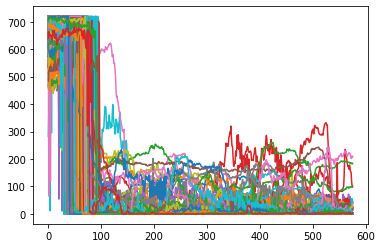

In [61]:
## Lire les histogrammes
for file in os.listdir('./output/pink/'):
    if(file.__contains__('.jpg')):
        print(file)
        
        img = cv2.imread(os.path.join('./output/pink/',file))
        display(img)
        imgRed= img[:,:,2]
        #display(imgRed)
        #display(Image.fromarray(imgRed))
        
        threshold = 250
        mask = np.where((imgRed[:,:] < threshold), 0, 1)
        #print(mask)
        hist = np.sum(mask, axis=1)
        #print(hist)
        plt.plot(hist)
        
        determineLimite(imgRed)
        
        height, width, channels = cv2.imread(os.path.join('./output/pink/',file)).shape

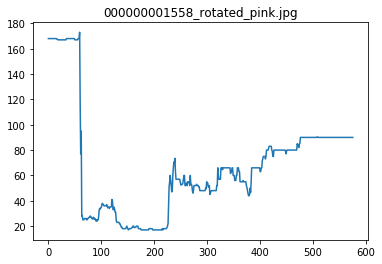

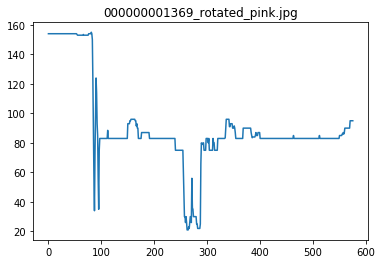

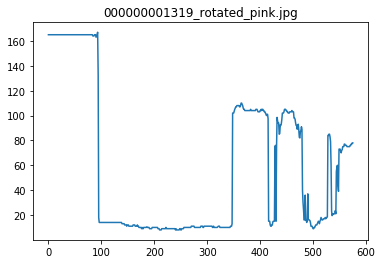

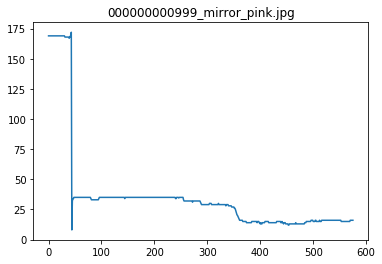

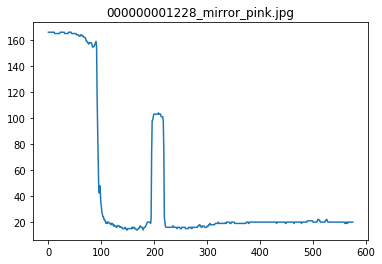

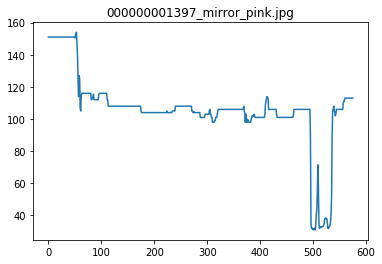

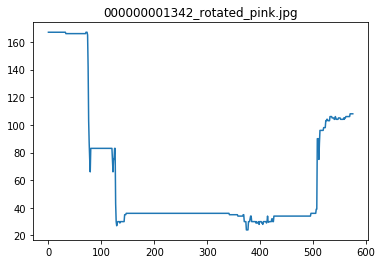

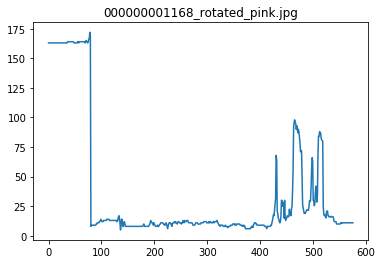

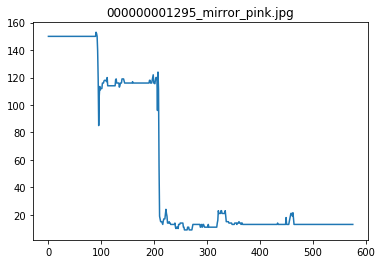

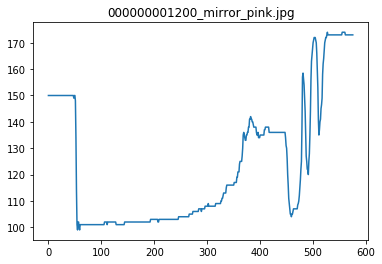

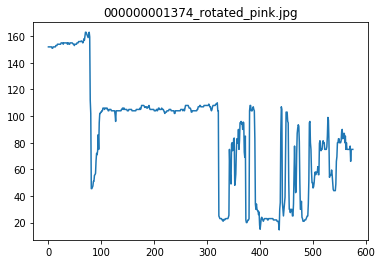

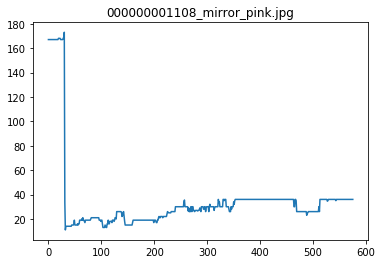

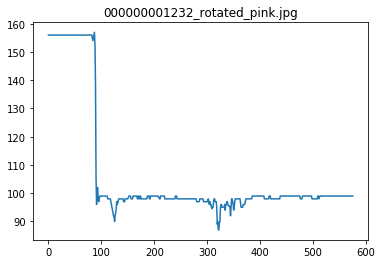

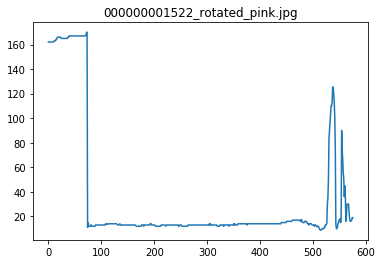

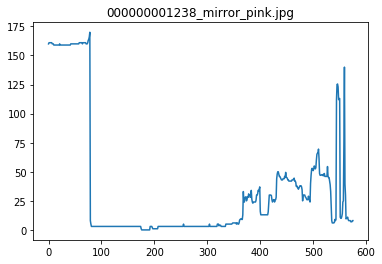

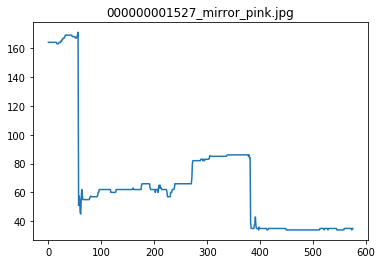

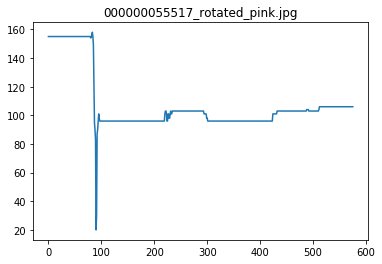

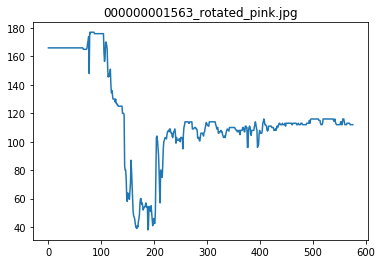

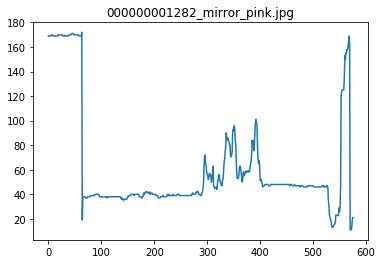

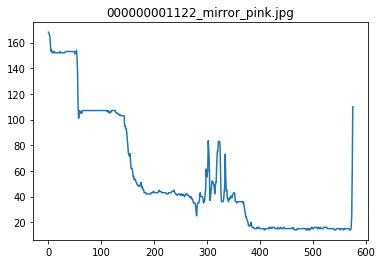

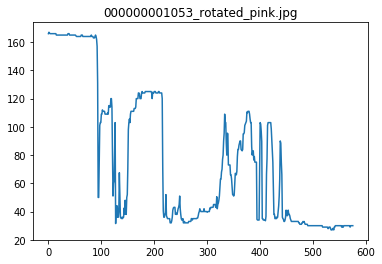

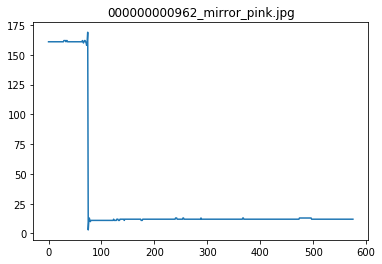

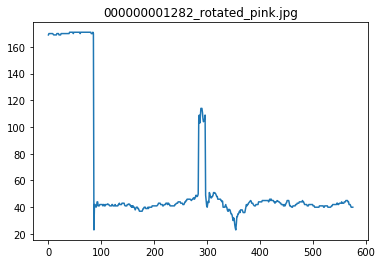

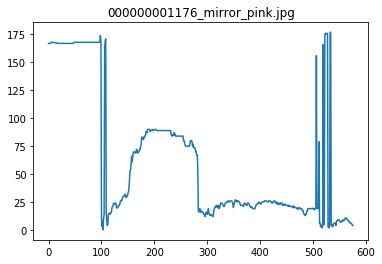

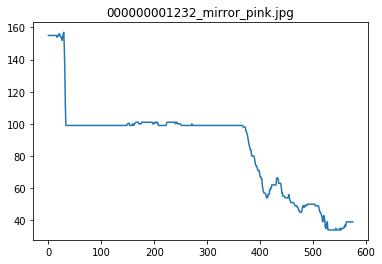

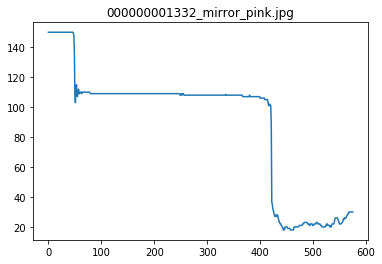

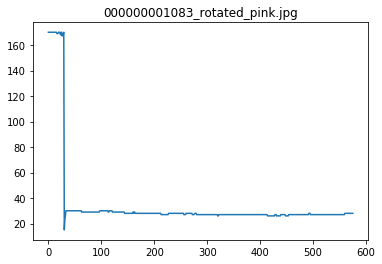

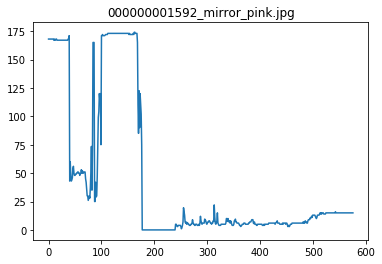

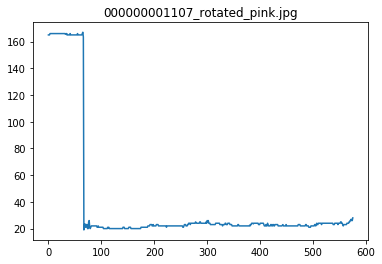

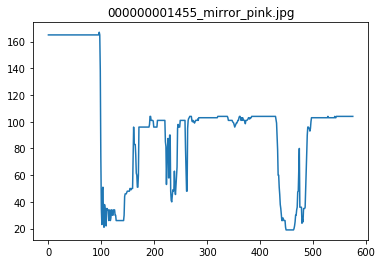

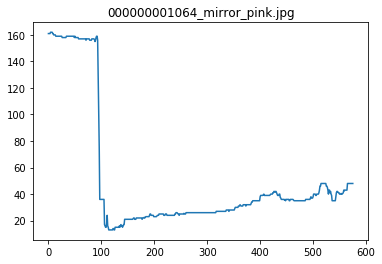

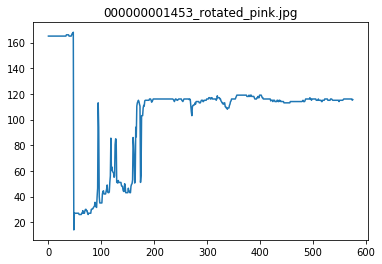

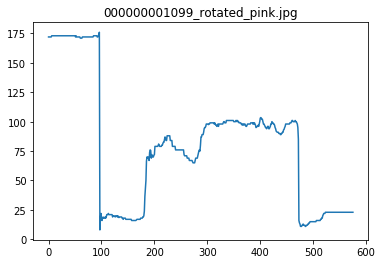

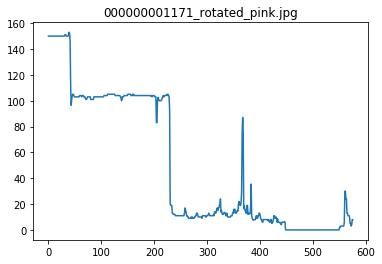

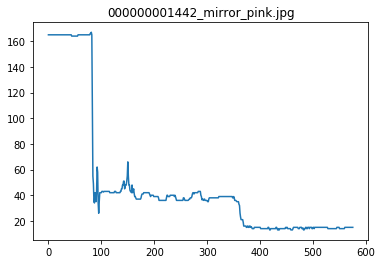

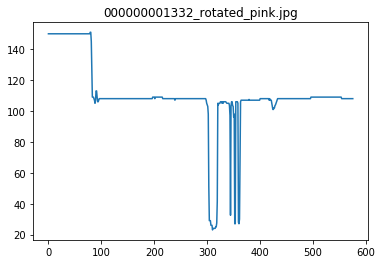

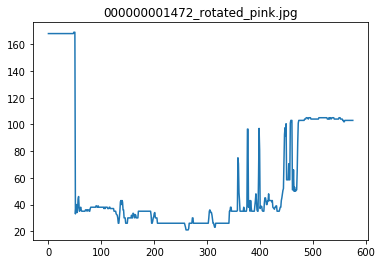

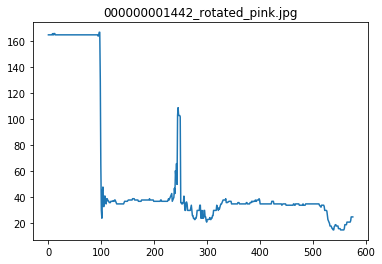

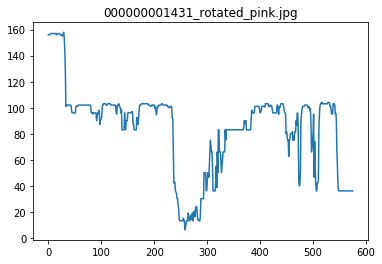

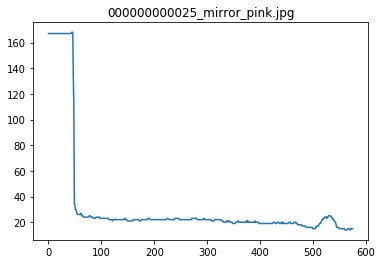

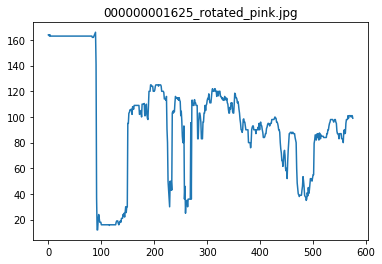

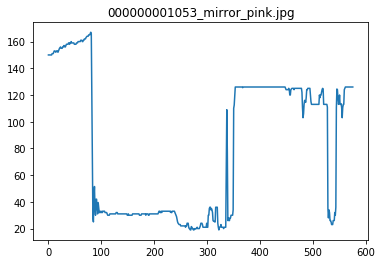

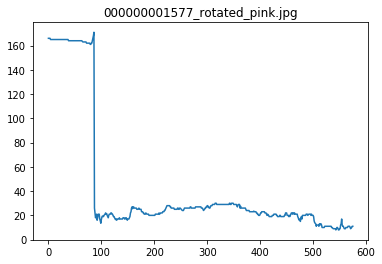

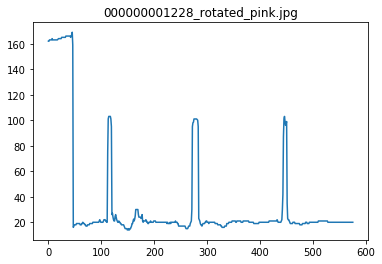

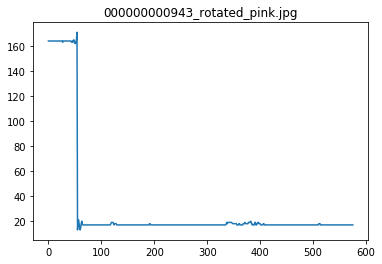

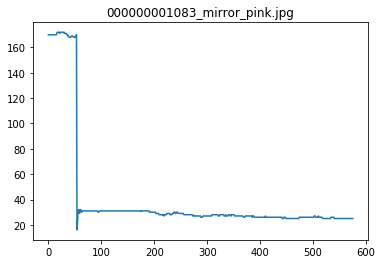

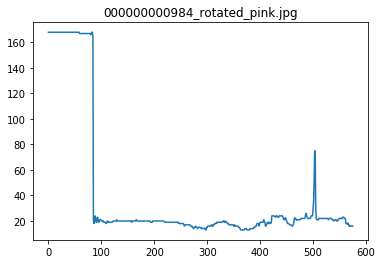

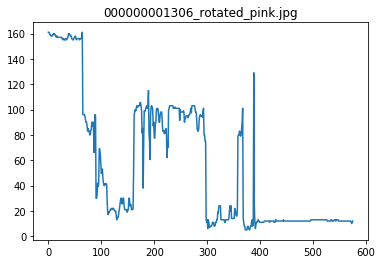

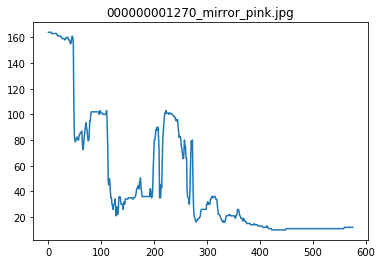

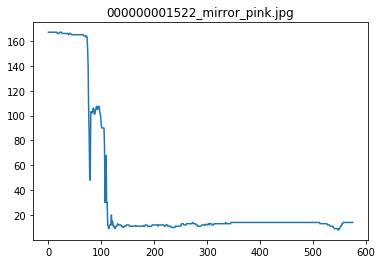

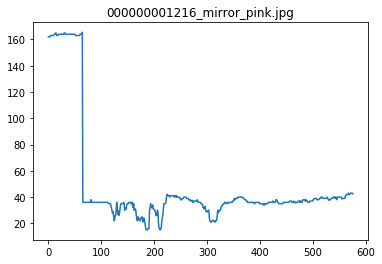

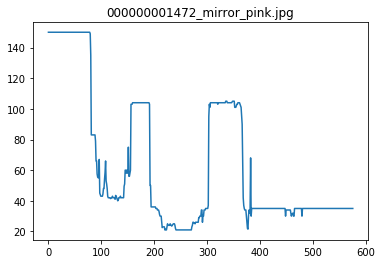

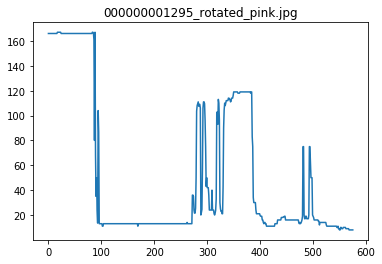

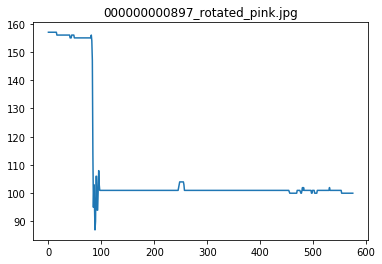

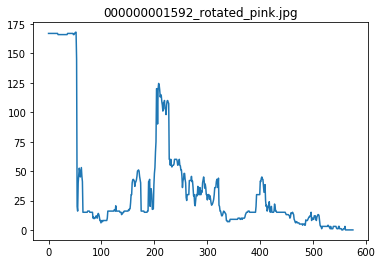

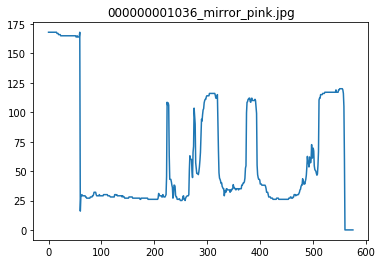

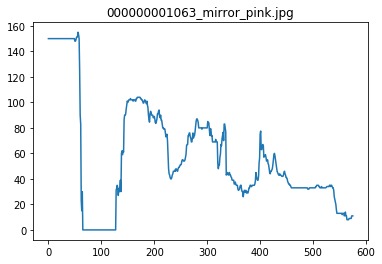

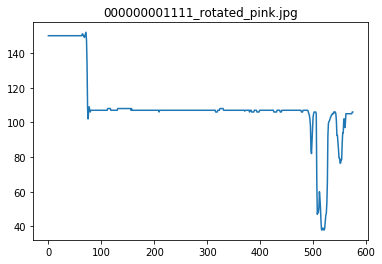

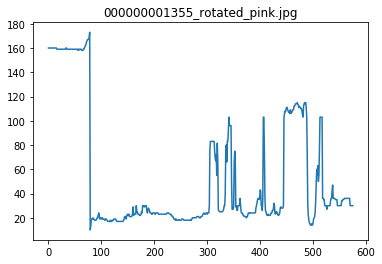

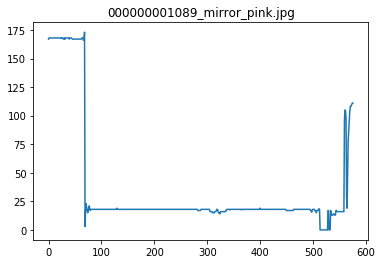

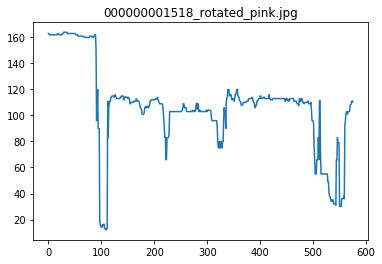

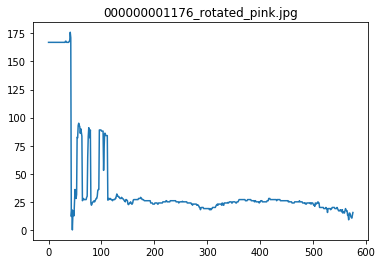

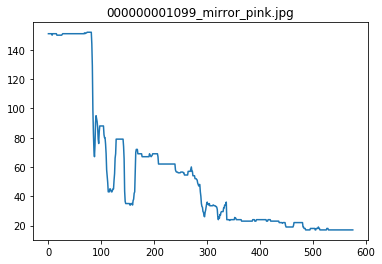

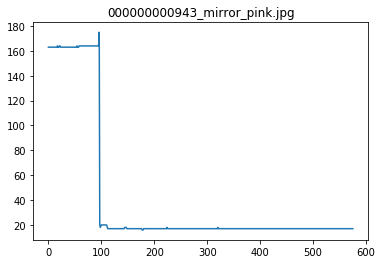

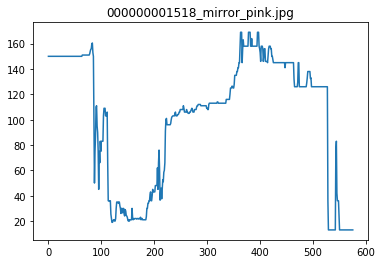

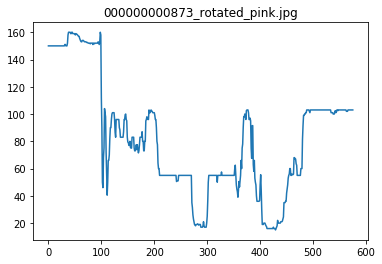

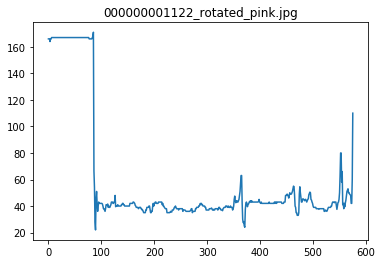

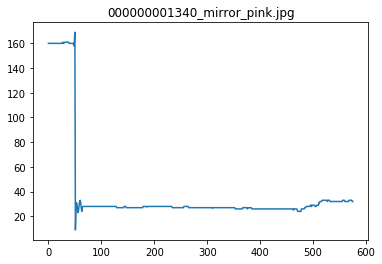

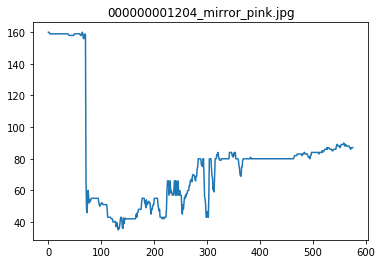

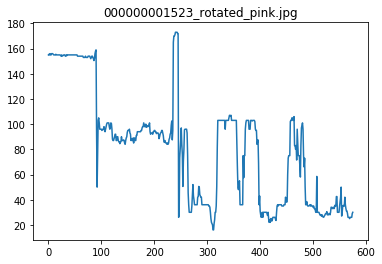

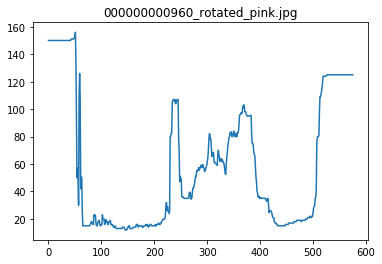

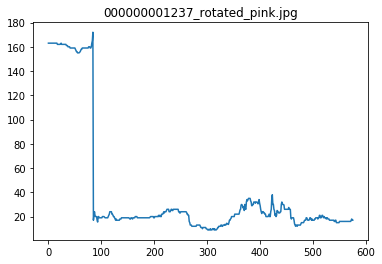

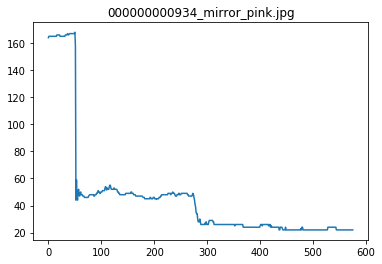

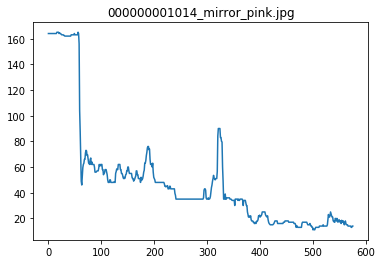

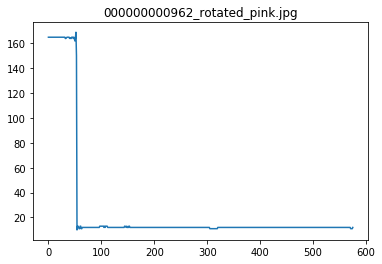

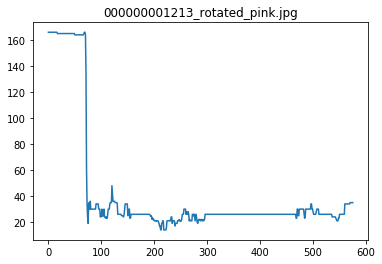

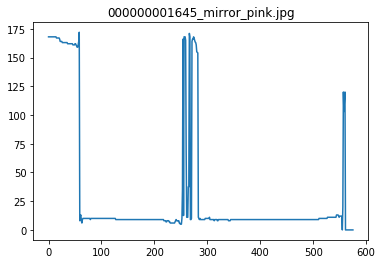

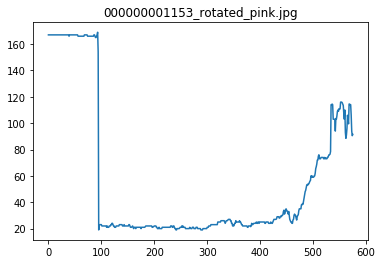

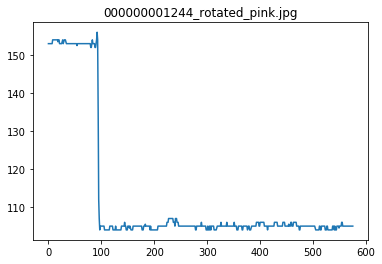

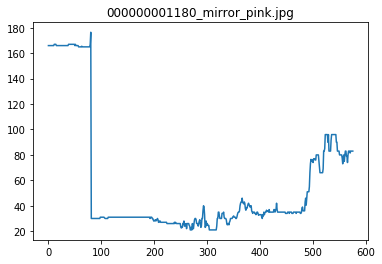

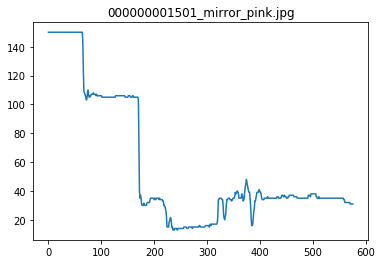

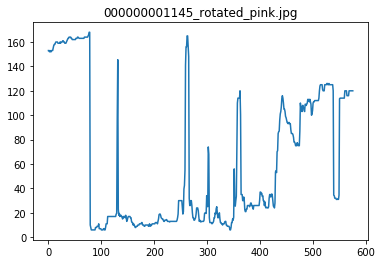

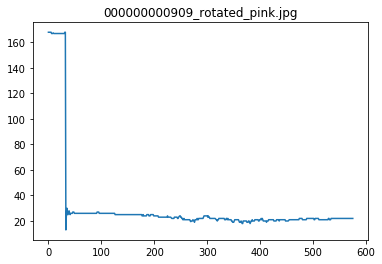

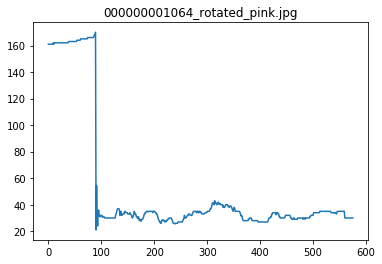

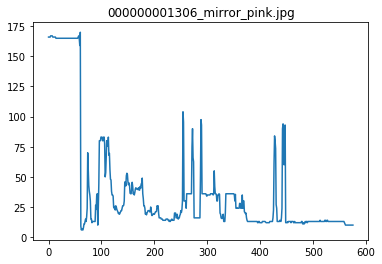

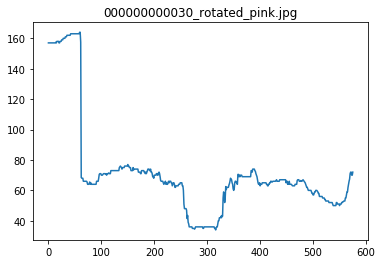

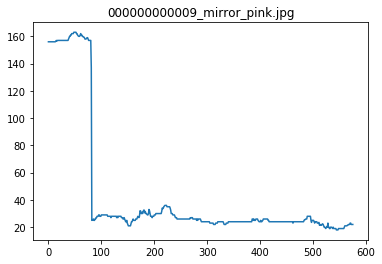

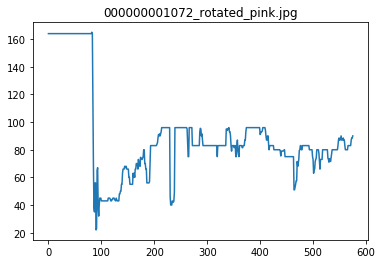

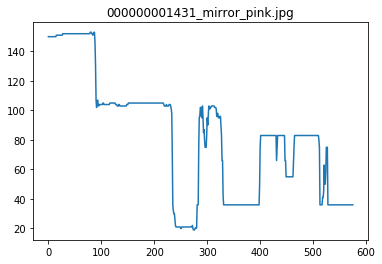

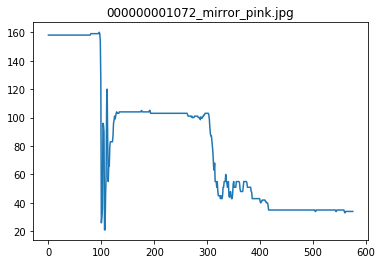

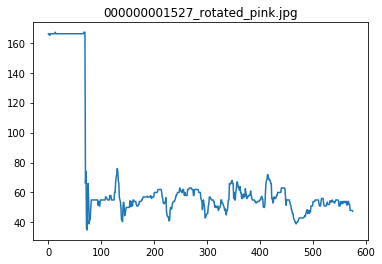

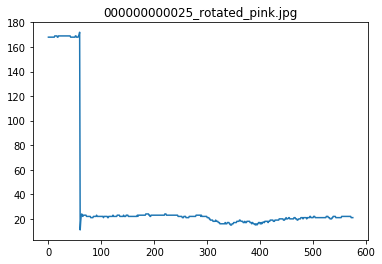

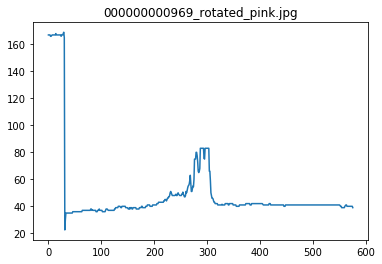

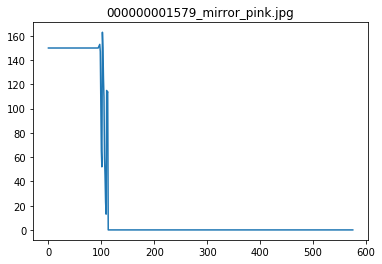

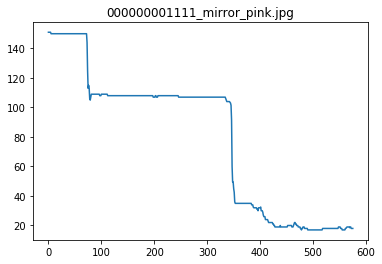

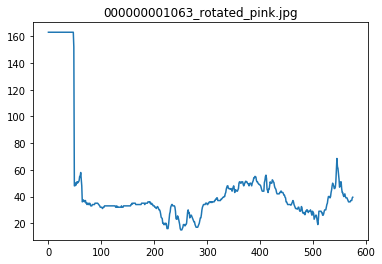

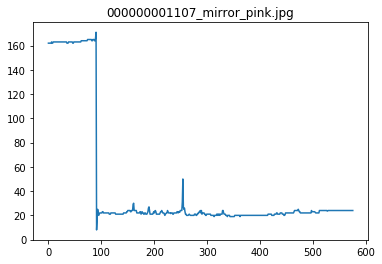

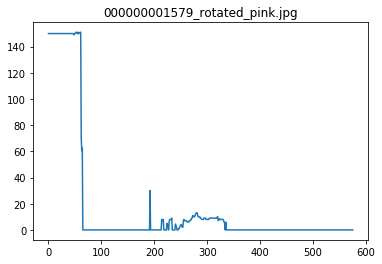

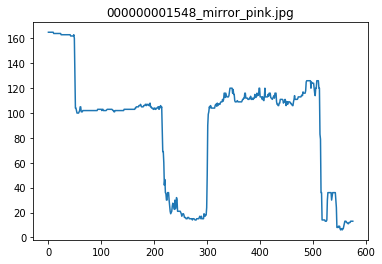

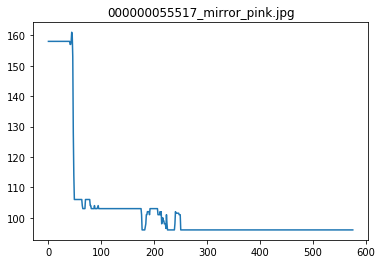

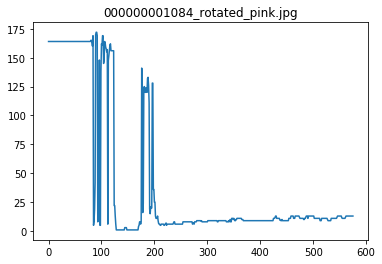

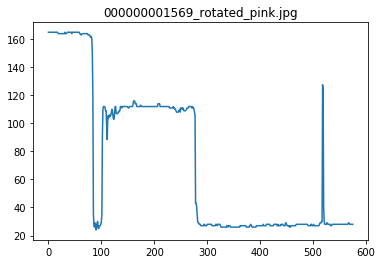

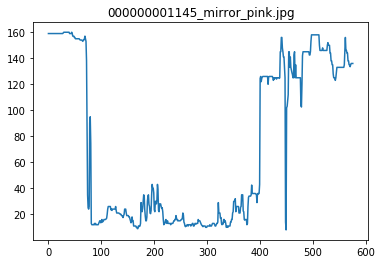

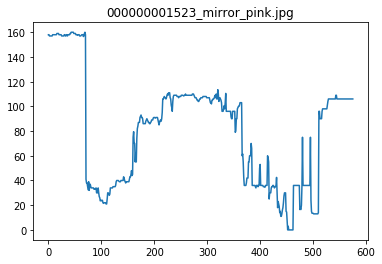

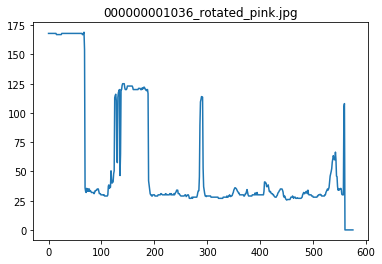

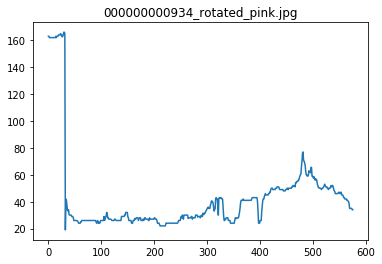

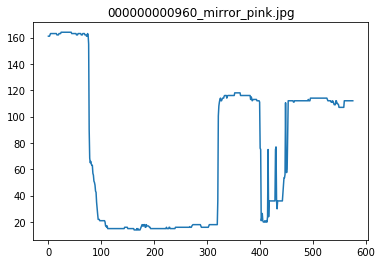

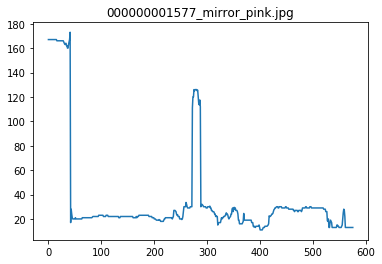

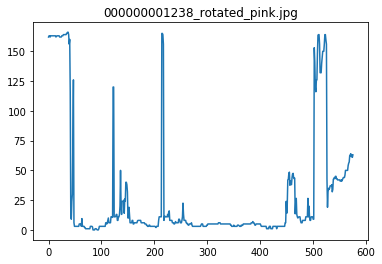

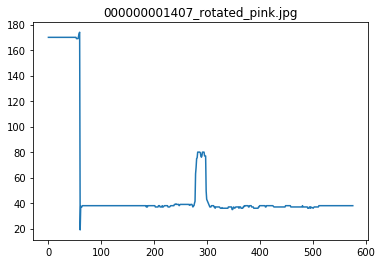

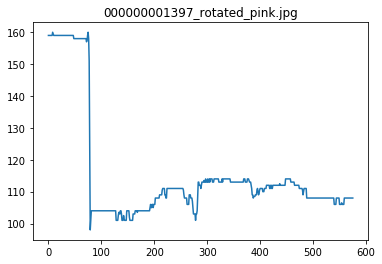

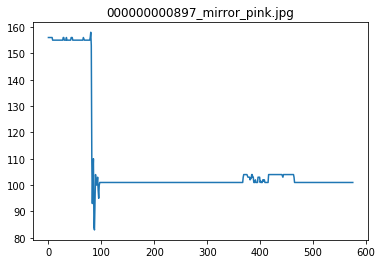

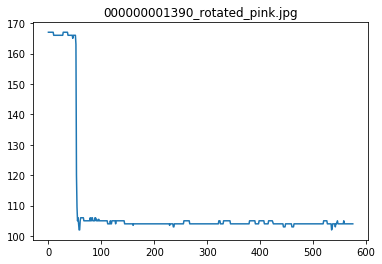

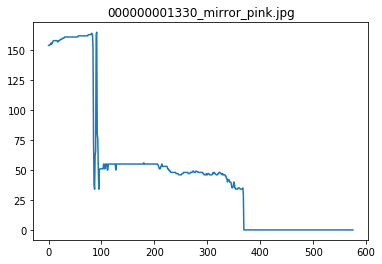

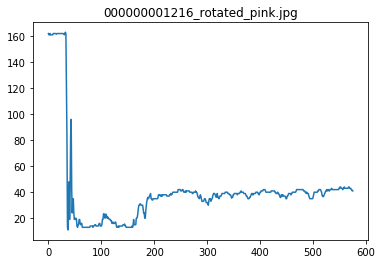

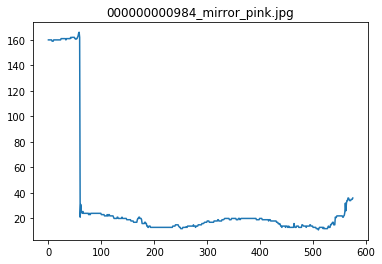

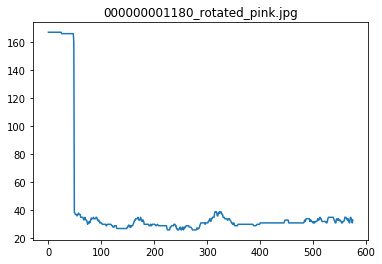

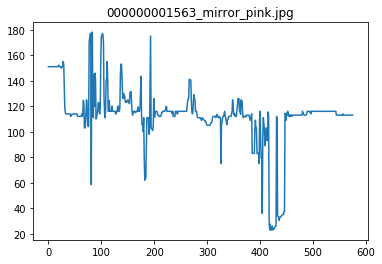

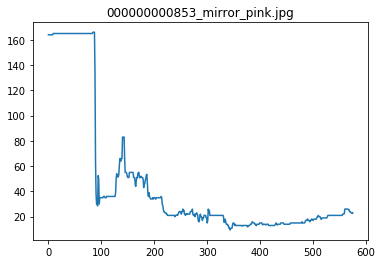

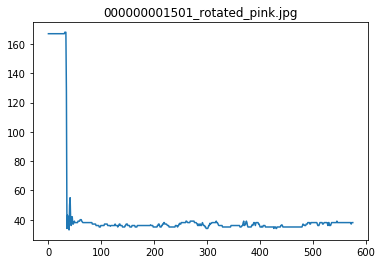

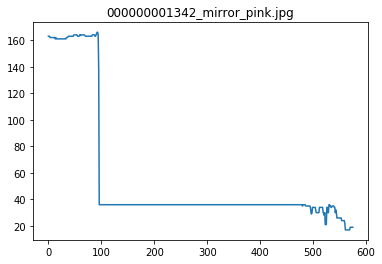

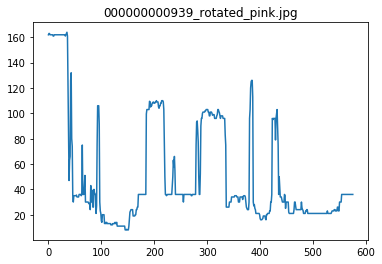

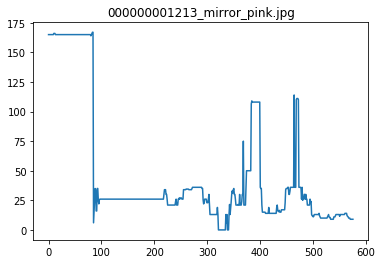

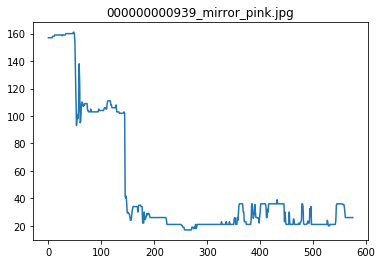

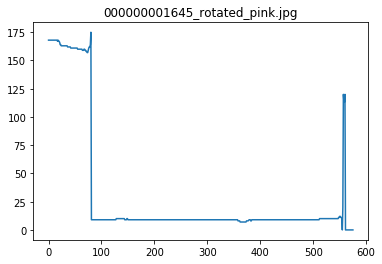

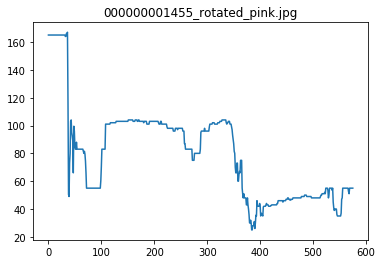

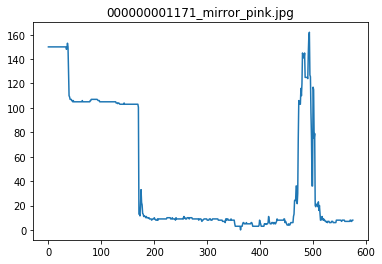

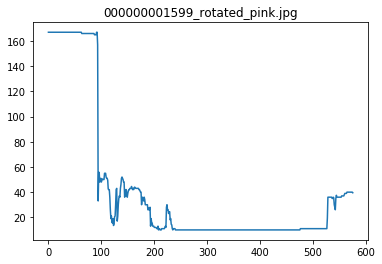

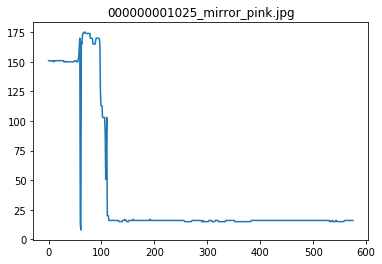

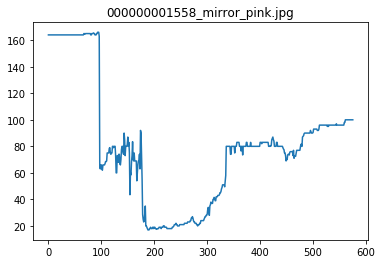

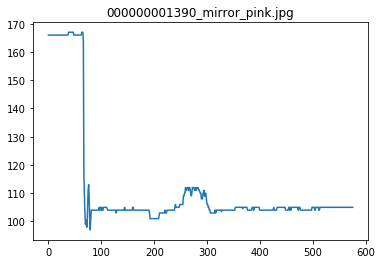

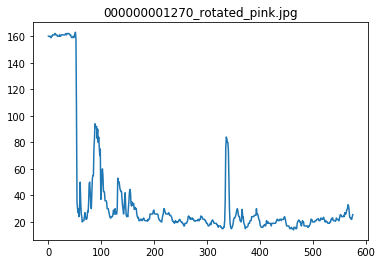

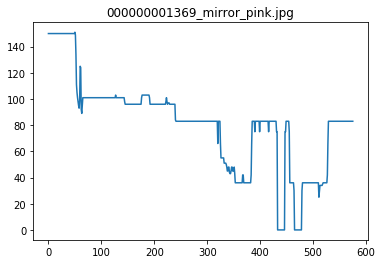

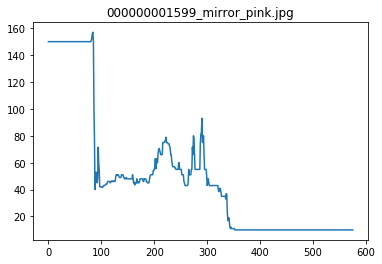

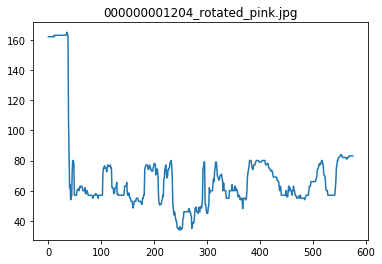

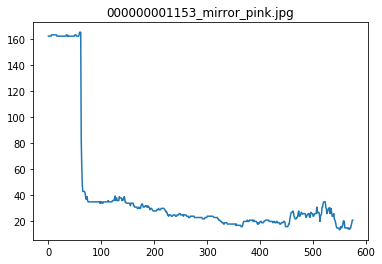

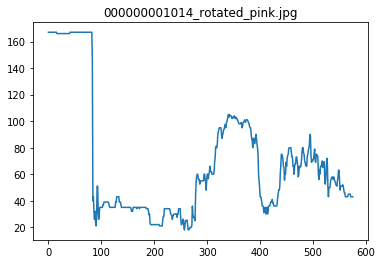

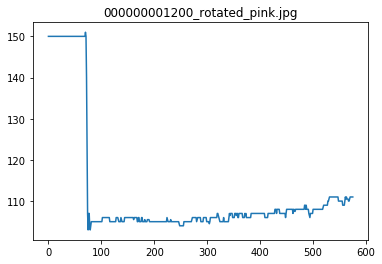

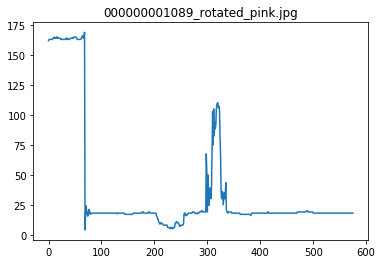

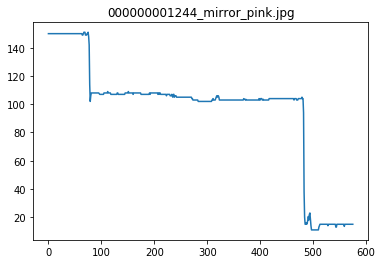

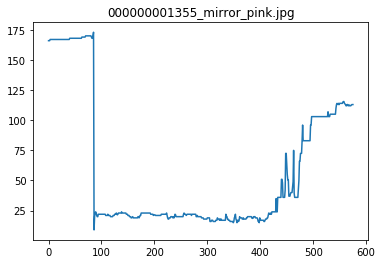

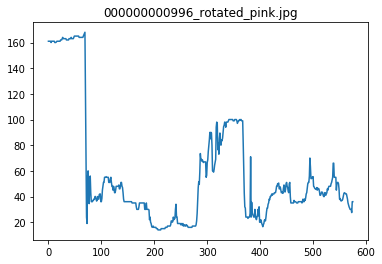

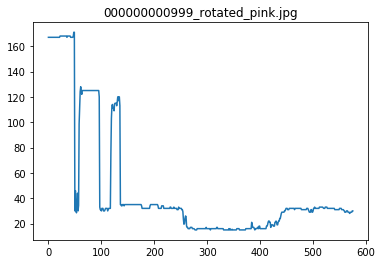

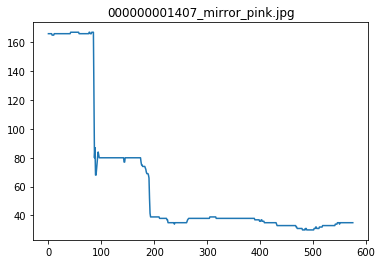

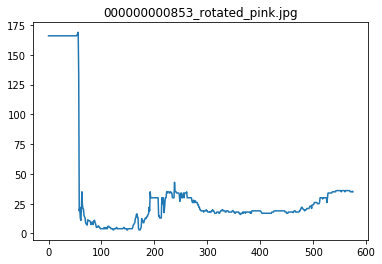

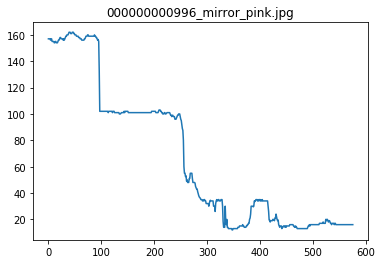

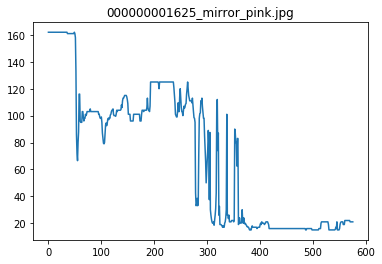

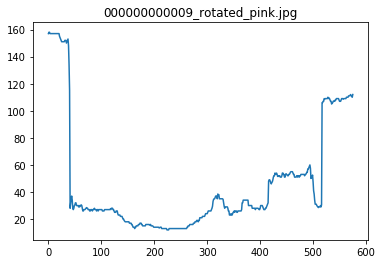

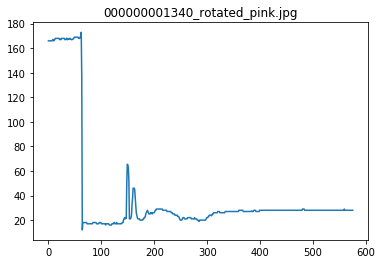

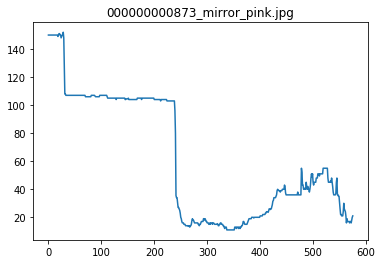

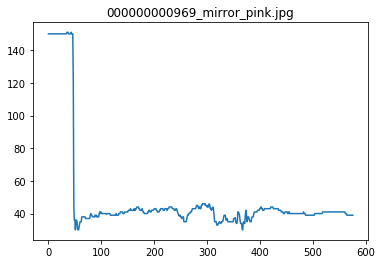

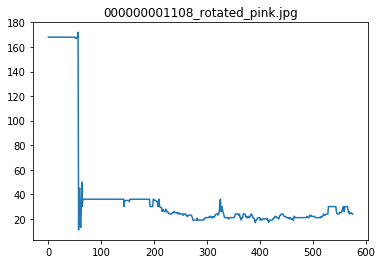

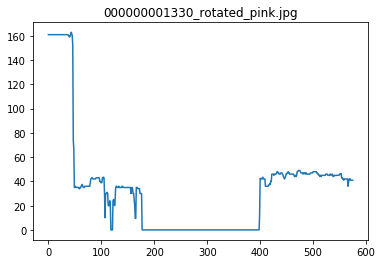

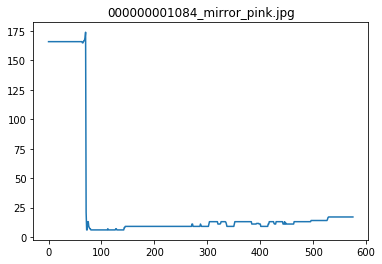

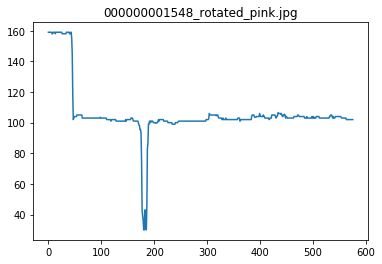

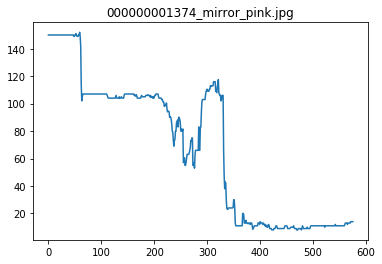

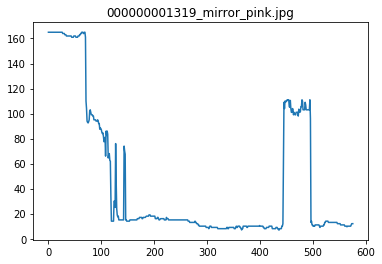

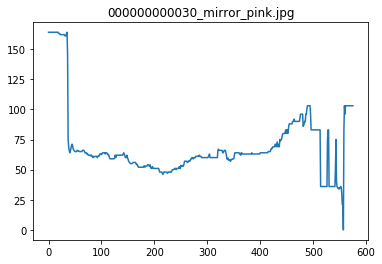

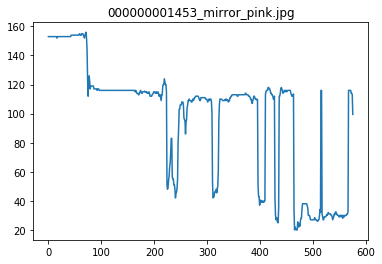

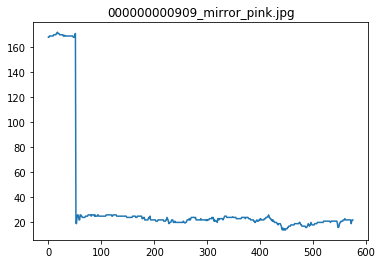

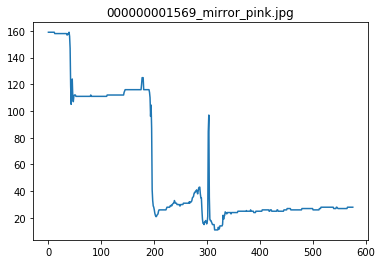

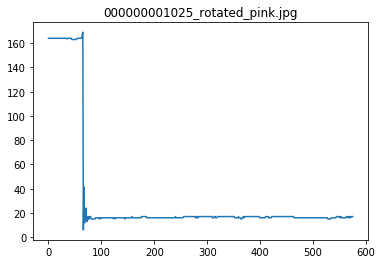

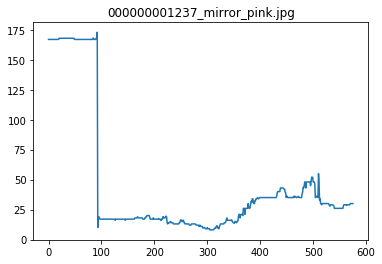

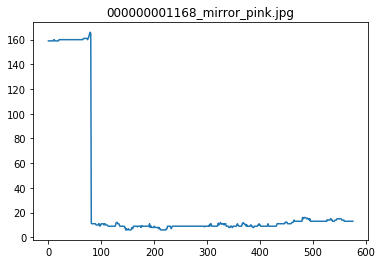

In [105]:
for file in os.listdir('./output/pink/'):
    if(file.__contains__('.jpg')):
        img = cv2.cvtColor(cv2.imread(os.path.join('./output/pink/', file)), cv2.COLOR_BGR2HSV)
        imgHue = img[:,:,0]

        hist = np.sum(imgHue, axis = 1)
        plt.plot(np.median(imgHue, axis=1))
        plt.title(file)
        plt.show()

      #  determineLimite(imgHue)

41

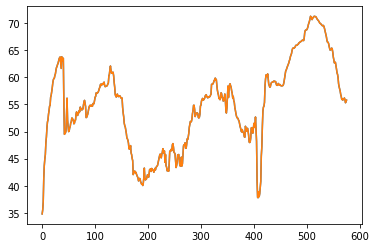

In [88]:
img = cv2.cvtColor(cv2.imread(os.path.join('./output/pink/000000000009_rotated_pink.jpg')), cv2.COLOR_BGR2HSV)
imgHue = img[:,:,0]

hist = np.sum(imgHue, axis = 1)
plt.plot(np.std(imgHue, axis=1))
determineLimite(imgHue)